# Download the Stock data from Yahoo Finance

In [2]:
### Install package to import financial data from Yahoo finance
### from anaconda prompt
### pip install yfinance

In [3]:
import yfinance as yf
import pandas as pd

# Define the stocks and date range
stocks = ['NVDA', 'AAPL', 'GOOGL']


# Fetch the historical data
data = {}
for stock in stocks:
    data[stock] = yf.download(stock)#, start=start_date, end=end_date)

# Example: Display Nvidia's data
print(data['NVDA'].head())  # First few rows of NVDA data
print(data['AAPL'].head())  # First few rows of NVDA data
print(data['GOOGL'].head())  # First few rows of NVDA data

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['NVDA']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['GOOGL']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')


Empty DataFrame
Columns: [(Adj Close, NVDA), (Close, NVDA), (High, NVDA), (Low, NVDA), (Open, NVDA), (Volume, NVDA)]
Index: []
Empty DataFrame
Columns: [(Adj Close, AAPL), (Close, AAPL), (High, AAPL), (Low, AAPL), (Open, AAPL), (Volume, AAPL)]
Index: []
Empty DataFrame
Columns: [(Adj Close, GOOGL), (Close, GOOGL), (High, GOOGL), (Low, GOOGL), (Open, GOOGL), (Volume, GOOGL)]
Index: []


In [17]:
# Save data to CSV if needed
for stock, df in data.items():
    df.to_csv(r"G:\My Drive\LSE_Team_3\Data\{stock}_historical_data_expanded_01.csv")

# Get macro economic data from APIs

# The data are donwloaded from https://www.alphavantage.co/
## There is a limit of 25 requests per day!

1. Click on Get Free API key
2. fill up the form
3. You will receive your free API right away on the same web page (no need to refresh it)
4. replace the API keys in the box below with your API key

### API key

In [6]:
# api_key = "MA94VYU1XDN8Y7Z4"
api_key = "KNTHHYST9DW9AN5V"

In [9]:
# !pip install msoffcrypto-tool

In [10]:
# Imports the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import msoffcrypto
from io import BytesIO

### Get quarterly earnings for AAPL

In [12]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
# If necessary, change the AAPL ticker in the url with the ticker of the needed stock (e.g., GOOGL or NVDA)
url = 'https://www.alphavantage.co/query?function=EARNINGS&symbol=AAPL&apikey={api_key}'

r = requests.get(url)
earnings_AAPL = r.json()

earnings_AAPL

# Extract the AAPL earnings data from the JSON response
quarterly_earnings_AAPL = earnings_AAPL.get("quarterlyEarnings", [])

# Convert to DataFrames
df_quarterly = pd.DataFrame(quarterly_earnings_AAPL)

# Convert date columns to datetime format
df_quarterly["fiscalDateEnding"] = pd.to_datetime(df_quarterly["fiscalDateEnding"])
df_quarterly["reportedDate"] = pd.to_datetime(df_quarterly["reportedDate"])

print("\nQuarterly Earnings:")
print(df_quarterly.head())

QERDs_AAPL_complete = df_quarterly  # The quarterly earnings report dates for AAPL 
QERDs_AAPL_complete

# Create a CSV file as output.
QERDs_AAPL_complete.to_csv(r'G:\My Drive\LSE_Team_3\Data\QERDs_AAPL_complete.csv', index=False)


Quarterly Earnings:
  fiscalDateEnding reportedDate reportedEPS estimatedEPS surprise  \
0       2024-12-31   2025-01-30         2.4         2.36     0.04   
1       2024-09-30   2024-10-31        1.64          1.6     0.04   
2       2024-06-30   2024-08-01         1.4         1.35     0.05   
3       2024-03-31   2024-05-02        1.53          1.5     0.03   
4       2023-12-31   2024-02-01        2.18          2.1     0.08   

  surprisePercentage   reportTime  
0             1.6949  post-market  
1                2.5  post-market  
2             3.7037  post-market  
3                  2  post-market  
4             3.8095  post-market  


### Get quarterly earnings for GOOGL

In [13]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
# If necessary, change the AAPL ticker in the url with the ticker of the needed stock (e.g., GOOGL or NVDA)
url = 'https://www.alphavantage.co/query?function=EARNINGS&symbol=GOOGL&apikey={api_key}'  # MA94VYU1XDN8Y7Z4 is the key

r = requests.get(url)
earnings_GOOGL = r.json()

#earnings_GOOGL

# Extract the AAPL earnings data from the JSON response
quarterly_earnings_GOOGL = earnings_GOOGL.get("quarterlyEarnings", [])

# Convert to DataFrames
df_quarterly = pd.DataFrame(quarterly_earnings_GOOGL)

# Convert date columns to datetime format
df_quarterly["fiscalDateEnding"] = pd.to_datetime(df_quarterly["fiscalDateEnding"])
df_quarterly["reportedDate"] = pd.to_datetime(df_quarterly["reportedDate"])

print("\nQuarterly Earnings:")
print(df_quarterly.head())

QERDs_GOOGL_complete = df_quarterly  # The quarterly earnings report dates for AAPL 
QERDs_GOOGL_complete

# Create a CSV file as output.
QERDs_GOOGL_complete.to_csv(r'G:\My Drive\LSE_Team_3\Data\QERDs_GOOGL_complete.csv', index=False)


Quarterly Earnings:
  fiscalDateEnding reportedDate reportedEPS estimatedEPS surprise  \
0       2024-12-31   2025-02-05        2.15        2.125    0.025   
1       2024-09-30   2024-10-29        2.12         1.85     0.27   
2       2024-06-30   2024-07-23        1.89         1.84     0.05   
3       2024-03-31   2024-04-25        1.89         1.51     0.38   
4       2023-12-31   2024-01-30        1.64         1.59     0.05   

  surprisePercentage   reportTime  
0             1.1765  post-market  
1            14.5946  post-market  
2             2.7174  post-market  
3            25.1656  post-market  
4             3.1447  post-market  


### Get quarterly earnings for NVDA

In [14]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
# If necessary, change the AAPL ticker in the url with the ticker of the needed stock (e.g., GOOGL or NVDA)
url = 'https://www.alphavantage.co/query?function=EARNINGS&symbol=NVDA&apikey={api_key}'  # MA94VYU1XDN8Y7Z4 is the key

r = requests.get(url)
earnings_NVDA = r.json()

#earnings_NVDA

# Extract the AAPL earnings data from the JSON response
quarterly_earnings_NVDA = earnings_NVDA.get("quarterlyEarnings", [])

# Convert to DataFrames
df_quarterly = pd.DataFrame(quarterly_earnings_NVDA)

# Convert date columns to datetime format
df_quarterly["fiscalDateEnding"] = pd.to_datetime(df_quarterly["fiscalDateEnding"])
df_quarterly["reportedDate"] = pd.to_datetime(df_quarterly["reportedDate"])

print("\nQuarterly Earnings:")
print(df_quarterly.head())

QERDs_NVDA_complete = df_quarterly  # The quarterly earnings report dates for AAPL 
QERDs_NVDA_complete

# Create a CSV file as output.
QERDs_NVDA_complete.to_csv(r'G:\My Drive\LSE_Team_3\Data\QERDs_NVDA_complete.csv', index=False)


Quarterly Earnings:
  fiscalDateEnding reportedDate reportedEPS estimatedEPS surprise  \
0       2024-10-31   2024-11-20        0.81         0.74     0.07   
1       2024-07-31   2024-08-28        0.68         0.63     0.05   
2       2024-04-30   2024-05-22       0.612        0.559    0.053   
3       2024-01-31   2024-02-21       0.516        0.461    0.055   
4       2023-10-31   2023-11-21       0.402        0.336    0.066   

  surprisePercentage   reportTime  
0             9.4595  post-market  
1             7.9365  post-market  
2             9.4812  post-market  
3            11.9306  post-market  
4            19.6429  post-market  


### Get consumer price index (CPI) data

In [16]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=CPI&interval=monthly&apikey={api_key}'

r = requests.get(url)
data_CPI = r.json()

# print(data_CPI)

# Extract the CPI data from the JSON response
cpi_data_list = data_CPI.get("data", [])
# print(cpi_data_list)

# Convert to DataFrame
df_CPI = pd.DataFrame(cpi_data_list)

# Convert 'date' column to datetime and sort it
df_CPI['date'] = pd.to_datetime(df_CPI['date'])
df_CPI = df_CPI.sort_values(by='date')

# Display DataFrame
print(df_CPI.head())

# Save data to CSV if needed
df_CPI.to_csv(r"G:\My Drive\LSE_Team_3\Data\df_CPI.csv")

           date  value
1344 1913-01-01  9.800
1343 1913-02-01  9.800
1342 1913-03-01  9.800
1341 1913-04-01  9.800
1340 1913-05-01  9.700


### Get unemployment data 

In [19]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=CPI&interval=monthly&apikey={api_key}'

r = requests.get(url)
data_unemployment = r.json()

# print(data_unemployment)

# Extract the CPI data from the JSON response
unemployment_data_list = data_unemployment.get("data", [])

# Convert to DataFrame
data_unemployment = pd.DataFrame(unemployment_data_list)

# Convert 'date' column to datetime and sort it
data_unemployment['date'] = pd.to_datetime(data_unemployment['date'])
data_unemployment = data_unemployment.sort_values(by='date')

# Display DataFrame
print(data_unemployment.head())

# Save data to CSV if needed
data_unemployment.to_csv(r"G:\My Drive\LSE_Team_3\Data\data_unemployment.csv")

           date  value
1344 1913-01-01  9.800
1343 1913-02-01  9.800
1342 1913-03-01  9.800
1341 1913-04-01  9.800
1340 1913-05-01  9.700


### Get FED funds interest rates

In [20]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=FEDERAL_FUNDS_RATE&interval=monthly&apikey={api_key}'

r = requests.get(url)
data_unemployment = r.json()

# print(data_unemployment)

# Extract the CPI data from the JSON response
unemployment_data_list = data_unemployment.get("data", [])

# Convert to DataFrame
data_unemployment = pd.DataFrame(unemployment_data_list)

# Convert 'date' column to datetime and sort it
data_unemployment['date'] = pd.to_datetime(data_unemployment['date'])
data_unemployment = data_unemployment.sort_values(by='date')

# Display DataFrame
print(data_unemployment.head())

# Save data to CSV if needed
data_unemployment.to_csv(r"G:\My Drive\LSE_Team_3\Data\FEDFUNDS.csv")

          date value
846 1954-07-01  0.80
845 1954-08-01  1.22
844 1954-09-01  1.07
843 1954-10-01  0.85
842 1954-11-01  0.83


# Study the Apple stock prices

In [1]:
# Import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

## Load and explore stock price data

In [2]:
# Load the AAPL stock price data
file_path_AAPL = r'G:\My Drive\LSE_Team_3\Data\AAPL_historical_data_expanded_01.csv'
AAPL = pd.read_csv(file_path_AAPL)

# Preview the DataFrames
print(AAPL.head())

        Price                Close                 High                  Low  \
0      Ticker                 AAPL                 AAPL                 AAPL   
1        Date                  NaN                  NaN                  NaN   
2  1980-12-12  0.09883449226617813   0.0992641836026215  0.09883449226617813   
3  1980-12-15  0.09367820620536804   0.0941078974033573  0.09367820620536804   
4  1980-12-16  0.08680243045091629  0.08723211594284744  0.08680243045091629   

                  Open     Volume  
0                 AAPL       AAPL  
1                  NaN        NaN  
2  0.09883449226617813  469033600  
3   0.0941078974033573  175884800  
4  0.08723211594284744  105728000  


In [3]:
# Rename the columns
new_columns=['Date', 'Close_Price_USD', 'High_Price_USD', 'Low_Price_USD', 'Open_Price_USD', 'Volume']

AAPL.columns = new_columns

# Remove the first two rows (ticker name and "Date")
AAPL = AAPL.drop(AAPL.index[:2])

# Preview the DataFrames
print('Apple Stock Prices \n', AAPL.head())

Apple Stock Prices 
          Date      Close_Price_USD       High_Price_USD        Low_Price_USD  \
2  1980-12-12  0.09883449226617813   0.0992641836026215  0.09883449226617813   
3  1980-12-15  0.09367820620536804   0.0941078974033573  0.09367820620536804   
4  1980-12-16  0.08680243045091629  0.08723211594284744  0.08680243045091629   
5  1980-12-17  0.08895087242126465  0.08938056366518703  0.08895087242126465   
6  1980-12-18  0.09152976423501968  0.09195944968069764  0.09152976423501968   

        Open_Price_USD     Volume  
2  0.09883449226617813  469033600  
3   0.0941078974033573  175884800  
4  0.08723211594284744  105728000  
5  0.08895087242126465   86441600  
6  0.09152976423501968   73449600  


In [4]:
# Summary of missing values for all columns. No missing values in a column corresponds to a 0 count in that column
print('Any missing values?')
print('\n')
print(AAPL.isnull().sum())

# Check the shape of the DataFrames
print("Shape of the imported Apple Stock Prices DataFrame:", AAPL.shape)

# Check the metadata (e.g., column names, data types)
print("\nMetadata of the imported Stock Prices DataFrames:")
print(AAPL.info())

Any missing values?


Date               0
Close_Price_USD    0
High_Price_USD     0
Low_Price_USD      0
Open_Price_USD     0
Volume             0
dtype: int64
Shape of the imported Apple Stock Prices DataFrame: (11130, 6)

Metadata of the imported Stock Prices DataFrames:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11130 entries, 2 to 11131
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             11130 non-null  object
 1   Close_Price_USD  11130 non-null  object
 2   High_Price_USD   11130 non-null  object
 3   Low_Price_USD    11130 non-null  object
 4   Open_Price_USD   11130 non-null  object
 5   Volume           11130 non-null  object
dtypes: object(6)
memory usage: 521.8+ KB
None


In [5]:
# Change date column type from object into date
AAPL['Date'] = pd.to_datetime(AAPL['Date'])

# Change price columns type from object into float64
AAPL[['Close_Price_USD', 
      'High_Price_USD', 
      'Low_Price_USD', 
      'Open_Price_USD'
     ]]=AAPL[['Close_Price_USD', 
              'High_Price_USD', 
              'Low_Price_USD', 
              'Open_Price_USD']].astype(float)

# Change volume column from object into integer
AAPL['Volume'] = AAPL['Volume'].astype(int)

In [6]:
# Create CSV files as output.
file_path_AAPL_cleaned = r'G:\My Drive\LSE_Team_3\Data\APPL_cleaned.csv'
AAPL.to_csv(file_path_AAPL_cleaned, index=False)

In [7]:
# Load the data
AAPL = pd.read_csv(file_path_AAPL_cleaned)

# Check the metadata (e.g., column names, data types)
print("\nMetadata of the imported DataFrames:")
print(AAPL.info())


Metadata of the imported DataFrames:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11130 entries, 0 to 11129
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             11130 non-null  object 
 1   Close_Price_USD  11130 non-null  float64
 2   High_Price_USD   11130 non-null  float64
 3   Low_Price_USD    11130 non-null  float64
 4   Open_Price_USD   11130 non-null  float64
 5   Volume           11130 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 521.8+ KB
None


In [8]:
# Change again date column type from object into date
# For some reasons, when dataframes with columns changed from object to datetime are saved, 
# the datetime column changes back into object 
AAPL['Date'] = pd.to_datetime(AAPL['Date'])

# Check the metadata (e.g., column names, data types)
print("\nMetadata of the imported DataFrames:")
print(AAPL.info())


Metadata of the imported DataFrames:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11130 entries, 0 to 11129
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             11130 non-null  datetime64[ns]
 1   Close_Price_USD  11130 non-null  float64       
 2   High_Price_USD   11130 non-null  float64       
 3   Low_Price_USD    11130 non-null  float64       
 4   Open_Price_USD   11130 non-null  float64       
 5   Volume           11130 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 521.8 KB
None


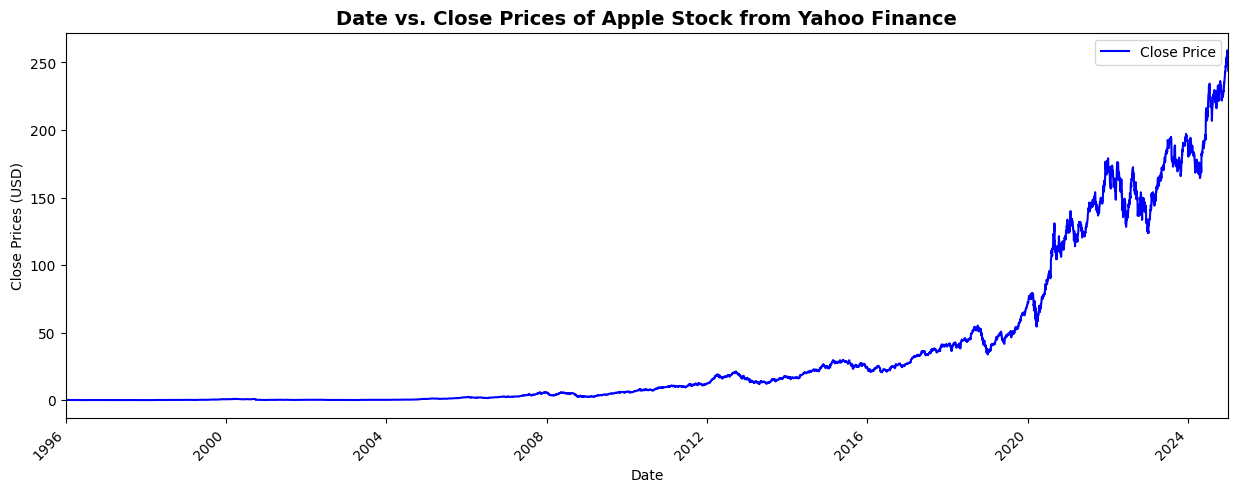

In [139]:
# Set up a figure with 3 subplots
plt.figure(figsize=(15, 5))

# Create the plot Apple stock prices vs. date
plt.plot(AAPL['Date'], AAPL['Close_Price_USD'],label='Close Price', color='blue')
#plt.plot(AAPL['Date'], AAPL['High_Price_USD'], label='High Price', color='green')
#plt.plot(AAPL['Date'], AAPL['Low_Price_USD'], label='Low Price', color='red')
#plt.plot(AAPL['Date'], AAPL['Open_Price_USD'], label='Open Price', color='black') 

# When needed. format the x-axis to show only the desired date interval
start_date_YYYY_MM_DD = '1996-01-01'
end_date_YYYY_MM_DD = '2025-01-01'
plt.xlim(pd.Timestamp(start_date_YYYY_MM_DD), pd.Timestamp(end_date_YYYY_MM_DD))


# Customize the plot
plt.title("Date vs. Close Prices of Apple Stock from Yahoo Finance", fontsize=14, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Close Prices (USD)")
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.legend() # Add the legend

# Add quarterly earning report (QER) closing prices for AAPL

The idea is 
1. To get the stock prices at each quarterly earning report date (QERD), from www.alphavantage.co
2. To define a date range before and after each QERD. Holidays and weekends which occur within the date ranges are excluded.
3. To plot the closing prices during these date ranges, together with the closing prices of Apple stock from Yahoo Finance.

In [10]:
# Imports the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import msoffcrypto
from io import BytesIO

###  Get the stock prices at each quarterly earning report date (QERD) for AAPL

In [11]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=EARNINGS&symbol=AAPL&apikey=MA94VYU1XDN8Y7Z4'  # MA94VYU1XDN8Y7Z4 is the key
r = requests.get(url)
data = r.json()

# Show the data
# data

# Extract all the reported dates
# Extract 'quarterlyEarnings' into a DataFrame
df = pd.DataFrame(data['quarterlyEarnings'])

# Display the DataFrame
print(df)

#QERDs_AAPL = df[['reportedDate', 'surprise', 'surprisePercentage']]  # The quarterly earnings report dates for AAPL 
QERDs_AAPL = df

# Create a CSV file as output.
QERDs_AAPL.to_csv(r'G:\My Drive\LSE_Team_3\Data\QERDs_AAPL.csv', index=False)

    fiscalDateEnding reportedDate reportedEPS estimatedEPS surprise  \
0         2024-12-31   2025-01-30         2.4         2.36     0.04   
1         2024-09-30   2024-10-31        1.64          1.6     0.04   
2         2024-06-30   2024-08-01         1.4         1.35     0.05   
3         2024-03-31   2024-05-02        1.53          1.5     0.03   
4         2023-12-31   2024-02-01        2.18          2.1     0.08   
..               ...          ...         ...          ...      ...   
111       1997-03-31   1997-04-16       -0.05        -0.04    -0.01   
112       1996-12-31   1997-01-15       -0.03        -0.02    -0.01   
113       1996-09-30   1996-10-16      0.0018        -0.01   0.0118   
114       1996-06-30   1996-07-17       -0.02        -0.04     0.02   
115       1996-03-31   1996-04-17       -0.07        -0.05    -0.02   

    surprisePercentage   reportTime  
0               1.6949  post-market  
1                  2.5  post-market  
2               3.7037  post-mark

In [12]:
# Import the QERDs_AAPL
file_path_QERDs_AAPL = r'G:\My Drive\LSE_Team_3\Data\QERDs_AAPL.csv'
QERDs_AAPL = pd.read_csv(file_path_QERDs_AAPL)

# Check the shape of the imported DataFrame
# print("Shape of the imported QERDs_AAPL DataFrame:", QERDs_AAPL.shape)

# Optionally, check the metadata (e.g., column names, data types)
# print("\nMetadata of the imported QERDs_AAPL DataFrame:")
# print(QERDs_AAPL.info())

# View DataFrame.
# print('\nQERDs_AAPL')
# print(QERDs_AAPL.head())
# print(QERDs_AAPL.tail())


### Define a date range before and after each QERD for AAPL

In [13]:
import pandas as pd

# Sample QERDs_AAPL DataFrame (replace this with your actual data)
# QERDs_AAPL = pd.DataFrame({
#     'reportedDate': ['2025-01-01', '2025-01-10'],
# })

# Convert 'reportedDate' to datetime format
QERDs_AAPL['reportedDate'] = pd.to_datetime(QERDs_AAPL['reportedDate'])

# Define the number of days before and after QERDs dynamically
Days_before_and_after_each_QERD = int(input("Enter the number of days before and after each QERD: "))

# Calculate start and end dates
QERDs_AAPL['StartDate'] = QERDs_AAPL['reportedDate'] - pd.Timedelta(days=Days_before_and_after_each_QERD)
QERDs_AAPL['EndDate'] = QERDs_AAPL['reportedDate'] + pd.Timedelta(days=Days_before_and_after_each_QERD)

# Function to create columns for each date between StartDate and EndDate
def create_date_columns(row):
    date_range = pd.date_range(row['StartDate'], row['EndDate'], freq='D')
    return pd.Series(date_range.values, index=[f"Day_{i+1}" for i in range(len(date_range))])

# Apply the function to each row
expanded_dates = QERDs_AAPL.apply(create_date_columns, axis=1)

# Concatenate the original DataFrame with the expanded dates
expanded_QERDs_AAPL = pd.concat([QERDs_AAPL[['reportedDate']], expanded_dates], axis=1)

# Display the result
print(expanded_QERDs_AAPL.shape)
print('Expanded QERDs AAPL:')
print(expanded_QERDs_AAPL.head())  # Display first few rows for checking

Enter the number of days before and after each QERD:  5


(116, 12)
Expanded QERDs AAPL:
  reportedDate      Day_1      Day_2      Day_3      Day_4      Day_5  \
0   2025-01-30 2025-01-25 2025-01-26 2025-01-27 2025-01-28 2025-01-29   
1   2024-10-31 2024-10-26 2024-10-27 2024-10-28 2024-10-29 2024-10-30   
2   2024-08-01 2024-07-27 2024-07-28 2024-07-29 2024-07-30 2024-07-31   
3   2024-05-02 2024-04-27 2024-04-28 2024-04-29 2024-04-30 2024-05-01   
4   2024-02-01 2024-01-27 2024-01-28 2024-01-29 2024-01-30 2024-01-31   

       Day_6      Day_7      Day_8      Day_9     Day_10     Day_11  
0 2025-01-30 2025-01-31 2025-02-01 2025-02-02 2025-02-03 2025-02-04  
1 2024-10-31 2024-11-01 2024-11-02 2024-11-03 2024-11-04 2024-11-05  
2 2024-08-01 2024-08-02 2024-08-03 2024-08-04 2024-08-05 2024-08-06  
3 2024-05-02 2024-05-03 2024-05-04 2024-05-05 2024-05-06 2024-05-07  
4 2024-02-01 2024-02-02 2024-02-03 2024-02-04 2024-02-05 2024-02-06  


### Remove Holidays and  weekends.

In [14]:
# install the module for downloading the market holidays
# !pip install pandas-market-calendars

In [14]:
import pandas as pd
import numpy as np
from pandas.tseries.offsets import BDay
from pandas.tseries.holiday import USFederalHolidayCalendar

# Sample QERDs_AAPL DataFrame (replace this with your actual data)
# QERDs_AAPL = pd.DataFrame({
#     'reportedDate': ['2025-01-01', '2025-01-10'],
# })

# Convert 'reportedDate' to datetime format
QERDs_AAPL['reportedDate'] = pd.to_datetime(QERDs_AAPL['reportedDate'])


# Define U.S. Federal Holidays
us_holidays = USFederalHolidayCalendar().holidays(
    start=QERDs_AAPL['reportedDate'].min() - pd.DateOffset(days=30),
    end=QERDs_AAPL['reportedDate'].max() + pd.DateOffset(days=30)
)

# Function to get previous and next business days
def get_business_days(reference_date, num_days, direction):
    """ Get `num_days` business days before (-1) or after (1) reference_date, adjusting for weekends/holidays. """
    business_days = []
    date = reference_date
    while len(business_days) < num_days:
        date += BDay(direction)  # Move to next/previous business day
        while date in us_holidays:  # If it's a holiday, adjust again
            date += BDay(direction)
        business_days.append(date)
    return business_days

# Function to create adjusted date columns
def create_adjusted_date_columns(row):
    past_dates = get_business_days(row['reportedDate'], Days_before_and_after_each_QERD, -1)
    future_dates = get_business_days(row['reportedDate'], Days_before_and_after_each_QERD, 1)

    full_dates = past_dates + [row['reportedDate']] + future_dates
    return pd.Series(full_dates, index=[f"Day_{i+1}" for i in range(len(full_dates))])

# Apply function
adjusted_dates = QERDs_AAPL.apply(create_adjusted_date_columns, axis=1)

# Concatenate results
adjusted_QERDs_AAPL = pd.concat([QERDs_AAPL[['reportedDate']], adjusted_dates], axis=1)

# Display results
print("Adjusted QERDs AAPL, with holidays and weekends removed:")
print(adjusted_QERDs_AAPL.shape)
print(adjusted_QERDs_AAPL.head())

Adjusted QERDs AAPL, with holidays and weekends removed:
(116, 12)
  reportedDate      Day_1      Day_2      Day_3      Day_4      Day_5  \
0   2025-01-30 2025-01-29 2025-01-28 2025-01-27 2025-01-24 2025-01-23   
1   2024-10-31 2024-10-30 2024-10-29 2024-10-28 2024-10-25 2024-10-24   
2   2024-08-01 2024-07-31 2024-07-30 2024-07-29 2024-07-26 2024-07-25   
3   2024-05-02 2024-05-01 2024-04-30 2024-04-29 2024-04-26 2024-04-25   
4   2024-02-01 2024-01-31 2024-01-30 2024-01-29 2024-01-26 2024-01-25   

       Day_6      Day_7      Day_8      Day_9     Day_10     Day_11  
0 2025-01-30 2025-01-31 2025-02-03 2025-02-04 2025-02-05 2025-02-06  
1 2024-10-31 2024-11-01 2024-11-04 2024-11-05 2024-11-06 2024-11-07  
2 2024-08-01 2024-08-02 2024-08-05 2024-08-06 2024-08-07 2024-08-08  
3 2024-05-02 2024-05-03 2024-05-06 2024-05-07 2024-05-08 2024-05-09  
4 2024-02-01 2024-02-02 2024-02-05 2024-02-06 2024-02-07 2024-02-08  


### Merge the adjusted AAPL QERDs (no holidays, no weekends) with the AAPL stock prices dataframe

In [15]:
# Ensure 'Date' is in datetime format in both DataFrames
AAPL['Date'] = pd.to_datetime(AAPL['Date'])
adjusted_QERDs_AAPL.iloc[:, 1:] = adjusted_QERDs_AAPL.iloc[:, 1:].apply(pd.to_datetime)

# Step 1: Convert expanded_QERDs_AAPL to long format (stack all date columns below each other)
melted_QERDs = adjusted_QERDs_AAPL.melt(id_vars=['reportedDate'], 
                                        var_name='Day', 
                                        value_name='Date')

# Step 2: Sort by date
melted_QERDs = melted_QERDs.sort_values(by='Date')

# Step 3: Merge with AAPL to get closing prices
merged_AAPL_and_adjusted_QERDs_AAPL = melted_QERDs.merge(AAPL, on='Date', how='left')

# Display final result
# print(merged_AAPL_and_adjusted_QERDs_AAPL.shape)
# print(merged_AAPL_and_adjusted_QERDs_AAPL.head())

# Remove the NaN rows
merged_AAPL_and_adjusted_QERDs_AAPL_No_NaN_axis_0 = merged_AAPL_and_adjusted_QERDs_AAPL.dropna().reset_index(drop=True)

merged_AAPL_and_adjusted_QERDs_AAPL_No_NaN_axis_0.shape

print(merged_AAPL_and_adjusted_QERDs_AAPL_No_NaN_axis_0)

     reportedDate     Day       Date  Close_Price_USD  High_Price_USD  \
0      1996-04-17   Day_5 1996-04-10         0.195824        0.199589   
1      1996-04-17   Day_4 1996-04-11         0.193941        0.197706   
2      1996-04-17   Day_3 1996-04-12         0.192058        0.194882   
3      1996-04-17   Day_2 1996-04-15         0.193941        0.193941   
4      1996-04-17   Day_1 1996-04-16         0.194882        0.195824   
...           ...     ...        ...              ...             ...   
1260   2025-01-30   Day_7 2025-01-31       236.000000      247.190002   
1261   2025-01-30   Day_8 2025-02-03       228.009995      231.830002   
1262   2025-01-30   Day_9 2025-02-04       232.800003      233.130005   
1263   2025-01-30  Day_10 2025-02-05       232.470001      232.669998   
1264   2025-01-30  Day_11 2025-02-06       233.220001      233.800003   

      Low_Price_USD  Open_Price_USD       Volume  
0          0.194882        0.196765  174764800.0  
1          0.192058  

# Calculate and plot stock price movements for each date range around the QERD.

### Calculate the number of dataframes (num_df) related to the Days_before_and_after_each_QERD 

In [16]:
num_df = merged_AAPL_and_adjusted_QERDs_AAPL_No_NaN_axis_0.shape[0] // \
(2 * Days_before_and_after_each_QERD + 1)  # Applying the double slash operator (//) results in the integer number of the division.

print('The number of dataframes is', num_df)

The number of dataframes is 115


### Create the dataframes, one per QERD 

In [17]:
#Parameter that saves the number of days before and after each QERD
Days_before_and_after_each_QERD


# Get the unique QERD dates as a series
QERDs_AAPL_series = merged_AAPL_and_adjusted_QERDs_AAPL_No_NaN_axis_0['reportedDate'].drop_duplicates().astype(str)

# Reset the index and start from 1
QERDs_AAPL_series.index = range(1, len(QERDs_AAPL_series) + 1)

shape_dataframe = merged_AAPL_and_adjusted_QERDs_AAPL_No_NaN_axis_0.shape[0]


for i in range(num_df):
    qerd_date = QERDs_AAPL_series.iloc[i]  # Get the QERD date
    df_name = f"df{i+1}_QERDs_AAPL_date_{qerd_date}"  # Name with the QERD date
    globals()[df_name] = \
    merged_AAPL_and_adjusted_QERDs_AAPL_No_NaN_axis_0.iloc[i*(2*Days_before_and_after_each_QERD+1):(i+1)*(2*Days_before_and_after_each_QERD+1)]
    
    #print(df_name, '\n', globals()[df_name], '\n')
    
    # Create CSV files as output for each df.
    file_path_df_name = r"G:\My Drive\LSE_Team_3\Data"
    # Save the actual DataFrame (globals()[df_name]) to CSV
    globals()[df_name].to_csv(f"{file_path_df_name}\\{df_name}.csv", index=False)

### Calculate Differences around QERDs (1 day after QERD minus 1 day before QERD; 2 days after QERD minus 2 days before QERD, ...)

In [18]:
# Loop through the number of DataFrames

# Get the unique QERD dates as a series
QERDs_AAPL_series = merged_AAPL_and_adjusted_QERDs_AAPL_No_NaN_axis_0['reportedDate'].drop_duplicates().astype(str)

# Reset the index and start from 1
QERDs_AAPL_series.index = range(1, len(QERDs_AAPL_series) + 1)

for j in range(num_df):
    qerd_date = QERDs_AAPL_series.iloc[j]  # Get the QERD date
    df_name = f"df{j+1}_QERDs_AAPL_date_{qerd_date}"  # Name with the QERD date
    df = globals()[df_name]  # Retrieve the actual DataFrame
    # print(df_name)

    # Ensure the DataFrame is not empty
    if df.empty:
        continue  # Skip this iteration if df is empty

    # Get the middle position and value
    middle_position = df.shape[0] // 2
    middle_value = df.iloc[middle_position]['Close_Price_USD']  # Retrieves the full row at the middle position

    # Initialize an empty list to store results
    data_list = []
    
    for i in range(middle_position):
        diff = round((df.iloc[2 * Days_before_and_after_each_QERD - i]['Close_Price_USD'] - df.iloc[i]['Close_Price_USD']), 2)
        data_list.append([i + 1, diff])  # Adding i+1 as an index column

    # Convert the list to a DataFrame
    df_result = pd.DataFrame(data_list, columns=['Index', 'Price_Difference'])
    
    # Store the results in a new variable (or overwrite the old one)
    globals()[f"df_result_{j}"] = df_result  

    # print(f"Differeces for {df_name}:\n", df_result)

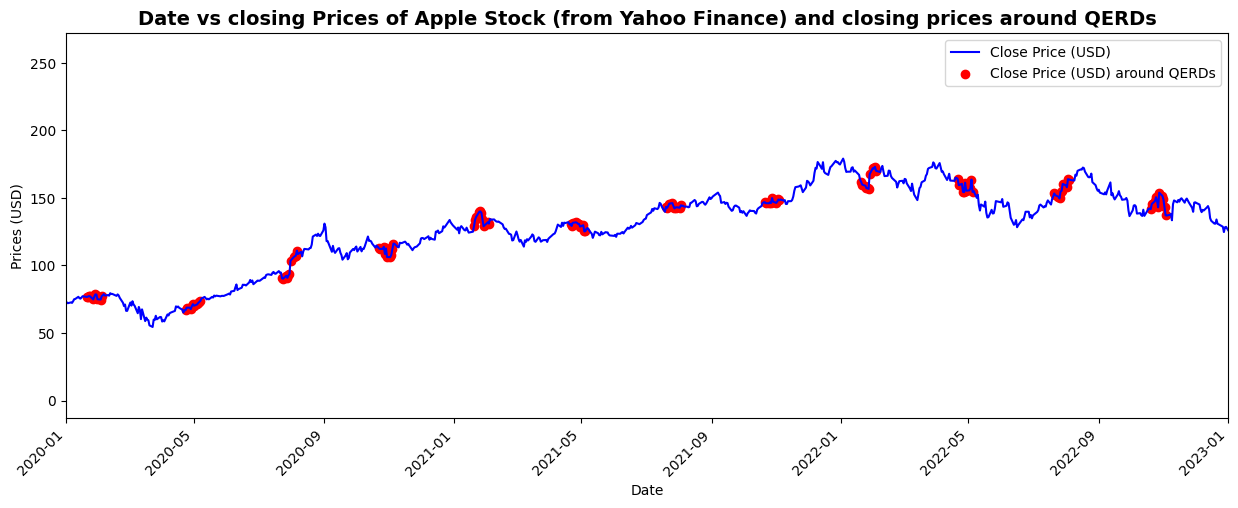

In [19]:
plt.figure(figsize=(15, 5))

# When needed. format the x-axis to show only the desired date interval
start_date_YYYY_MM_DD = '2020-01-01'
end_date_YYYY_MM_DD = '2023-01-01'
plt.xlim(pd.Timestamp(start_date_YYYY_MM_DD), pd.Timestamp(end_date_YYYY_MM_DD))

# Create the plot Apple stock prices vs. date
plt.plot(AAPL['Date'], 
         AAPL['Close_Price_USD'],
         label='Close Price (USD)', 
         color='blue'
        )

# Create the plot Apple stock prices around quarterly earning reports 
plt.scatter(merged_AAPL_and_adjusted_QERDs_AAPL['Date'],
            merged_AAPL_and_adjusted_QERDs_AAPL['Close_Price_USD'], 
            label='Close Price (USD) around QERDs', 
            color='red'
           )

# Customize the plot
plt.title("Date vs closing Prices of Apple Stock (from Yahoo Finance) and closing prices around QERDs", fontsize=14, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Prices (USD)")
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.legend() # Add the legend

### Calculate the percentage increments around QERDs (1 day after QERD w.r.t. 1 day before QERD; 2 days after QERD w.r.t. 2 days before QERD, ...).  

In [20]:
# Loop through the number of DataFrames

# Get the unique QERD dates as a series
QERDs_AAPL_series = merged_AAPL_and_adjusted_QERDs_AAPL_No_NaN_axis_0['reportedDate'].drop_duplicates().astype(str)

# Reset the index and start from 1
QERDs_AAPL_series.index = range(1, len(QERDs_AAPL_series) + 1)

for j in range(num_df):
    qerd_date = QERDs_AAPL_series.iloc[j]  # Get the QERD date
    df_name = f"df{j+1}_QERDs_AAPL_date_{qerd_date}"  # Name with the QERD date
    df = globals()[df_name]  # Retrieve the actual DataFrame
    #print(df_name)

    # Ensure the DataFrame is not empty
    if df.empty:
        continue  # Skip this iteration if df is empty

    # Get the middle position and value
    middle_position = df.shape[0] // 2
    middle_value = df.iloc[middle_position]['Close_Price_USD']  # Retrieves the full row at the middle position

    # Initialize an empty list to store results
    data_list = []

# for i in range(middle_position):
#         diff = round((df.iloc[2 * Days_before_and_after_each_QERD - i]['Close_Price_USD'] - df.iloc[i]['Close_Price_USD']), 2)
#         data_list.append([i + 1, diff])  # Adding i+1 as an index column
    
    for i in range(middle_position):
        increment = round(((df.iloc[2 * Days_before_and_after_each_QERD - i]['Close_Price_USD'] / df.iloc[i]['Close_Price_USD'] -1) * 100), 1)
        data_list.append([i + 1, increment])  # Adding i+1 as an index column

    # Convert the list to a DataFrame
    df_result = pd.DataFrame(data_list, columns=['Index', 'Price_increment_%'])
    
    # Store the results in a new variable (or overwrite the old one)
    globals()[f"df_result_{j}"] = df_result  

    #print(f"Price increment (%) for {df_name}:\n", df_result)

### Calculate increments vs. QERD

The nth increment (%) is calculated as: 
$$ \left[ \frac{\text{Price at } (QERD + n \text{ days}) - \text{Price at QERD}}{\text{Price at QERD}} \right] \times 100 $$

or  

$$ \left[ \frac{\text{Price at } (QERD - n \text{ days}) - \text{Price at QERD}}{\text{Price at QERD}} \right] \times 100 $$


In [22]:
# Loop through the number of DataFrames

# Get the unique QERD dates as a series
QERDs_AAPL_series = merged_AAPL_and_adjusted_QERDs_AAPL_No_NaN_axis_0['reportedDate'].drop_duplicates().astype(str)

# Reset the index and start from 1
QERDs_AAPL_series.index = range(1, len(QERDs_AAPL_series) + 1)

for j in range(num_df):
    qerd_date = QERDs_AAPL_series.iloc[j]  # Get the QERD date
    df_name = f"df{j+1}_QERDs_AAPL_date_{qerd_date}"  # Name with the QERD date
    df = globals()[df_name]  # Retrieve the actual DataFrame
    #print(df_name)
    
    # Ensure the DataFrame is not empty
    if df.empty:
        continue  # Skip this iteration if df is empty

    # Get the middle position and value
    middle_position = df.shape[0] // 2
    middle_value = df.iloc[middle_position]['Close_Price_USD']  # Retrieves the full row at the middle position
    
    # Initialize an empty list to store results
    data_list = []
    
    for i in range(2*Days_before_and_after_each_QERD+1):
        increment = round(
            ((df.iloc[2*Days_before_and_after_each_QERD - i]['Close_Price_USD'] / 
                            df.iloc[middle_position]['Close_Price_USD'] -1) * 100)
            , 1)
        data_list.append([(Days_before_and_after_each_QERD) - i, increment])  # Adding index column as number of days before and after QERD

    # Convert the list to a DataFrame
    df_result = pd.DataFrame(data_list, columns=['Index', 'Price_increment_%'])
    
    # Store the results in a new variable (or overwrite the old one)
    globals()[f"df_result_{j}"] = df_result  

   # print(f"Price increment (%) for {df_name}:\n", df_result)

### Plot a heatmap of increment per QERD and per days before and after each QERD

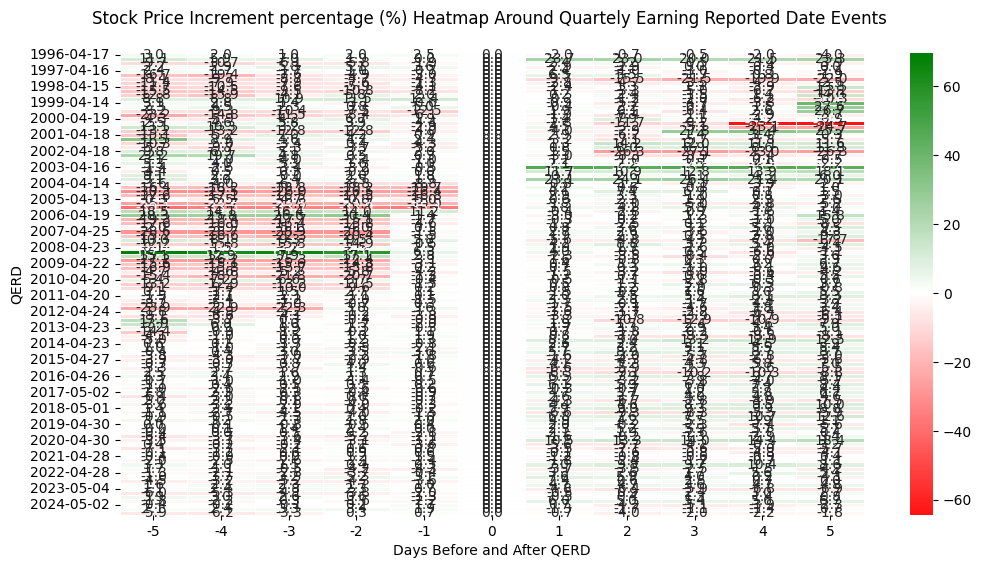

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap

cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 

# Create an empty DataFrame to store all results
heatmap_data = pd.DataFrame()

for j in range(num_df):
    df_result = globals().get(f"df_result_{j}")  # Retrieve the result DataFrame
    
    if df_result is None or df_result.empty:
        continue  # Skip if no data
    
    qerd_date = QERDs_AAPL_series.iloc[j]  # Get the QERD date
    df_result['reportedDate'] = qerd_date  # Add QERD date as a column

    heatmap_data = pd.concat([heatmap_data, df_result], ignore_index=True)


# Pivot the data to have days before/after on X-axis and QERD dates on Y-axis
heatmap_pivot = heatmap_data.pivot(index='reportedDate', columns='Index', values='Price_increment_%')

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_pivot, 
            cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256), 
            annot=True, fmt=".1f", 
            linewidths=0.5, center=0
           )

# Labels and title
plt.xlabel('Days Before and After QERD')
plt.ylabel('QERD')
plt.title('Stock Price Increment percentage (%) Heatmap Around Quartely Earning Reported Date Events \n')

# Rotate the Y-axis labels for better readability
plt.yticks(rotation=0)
plt.xticks(rotation=0)

# Show the heatmap
plt.show()

In [24]:
# Convert reportedDate to datetime format (if not already)
QERDs_AAPL['reportedDate'] = pd.to_datetime(QERDs_AAPL['reportedDate'])

# Filter data for reportedDate between 2020 and 2022
filtered_QERDs_AAPL = QERDs_AAPL[(QERDs_AAPL['reportedDate'] >= '2000-03-01') & 
                                 (QERDs_AAPL['reportedDate'] <= '2002-12-31')]

# Display filtered data
print(filtered_QERDs_AAPL)

   fiscalDateEnding reportedDate  reportedEPS  estimatedEPS  surprise  \
89       2002-09-30   2002-10-16      -0.0022           NaN       0.0   
90       2002-06-30   2002-07-16       0.0100          0.01       0.0   
91       2002-03-31   2002-04-18       0.0020           NaN       0.0   
92       2001-12-31   2002-01-16       0.0100          0.01       0.0   
93       2001-09-30   2001-10-18       0.0034           NaN       0.0   
94       2001-06-30   2001-07-18       0.0030           NaN       0.0   
95       2001-03-31   2001-04-18       0.0100           NaN       0.0   
96       2000-12-31   2000-12-31      -0.0097           NaN       0.0   
97       2000-09-30   2000-10-18       0.0100          0.01       0.0   
98       2000-06-30   2000-07-18       0.0100          0.01       0.0   
99       2000-03-31   2000-04-19       0.0100          0.01       0.0   

    surprisePercentage  reportTime  StartDate    EndDate  
89                 NaN  pre-market 2002-10-11 2002-10-21  
90   

### The surprise percentage is calculated as 

$$ \left( \frac{\text{reported EPS}} {\text{estimated EPS}} -1 \right)   \times 100 $$

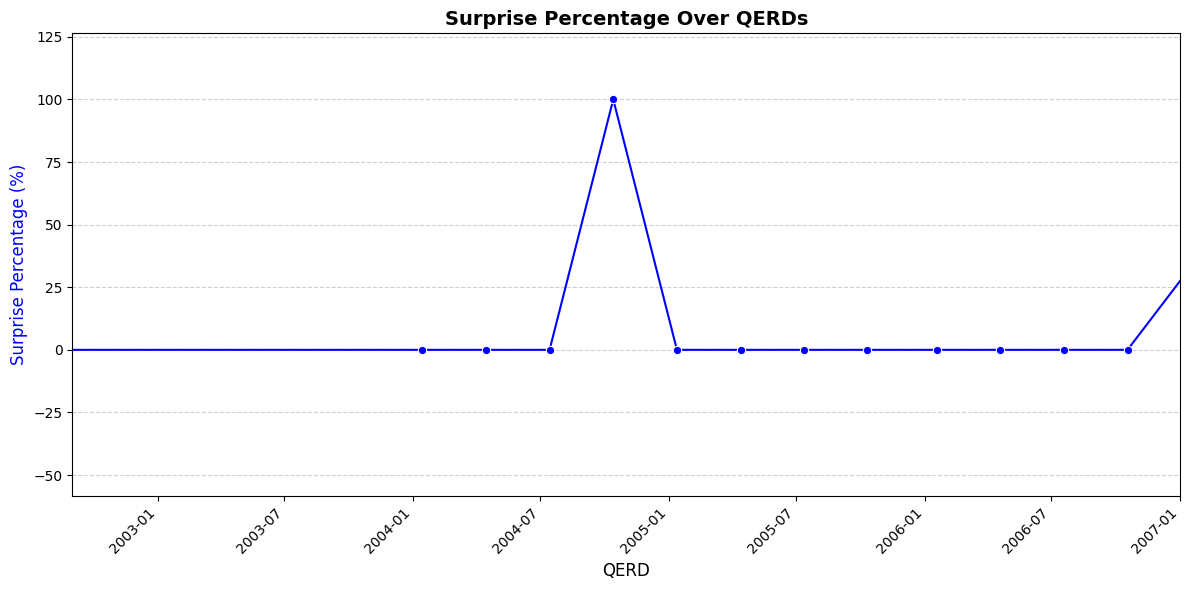

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'reportedDate' is in datetime format
QERDs_AAPL['reportedDate'] = pd.to_datetime(QERDs_AAPL['reportedDate'])

# Sort by reportedDate
QERDs_AAPL = QERDs_AAPL.sort_values(by='reportedDate')

# Set figure size
plt.figure(figsize=(12, 6))

# When needed. format the axis to show only the desired date interval
start_date_YYYY_MM_DD = '2002-09-01'
end_date_YYYY_MM_DD = '2007-01-01'
plt.xlim(pd.Timestamp(start_date_YYYY_MM_DD), pd.Timestamp(end_date_YYYY_MM_DD))


# Create line plot
sns.lineplot(
    data=QERDs_AAPL,
    x='reportedDate',
    y='surprisePercentage',
    marker='o',
    linestyle='-',
    color='blue'
)

# Labels and title
plt.xlabel('QERD', fontsize=12)
plt.ylabel('Surprise Percentage (%)', fontsize=12, color='blue')
plt.title('Surprise Percentage Over QERDs', fontsize=14, fontweight='bold')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show plot
plt.tight_layout()
plt.show()

### Plot a boxplot of increment per QERD

Here, the time interval to consider can be chosen, and conclusions on how surprise percentage correlates with the movements of stock price around QERDs can be drawn.
The time interval can be a period between two quarters of any year, but a time interval of only a specific quarter (e.g., only Q1 from 2003 to 2023). 

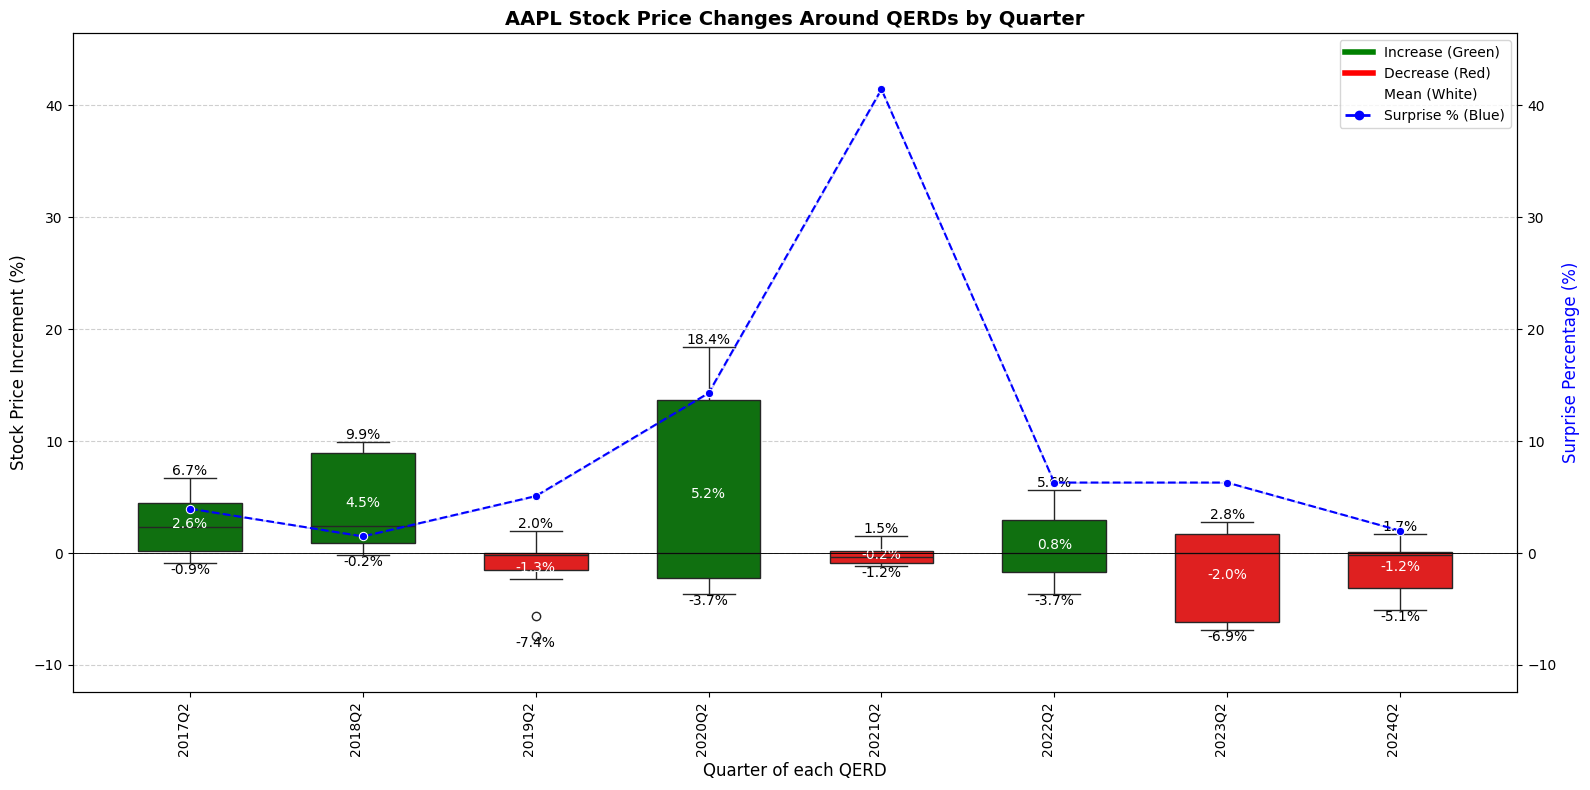

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'reportedDate' is datetime
heatmap_data['reportedDate'] = pd.to_datetime(heatmap_data['reportedDate'])
QERDs_AAPL['reportedDate'] = pd.to_datetime(QERDs_AAPL['reportedDate'])

# Merge datasets
merged_data = pd.merge(heatmap_data, QERDs_AAPL[['reportedDate', 'surprisePercentage']], on='reportedDate', how='left')

# Make sure the reportedDate column is categorical to avoid errors in set_xticklabels
merged_data['reportedDate'] = pd.Categorical(merged_data['reportedDate'], categories=merged_data['reportedDate'].unique(), ordered=True)


# Create Quarter column
merged_data['reportedDate'] = merged_data['reportedDate'].dt.to_period('Q').astype(str)


#Filter dataset for a specific quarter (e.g., Q2) of each year
merged_data = merged_data[merged_data['reportedDate'].str.endswith('Q2')]


# Filter dataset for the desired range

start_quarter = '2017Q1'
end_quarter = '2024Q4'
merged_data = merged_data[
    (merged_data['reportedDate'] >= start_quarter) & (merged_data['reportedDate'] <= end_quarter)
]


# Calculate means
quarter_means = merged_data.groupby('reportedDate')['Price_increment_%'].mean()

# Determine the common y-axis range
left_min = merged_data['Price_increment_%'].min()
left_max = merged_data['Price_increment_%'].max()
right_min = merged_data['surprisePercentage'].min()
right_max = merged_data['surprisePercentage'].max()

common_min = min(left_min, right_min)
common_max = max(left_max, right_max)

# Create the figure
fig, ax1 = plt.subplots(figsize=(16, 8))

# Boxplot on the primary y-axis
sns.boxplot(
    data=merged_data,
    x='reportedDate',
    y='Price_increment_%',
    width=0.6,
    hue='reportedDate',  # Assigning hue to avoid the warning
    palette=['red' if mean < 0 else 'green' for mean in quarter_means],
    ax=ax1
)

# Add the secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(
    data=merged_data,
    x='reportedDate',
    y='surprisePercentage',
    marker='o',
    linestyle='dashed',
    color='blue',
    ax=ax2
)

# Set y-axis limits to align the 0
ax1.set_ylim(common_min-5, common_max+5)
ax2.set_ylim(common_min-5, common_max+5)

# Add labels to the boxplot
for i, quarter in enumerate(merged_data['reportedDate'].unique()):
    subset = merged_data[merged_data['reportedDate'] == quarter]
    max_value = subset['Price_increment_%'].max()
    min_value = subset['Price_increment_%'].min()
    mean_value = subset['Price_increment_%'].mean()
    
    ax1.text(i, max_value, f'{max_value:.1f}%', ha='center', va='bottom', fontsize=10, color='black')
    ax1.text(i, min_value, f'{min_value:.1f}%', ha='center', va='top', fontsize=10, color='black')
    ax1.text(i, mean_value, f'{mean_value:.1f}%', ha='center', va='center', fontsize=10, color='white')

# Set labels and title
ax1.set_xlabel('Quarter of each QERD', fontsize=12)
ax1.set_ylabel('Stock Price Increment (%)', fontsize=12)
ax2.set_ylabel('Surprise Percentage (%)', fontsize=12, color='blue')
plt.title('AAPL Stock Price Changes Around QERDs by Quarter', fontsize=14, fontweight='bold')


# Rotate x-axis labels properly
ax1.set_xticks(range(len(merged_data['reportedDate'].unique())))  # Set fixed tick positions
ax1.set_xticklabels(merged_data['reportedDate'].unique(), rotation=90, ha='right')  # Rotate labels

# Add horizontal lines at zero
ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)


# Add gridlines for readability
ax1.grid(axis='y', linestyle='--', alpha=0.6)

# Add legend
legend_labels = ['Increase (Green)', 'Decrease (Red)', 'Mean (White)', 'Surprise % (Blue)']
handles = [
    plt.Line2D([0], [0], color='green', lw=4),
    plt.Line2D([0], [0], color='red', lw=4),
    plt.Line2D([0], [0], color='white', marker='o', lw=0),
    plt.Line2D([0], [0], color='blue', linestyle='dashed', marker='o', lw=2)
]
plt.legend(handles, legend_labels, loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

In [27]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Import stock data

In [28]:
# Load the AAPL stock price data
file_path_AAPL_cleaned = r'G:\My Drive\LSE_Team_3\Data\APPL_cleaned.csv'
data_AAPL = pd.read_csv(file_path_AAPL_cleaned)

# Change date column type from object into date
data_AAPL.rename(columns={'Date': 'date'}, inplace=True)  #Rename columns for clarity
data_AAPL.rename(columns={'Close_Price_USD': 'APPL_Close_Price_USD'}, inplace=True)
data_AAPL['date'] = pd.to_datetime(data_AAPL['date'])  # Change date column type from object into date

# Preview the DataFrames
print(data_AAPL.head())

        date  APPL_Close_Price_USD  High_Price_USD  Low_Price_USD  \
0 1980-12-12              0.098834        0.099264       0.098834   
1 1980-12-15              0.093678        0.094108       0.093678   
2 1980-12-16              0.086802        0.087232       0.086802   
3 1980-12-17              0.088951        0.089381       0.088951   
4 1980-12-18              0.091530        0.091959       0.091530   

   Open_Price_USD     Volume  
0        0.098834  469033600  
1        0.094108  175884800  
2        0.087232  105728000  
3        0.088951   86441600  
4        0.091530   73449600  


### Import quarterly earnings

In [29]:
file_path_QERDs_AAPL_complete = r'G:\My Drive\LSE_Team_3\Data\QERDs_AAPL_complete.csv'
data_QERDs_AAPL_complete = pd.read_csv(file_path_QERDs_AAPL_complete)

# Change date columns type from object into date
data_QERDs_AAPL_complete['fiscalDateEnding'] = pd.to_datetime(data_QERDs_AAPL_complete['fiscalDateEnding'])
data_QERDs_AAPL_complete['reportedDate'] = pd.to_datetime(data_QERDs_AAPL_complete['reportedDate'])

# Preview the DataFrames
print(data_QERDs_AAPL_complete.head())

  fiscalDateEnding reportedDate  reportedEPS  estimatedEPS  surprise  \
0       2024-12-31   2025-01-30         2.40          2.36      0.04   
1       2024-09-30   2024-10-31         1.64          1.60      0.04   
2       2024-06-30   2024-08-01         1.40          1.35      0.05   
3       2024-03-31   2024-05-02         1.53          1.50      0.03   
4       2023-12-31   2024-02-01         2.18          2.10      0.08   

   surprisePercentage   reportTime  
0              1.6949  post-market  
1              2.5000  post-market  
2              3.7037  post-market  
3              2.0000  post-market  
4              3.8095  post-market  


### Import macro economical data

In [30]:
# Load the CPI data
file_path_df_CPI = r'G:\My Drive\LSE_Team_3\Data\df_CPI.csv'
data_CPI = pd.read_csv(file_path_df_CPI)


data_CPI['date'] = pd.to_datetime(data_CPI['date'])  # Change date column type from object into date
data_CPI.rename(columns={'value': 'value_CPI'}, inplace=True)  # Rename value column for clarity
data_CPI = data_CPI.drop(columns=['Unnamed: 0'])  # drop unnecessary columns

# Preview the DataFrames
print('CPI\n', data_CPI.head())

#########################################################################################

# Load the unemployment data
file_path_data_unemployment = r'G:\My Drive\LSE_Team_3\Data\data_unemployment.csv'
data_unemployment = pd.read_csv(file_path_data_unemployment)

data_unemployment['date'] = pd.to_datetime(data_unemployment['date'])  # Change date column type from object into date
data_unemployment.rename(columns={'value': 'value_unemployment'}, inplace=True)  # Rename value column for clarity
data_unemployment = data_unemployment.drop(columns=['Unnamed: 0'])  # drop unnecessary columns

# Preview the DataFrames
print('\n Unemployment rate \n', data_unemployment.head())

##########################################################################################

# Load the FED Funds interest rates data
file_path_FEDFUNDS = r'G:\My Drive\LSE_Team_3\Data\FEDFUNDS.csv'
data_FEDFUNDS = pd.read_csv(file_path_FEDFUNDS)

data_FEDFUNDS.rename(columns={'observation_date': 'date'}, inplace=True)  # Rename date columns for consistency
data_FEDFUNDS['date'] = pd.to_datetime(data_FEDFUNDS['date'])  # Change date column type from object into date
data_FEDFUNDS.rename(columns={'FEDFUNDS': 'value_FEDFUNDS'}, inplace=True)  # Rename value column for clarity


# Preview the DataFrames
print('\n FED Funds interest rates \n', data_FEDFUNDS.head())

CPI
         date  value_CPI
0 1913-01-01        9.8
1 1913-02-01        9.8
2 1913-03-01        9.8
3 1913-04-01        9.8
4 1913-05-01        9.7

 Unemployment rate 
         date  value_unemployment
0 1948-01-01                 3.4
1 1948-02-01                 3.8
2 1948-03-01                 4.0
3 1948-04-01                 3.9
4 1948-05-01                 3.5

 FED Funds interest rates 
         date  value_FEDFUNDS
0 1954-07-01            0.80
1 1954-08-01            1.22
2 1954-09-01            1.07
3 1954-10-01            0.85
4 1954-11-01            0.83


### Import Articles Tokenized

In [31]:
df_articles_tokenized = pd.read_csv(r'G:\My Drive\LSE_Team_3\Data\articles_tokenized.csv')

df_articles_tokenized.rename(columns={'pub_date': 'date'}, inplace=True)  # Rename pub_date column for clarity
df_articles_tokenized['date'] = pd.to_datetime(df_articles_tokenized['date'])  # Change date column type from object into date
df_articles_tokenized = df_articles_tokenized.drop(columns=['index',
                                                           'sentiment_abstract',
                                                           'sentiment_snippet'])  # drop unnecessary columns

# Check the shape of the imported DataFrame
print("Shape of the imported DataFrame:", df_articles_tokenized.shape)

# View DataFrame.
df_articles_tokenized

Shape of the imported DataFrame: (1464, 5)


,abstract,snippet,date,polarity_abstract,polarity_snippet
0,like its host city the ces trade show largely ...,like its host city the ces trade show largely ...,2019-01-09,0.103571,0.071429
1,by carving the stock market into specialized s...,by carving the stock market into specialized s...,2019-01-11,0.000000,0.000000
2,the couple met in 2013 through a mutual friend...,the couple met in 2013 through a mutual friend...,2019-01-13,0.000000,0.000000
3,all of the weddings right here on one handy pa...,all of the weddings right here on one handy pa...,2019-01-13,0.442857,0.442857
4,stocks slumped from the start with selling wor...,stocks slumped from the start with selling wor...,2019-01-22,-0.200000,-0.200000
...,...,...,...,...,...
1459,listen to our interview with sundar pichai,listen to our interview with sundar pichai,2024-12-20,0.000000,0.000000
1460,äúthe troublemakeräù is a brisk account of the...,äúthe troublemakeräù is a brisk account of the...,2024-12-20,0.000000,0.000000
1461,the search giantäôs proposals included allowin...,the search giantäôs proposals included allowin...,2024-12-21,0.000000,0.000000
1462,the federal judge who ruled google was a monop...,the federal judge who ruled google was a monop...,2024-12-21,0.000000,0.000000


In [32]:
import pandas as pd

# Select rows where "apple" is in the 'abstract' or 'snippet' columns (case-insensitive)
df_apple = df_articles_tokenized[
    df_articles_tokenized['abstract'].str.contains('apple', case=False, na=False) | 
    df_articles_tokenized['snippet'].str.contains('apple', case=False, na=False)
]

# Display results
print(df_apple)

                                               abstract  \
10    from apple to nvidia tech companies say busine...   
12    the title of largest company by market value h...   
13    angela ahrendts hired after leading burberry t...   
32    the music streaming service said apple used it...   
35    accused of using its app store to undercut com...   
...                                                 ...   
1404  the penalties and customer refunds stem from a...   
1419  there is a sense however that the most importa...   
1428  set among a family of private ambulance driver...   
1442  smartphone apps downloaded from apple and goog...   
1451  the chief executive of apple is the latest in ...   

                                                snippet       date  \
10    from apple to nvidia tech companies say busine... 2019-02-03   
12    the title of largest company by market value h... 2019-02-05   
13    angela ahrendts hired after leading burberry t... 2019-02-06   
32    the m

### Merge all the dataframes

In [34]:
# Merge all dataframes based on 'date' in data_AAPL (left join)
merged_all_df = (
    data_AAPL
    .merge(data_CPI, on='date', how='left')
    .merge(data_unemployment, on='date', how='left')
    .merge(data_FEDFUNDS, on='date', how='left')
    .merge(df_apple, on='date', how='left')
)

# Merge earnings data (quarterly) separately, using 'reportedDate'
merged_all_df = merged_all_df.merge(data_QERDs_AAPL_complete, left_on='date', right_on='reportedDate', how='left')

# Sort by date
merged_all_df = merged_all_df.sort_values(by='date')

# Forward-fill and backward-fill missing values
merged_all_df.ffill(inplace=True)  # Fill forward
merged_all_df.bfill(inplace=True)  # Fill backward

# Reset index to start from 0
merged_all_df = merged_all_df.reset_index(drop=True)

# Display the final merged dataset
print(merged_all_df)
print(merged_all_df.shape)

            date  APPL_Close_Price_USD  High_Price_USD  Low_Price_USD  \
0     1980-12-12              0.098834        0.099264       0.098834   
1     1980-12-15              0.093678        0.094108       0.093678   
2     1980-12-16              0.086802        0.087232       0.086802   
3     1980-12-17              0.088951        0.089381       0.088951   
4     1980-12-18              0.091530        0.091959       0.091530   
...          ...                   ...             ...            ...   
11153 2025-02-03            228.009995      231.830002     225.699997   
11154 2025-02-04            232.800003      233.130005     226.649994   
11155 2025-02-05            232.470001      232.669998     228.270004   
11156 2025-02-06            233.220001      233.800003     230.429993   
11157 2025-02-07            227.630005      234.000000     227.259995   

       Open_Price_USD     Volume  value_CPI  value_unemployment  \
0            0.098834  469033600     89.100             

### Calculate correlation matrix

       APPL_Close_Price_USD  value_CPI  value_unemployment  value_FEDFUNDS  \
0                  0.098834     89.100                 7.2           15.72   
1                  0.093678     89.100                 7.2           15.72   
2                  0.086802     89.100                 7.2           15.72   
3                  0.088951     89.100                 7.2           15.72   
4                  0.091530     89.100                 7.2           15.72   
...                     ...        ...                 ...             ...   
11153            228.009995    315.493                 4.2            4.64   
11154            232.800003    315.493                 4.2            4.64   
11155            232.470001    315.493                 4.2            4.64   
11156            233.220001    315.493                 4.2            4.64   
11157            227.630005    315.493                 4.2            4.64   

       reportedEPS  surprisePercentage  polarity_abstract  pola

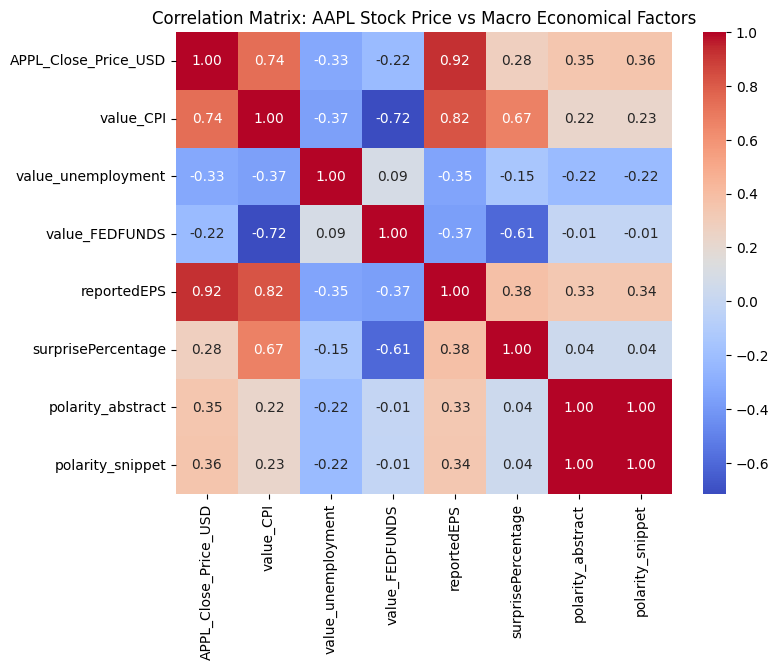

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for correlation analysis
corr_data = merged_all_df[['APPL_Close_Price_USD', 
                           'value_CPI', 
                           'value_unemployment', 
                           'value_FEDFUNDS', 
                           'reportedEPS', 
                           'surprisePercentage',
                           'polarity_abstract',
                           'polarity_snippet'
                          ]]
print(corr_data)

# Compute correlation matrix
corr_matrix = corr_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: AAPL Stock Price vs Macro Economical Factors")
plt.show()

### Regression Analysis

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Define independent (X) and dependent (Y) variables
X = corr_data[['value_CPI', 
               'value_unemployment', 
               'value_FEDFUNDS', 
               'reportedEPS', 
               'surprisePercentage',
               'polarity_abstract',
               'polarity_snippet'
             ]]
Y = corr_data['APPL_Close_Price_USD']

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)

print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Model Coefficients: {dict(zip(X.columns, model.coef_))}")

R-squared: 0.8835
Mean Squared Error: 334.8020
Model Coefficients: {'value_CPI': np.float64(0.342192447522227), 'value_unemployment': np.float64(1.1534284092116402), 'value_FEDFUNDS': np.float64(3.669078383067829), 'reportedEPS': np.float64(74.77094709947005), 'surprisePercentage': np.float64(-0.17961277322458807), 'polarity_abstract': np.float64(41.82364629960511), 'polarity_snippet': np.float64(-29.593364054121533)}


In [37]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Define independent (X) and dependent (Y) variables
X = corr_data[['value_CPI', 
               'value_unemployment', 
               'value_FEDFUNDS', 
               'reportedEPS', 
               'surprisePercentage',
          #     'polarity_abstract',
          #     'polarity_snippet'
             ]]
Y = corr_data['APPL_Close_Price_USD']

# Add a constant for the intercept
X = sm.add_constant(X)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the OLS (Ordinary Least Squares) regression model
model = sm.OLS(Y_train, X_train).fit()

# Get the summary of the regression results
print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     APPL_Close_Price_USD   R-squared:                       0.877
Model:                              OLS   Adj. R-squared:                  0.877
Method:                   Least Squares   F-statistic:                 1.275e+04
Date:                  Tue, 18 Feb 2025   Prob (F-statistic):               0.00
Time:                          17:46:46   Log-Likelihood:                -38275.
No. Observations:                  8926   AIC:                         7.656e+04
Df Residuals:                      8920   BIC:                         7.661e+04
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const           

In [38]:
# Make predictions on the test set
Y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(Y_test, Y_pred)  # R-squared score
mse = mean_squared_error(Y_test, Y_pred)  # Mean Squared Error

# Print results
print(f"R-squared on Test Data: {r2:.4f}")
print(f"Mean Squared Error on Test Data: {mse:.4f}")


R-squared on Test Data: 0.8816
Mean Squared Error on Test Data: 340.1786


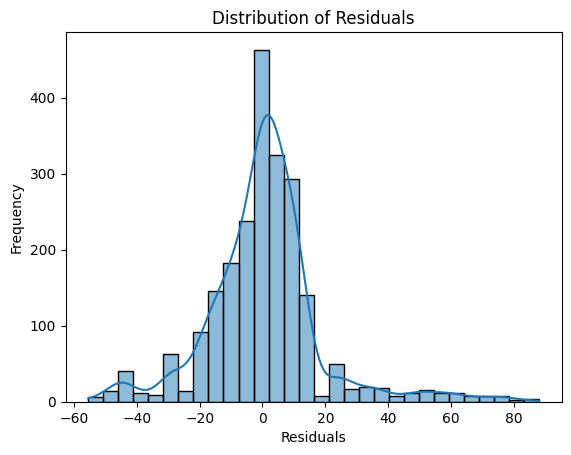

In [39]:
residuals = Y_test - Y_pred

# Plot residuals
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

The residual distribution looks close to normal, so the model (excluding the polarity of sentiment analysis, not significant from the initial multi linear regression model) looks well-behaving

### Linear Regression Analysis

In [40]:
from sklearn.linear_model import LinearRegression

X = corr_data[['value_CPI', 
               'value_unemployment', 
               'value_FEDFUNDS', 
               'reportedEPS', 
               'surprisePercentage',
               'polarity_abstract',
               'polarity_snippet'
             ]]
Y = corr_data['APPL_Close_Price_USD']

model = LinearRegression()
model.fit(X, Y)
print("Regression Coefficients:", model.coef_)

Regression Coefficients: [  0.34262899   1.19897932   3.69705286  74.86904113  -0.17496221
  43.85948784 -27.91574974]


### Granger Causality Test (to check if a macro factor <b>predicts</b> stock prices)

Interpretation:

If the p-value for any lag is < 0.05, the null hypothesis that the (macro economical) parameter does not Granger-cause STOCK_Close_Price_USD is rejected, meaning that value_CPI provides predictive information about STOCK_Close_Price_USD.

If all p-values for any lag is > 0.05, the null hypothesis that the (macro economical) parameter does not Granger-cause STOCK_Close_Price_USD is failed to be rejected, meaning there's no strong evidence that the (macro economical) parameter Granger-causes STOCK_Close_Price_USD.

A lag in the Granger Causality Test refers to how many past values of one time series (X) are used to predict another time series (Y). Mathematically, the test checks if past values of X (up to a certain number of lags) help predict Y. For example, if the Granger causality is tested with maxlag=4, the model evaluates whether the past 1 to 4 time periods of X influence Y.

For example, a maxlag = 4 checks if a (macro economical) factor at t-1, t-2, t-3, and t-4 helps predict STOCK_Close_Price_USD at t.

If p-value < 0.05 at any lag, it means that the (macro economical) factor values contain predictive power for STOCK�s stock price.

In [41]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(merged_all_df[['value_CPI', 'APPL_Close_Price_USD']].dropna(), maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.4342  , p=0.0021  , df_denom=11154, df_num=1
ssr based chi2 test:   chi2=9.4367  , p=0.0021  , df=1
likelihood ratio test: chi2=9.4327  , p=0.0021  , df=1
parameter F test:         F=9.4342  , p=0.0021  , df_denom=11154, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.2086  , p=0.0055  , df_denom=11151, df_num=2
ssr based chi2 test:   chi2=10.4219 , p=0.0055  , df=2
likelihood ratio test: chi2=10.4170 , p=0.0055  , df=2
parameter F test:         F=5.2086  , p=0.0055  , df_denom=11151, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=10.0155 , p=0.0000  , df_denom=11148, df_num=3
ssr based chi2 test:   chi2=30.0655 , p=0.0000  , df=3
likelihood ratio test: chi2=30.0250 , p=0.0000  , df=3
parameter F test:         F=10.0155 , p=0.0000  , df_denom=11148, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=7.8572  

{np.int64(1): ({'ssr_ftest': (np.float64(9.434173585231965),
    np.float64(0.0021349183337315597),
    np.float64(11154.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(9.436711017610994),
    np.float64(0.0021268456956108324),
    np.int64(1)),
   'lrtest': (np.float64(9.432722430494323),
    np.float64(0.0021314763471299274),
    np.int64(1)),
   'params_ftest': (np.float64(9.434173585418485),
    np.float64(0.0021349183335152974),
    np.float64(11154.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(5.208608778773099),
    np.float64(0.005482591640792082),
    np.float64(11151.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(10.421888536632176),
    np.float64(0.005456518836389107),
    np.int64(2)),
   'lrtest': (np.float64(10.417023523972603),
    np.float64(0.005469808009443244),
    np.int64(2)),
   'params_ftest': (np.float64(5.20860877876509),
    np.float64(0.005482591640832859),
    np.float64(11151.0),
    2.0)},
   array([[0., 0.

In [42]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(merged_all_df[['value_unemployment', 'APPL_Close_Price_USD']].dropna(), maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.6898  , p=0.0548  , df_denom=11154, df_num=1
ssr based chi2 test:   chi2=3.6908  , p=0.0547  , df=1
likelihood ratio test: chi2=3.6902  , p=0.0547  , df=1
parameter F test:         F=3.6898  , p=0.0548  , df_denom=11154, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5994  , p=0.0744  , df_denom=11151, df_num=2
ssr based chi2 test:   chi2=5.2012  , p=0.0742  , df=2
likelihood ratio test: chi2=5.2000  , p=0.0743  , df=2
parameter F test:         F=2.5994  , p=0.0744  , df_denom=11151, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1217  , p=0.0952  , df_denom=11148, df_num=3
ssr based chi2 test:   chi2=6.3691  , p=0.0950  , df=3
likelihood ratio test: chi2=6.3672  , p=0.0950  , df=3
parameter F test:         F=2.1217  , p=0.0952  , df_denom=11148, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.3533  

{np.int64(1): ({'ssr_ftest': (np.float64(3.689797393986301),
    np.float64(0.0547717276446382),
    np.float64(11154.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(3.690789808562414),
    np.float64(0.054713702112737725),
    np.int64(1)),
   'lrtest': (np.float64(3.6901794775621966),
    np.float64(0.054733726315717296),
    np.int64(1)),
   'params_ftest': (np.float64(3.689797394006295),
    np.float64(0.05477172764398743),
    np.float64(11154.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(2.5994497520335518),
    np.float64(0.07435949010828939),
    np.float64(11151.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(5.201230640065699),
    np.float64(0.0742278902515481),
    np.int64(2)),
   'lrtest': (np.float64(5.200018539195298),
    np.float64(0.07427288973133886),
    np.int64(2)),
   'params_ftest': (np.float64(2.599449752030317),
    np.float64(0.07435949010848515),
    np.float64(11151.0),
    2.0)},
   array([[0., 0., 1., 0., 0

In [43]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(merged_all_df[['value_FEDFUNDS', 'APPL_Close_Price_USD']].dropna(), maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4773  , p=0.2242  , df_denom=11154, df_num=1
ssr based chi2 test:   chi2=1.4777  , p=0.2241  , df=1
likelihood ratio test: chi2=1.4776  , p=0.2242  , df=1
parameter F test:         F=1.4773  , p=0.2242  , df_denom=11154, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7629  , p=0.4663  , df_denom=11151, df_num=2
ssr based chi2 test:   chi2=1.5266  , p=0.4661  , df=2
likelihood ratio test: chi2=1.5265  , p=0.4662  , df=2
parameter F test:         F=0.7629  , p=0.4663  , df_denom=11151, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.0743  , p=0.1013  , df_denom=11148, df_num=3
ssr based chi2 test:   chi2=6.2269  , p=0.1011  , df=3
likelihood ratio test: chi2=6.2251  , p=0.1012  , df=3
parameter F test:         F=2.0743  , p=0.1013  , df_denom=11148, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.5593  

{np.int64(1): ({'ssr_ftest': (np.float64(1.477302906126879),
    np.float64(0.22422271020198892),
    np.float64(11154.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(1.4777002441866225),
    np.float64(0.22413468735950454),
    np.int64(1)),
   'lrtest': (np.float64(1.4776023950689705),
    np.float64(0.2241500269261148),
    np.int64(1)),
   'params_ftest': (np.float64(1.477302906125534),
    np.float64(0.22422271020205886),
    np.float64(11154.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(0.7629457286568463),
    np.float64(0.4663151746309583),
    np.float64(11151.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(1.5265756522098066),
    np.float64(0.4661313460452601),
    np.int64(2)),
   'lrtest': (np.float64(1.5264712142161443),
    np.float64(0.46615568759208215),
    np.int64(2)),
   'params_ftest': (np.float64(0.762945728669977),
    np.float64(0.4663151746246068),
    np.float64(11151.0),
    2.0)},
   array([[0., 0., 1., 0., 0.

In [44]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(merged_all_df[['reportedEPS', 'APPL_Close_Price_USD']].dropna(), maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=55.1510 , p=0.0000  , df_denom=11154, df_num=1
ssr based chi2 test:   chi2=55.1658 , p=0.0000  , df=1
likelihood ratio test: chi2=55.0299 , p=0.0000  , df=1
parameter F test:         F=55.1510 , p=0.0000  , df_denom=11154, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=30.8514 , p=0.0000  , df_denom=11151, df_num=2
ssr based chi2 test:   chi2=61.7305 , p=0.0000  , df=2
likelihood ratio test: chi2=61.5604 , p=0.0000  , df=2
parameter F test:         F=30.8514 , p=0.0000  , df_denom=11151, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=31.9475 , p=0.0000  , df_denom=11148, df_num=3
ssr based chi2 test:   chi2=95.9026 , p=0.0000  , df=3
likelihood ratio test: chi2=95.4927 , p=0.0000  , df=3
parameter F test:         F=31.9475 , p=0.0000  , df_denom=11148, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=24.1297 

{np.int64(1): ({'ssr_ftest': (np.float64(55.15097688278223),
    np.float64(1.197588537204444e-13),
    np.float64(11154.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(55.16581038920579),
    np.float64(1.1077899760767767e-13),
    np.int64(1)),
   'lrtest': (np.float64(55.029874561252655),
    np.float64(1.1871165940441906e-13),
    np.int64(1)),
   'params_ftest': (np.float64(55.15097688278494),
    np.float64(1.1975885372021934e-13),
    np.float64(11154.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(30.85142670496081),
    np.float64(4.348398175088e-14),
    np.float64(11151.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(61.73052036957095),
    np.float64(3.939016674383192e-14),
    np.int64(2)),
   'lrtest': (np.float64(61.560358215283486),
    np.float64(4.2888223907840604e-14),
    np.int64(2)),
   'params_ftest': (np.float64(30.85142670500997),
    np.float64(4.3483981748742845e-14),
    np.float64(11151.0),
    2.0)},
   array([

In [45]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(merged_all_df[['surprisePercentage', 'APPL_Close_Price_USD']].dropna(), maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7503  , p=0.1859  , df_denom=11154, df_num=1
ssr based chi2 test:   chi2=1.7507  , p=0.1858  , df=1
likelihood ratio test: chi2=1.7506  , p=0.1858  , df=1
parameter F test:         F=1.7503  , p=0.1859  , df_denom=11154, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0236  , p=0.3593  , df_denom=11151, df_num=2
ssr based chi2 test:   chi2=2.0480  , p=0.3591  , df=2
likelihood ratio test: chi2=2.0478  , p=0.3592  , df=2
parameter F test:         F=1.0236  , p=0.3593  , df_denom=11151, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7041  , p=0.5494  , df_denom=11148, df_num=3
ssr based chi2 test:   chi2=2.1137  , p=0.5491  , df=3
likelihood ratio test: chi2=2.1135  , p=0.5492  , df=3
parameter F test:         F=0.7041  , p=0.5494  , df_denom=11148, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5401  

{np.int64(1): ({'ssr_ftest': (np.float64(1.7502617398925087),
    np.float64(0.185870952065515),
    np.float64(11154.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(1.7507324934535342),
    np.float64(0.18578467423455647),
    np.int64(1)),
   'lrtest': (np.float64(1.7505951472339802),
    np.float64(0.18580193156358155),
    np.int64(1)),
   'params_ftest': (np.float64(1.7502617398972777),
    np.float64(0.18587095206509807),
    np.float64(11154.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(1.023558905796526),
    np.float64(0.35934765382511824),
    np.float64(11151.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(2.0480357193195307),
    np.float64(0.35914902699269885),
    np.int64(2)),
   'lrtest': (np.float64(2.0478477515571285),
    np.float64(0.35918278279841087),
    np.int64(2)),
   'params_ftest': (np.float64(1.023558905808045),
    np.float64(0.35934765382105927),
    np.float64(11151.0),
    2.0)},
   array([[0., 0., 1., 0.,

In [46]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(merged_all_df[['polarity_snippet', 'APPL_Close_Price_USD']].dropna(), maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=103.3554, p=0.0000  , df_denom=11154, df_num=1
ssr based chi2 test:   chi2=103.3832, p=0.0000  , df=1
likelihood ratio test: chi2=102.9072, p=0.0000  , df=1
parameter F test:         F=103.3554, p=0.0000  , df_denom=11154, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=47.2902 , p=0.0000  , df_denom=11151, df_num=2
ssr based chi2 test:   chi2=94.6228 , p=0.0000  , df=2
likelihood ratio test: chi2=94.2238 , p=0.0000  , df=2
parameter F test:         F=47.2902 , p=0.0000  , df_denom=11151, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=30.0569 , p=0.0000  , df_denom=11148, df_num=3
ssr based chi2 test:   chi2=90.2272 , p=0.0000  , df=3
likelihood ratio test: chi2=89.8643 , p=0.0000  , df=3
parameter F test:         F=30.0569 , p=0.0000  , df_denom=11148, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=23.9396 

{np.int64(1): ({'ssr_ftest': (np.float64(103.35541398372486),
    np.float64(3.5699653032127064e-24),
    np.float64(11154.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(103.3832126426769),
    np.float64(2.7620522259924277e-24),
    np.int64(1)),
   'lrtest': (np.float64(102.90716537709523),
    np.float64(3.5122699471740434e-24),
    np.int64(1)),
   'params_ftest': (np.float64(103.3554139837372),
    np.float64(3.569965303190232e-24),
    np.float64(11154.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(47.29019351495951),
    np.float64(3.537850028213995e-21),
    np.float64(11151.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(94.62279595603772),
    np.float64(2.8374023691174954e-21),
    np.int64(2)),
   'lrtest': (np.float64(94.22376557876123),
    np.float64(3.463931319239831e-21),
    np.int64(2)),
   'params_ftest': (np.float64(47.29019351489717),
    np.float64(3.537850028432594e-21),
    np.float64(11151.0),
    2.0)},
   array

In [47]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(merged_all_df[['polarity_abstract', 'APPL_Close_Price_USD']].dropna(), maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=98.5986 , p=0.0000  , df_denom=11154, df_num=1
ssr based chi2 test:   chi2=98.6251 , p=0.0000  , df=1
likelihood ratio test: chi2=98.1917 , p=0.0000  , df=1
parameter F test:         F=98.5986 , p=0.0000  , df_denom=11154, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=45.5219 , p=0.0000  , df_denom=11151, df_num=2
ssr based chi2 test:   chi2=91.0847 , p=0.0000  , df=2
likelihood ratio test: chi2=90.7148 , p=0.0000  , df=2
parameter F test:         F=45.5219 , p=0.0000  , df_denom=11151, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=29.0677 , p=0.0000  , df_denom=11148, df_num=3
ssr based chi2 test:   chi2=87.2579 , p=0.0000  , df=3
likelihood ratio test: chi2=86.9184 , p=0.0000  , df=3
parameter F test:         F=29.0677 , p=0.0000  , df_denom=11148, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=23.5600 

{np.int64(1): ({'ssr_ftest': (np.float64(98.59856714003182),
    np.float64(3.857261978456871e-23),
    np.float64(11154.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(98.62508638885915),
    np.float64(3.051292809785776e-23),
    np.int64(1)),
   'lrtest': (np.float64(98.19172783601971),
    np.float64(3.7977312853246394e-23),
    np.int64(1)),
   'params_ftest': (np.float64(98.59856714003865),
    np.float64(3.857261978442181e-23),
    np.float64(11154.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(45.521922859704354),
    np.float64(2.043386706719319e-20),
    np.float64(11151.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(91.08466889478285),
    np.float64(1.6642380856616126e-20),
    np.int64(2)),
   'lrtest': (np.float64(90.71484398019675),
    np.float64(2.0022666619146055e-20),
    np.int64(2)),
   'params_ftest': (np.float64(45.52192285970921),
    np.float64(2.0433867067090393e-20),
    np.float64(11151.0),
    2.0)},
   array(

# Study the Google stock prices

In [48]:
# Import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

## Load and explore stock price data

In [49]:
# Load the GOOGL stock price data
file_path_GOOGL = r'G:\My Drive\LSE_Team_3\Data\GOOGL_historical_data_expanded_01.csv'
GOOGL = pd.read_csv(file_path_GOOGL)

# Preview the DataFrames
print(GOOGL.head())

        Price              Close                High                 Low  \
0      Ticker              GOOGL               GOOGL               GOOGL   
1        Date                NaN                 NaN                 NaN   
2  2004-08-19  2.501940965652466  2.5946978644877166  2.3927270405746177   
3  2004-08-20  2.700669765472412   2.719870105669177  2.5059306523582463   
4  2004-08-23  2.727849006652832   2.829582248681052  2.7191218606076974   

                 Open     Volume  
0               GOOGL      GOOGL  
1                 NaN        NaN  
2  2.4934637299363867  893181924  
3  2.5186475756905886  456686856  
4  2.7615111271782316  365122512  


In [50]:
# Rename the columns
new_columns=['Date', 'Close_Price_USD', 'High_Price_USD', 'Low_Price_USD', 'Open_Price_USD', 'Volume']

GOOGL.columns = new_columns

# Remove the first two rows (ticker name and "Date")
GOOGL = GOOGL.drop(GOOGL.index[:2])

# Preview the DataFrames
print('GOOGLE Stock Prices \n', GOOGL.head())

GOOGLE Stock Prices 
          Date     Close_Price_USD      High_Price_USD       Low_Price_USD  \
2  2004-08-19   2.501940965652466  2.5946978644877166  2.3927270405746177   
3  2004-08-20   2.700669765472412   2.719870105669177  2.5059306523582463   
4  2004-08-23   2.727849006652832   2.829582248681052  2.7191218606076974   
5  2004-08-24  2.6148946285247803  2.7827054184158677   2.582480157891459   
6  2004-08-25  2.6430716514587402  2.6929408920436346    2.59021037521746   

       Open_Price_USD     Volume  
2  2.4934637299363867  893181924  
3  2.5186475756905886  456686856  
4  2.7615111271782316  365122512  
5   2.773728836676014  304946748  
6   2.617139646354595  183772044  


In [51]:
# Summary of missing values for all columns. No missing values in a column corresponds to a 0 count in that column
print('Any missing values?')
print('\n')
print(GOOGL.isnull().sum())

# Check the shape of the DataFrames
print("Shape of the imported Google Stock Prices DataFrame:", GOOGL.shape)

# Check the metadata (e.g., column names, data types)
print("\nMetadata of the imported Stock Prices DataFrames:")
print(GOOGL.info())

Any missing values?


Date               0
Close_Price_USD    0
High_Price_USD     0
Low_Price_USD      0
Open_Price_USD     0
Volume             0
dtype: int64
Shape of the imported Google Stock Prices DataFrame: (5152, 6)

Metadata of the imported Stock Prices DataFrames:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5152 entries, 2 to 5153
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             5152 non-null   object
 1   Close_Price_USD  5152 non-null   object
 2   High_Price_USD   5152 non-null   object
 3   Low_Price_USD    5152 non-null   object
 4   Open_Price_USD   5152 non-null   object
 5   Volume           5152 non-null   object
dtypes: object(6)
memory usage: 241.6+ KB
None


In [52]:
# Change date column type from object into date
GOOGL['Date'] = pd.to_datetime(GOOGL['Date'])

# Change price columns type from object into float64
GOOGL[['Close_Price_USD', 
      'High_Price_USD', 
      'Low_Price_USD', 
      'Open_Price_USD'
     ]]=GOOGL[['Close_Price_USD', 
              'High_Price_USD', 
              'Low_Price_USD', 
              'Open_Price_USD']].astype(float)

# Change volume column from object into integer
GOOGL['Volume'] = GOOGL['Volume'].astype(int)

In [53]:
# Create CSV files as output.
file_path_GOOGL_cleaned = r'G:\My Drive\LSE_Team_3\Data\GOOGL_cleaned.csv'
GOOGL.to_csv(file_path_GOOGL_cleaned, index=False)

In [54]:
# Load the data
GOOGL = pd.read_csv(file_path_GOOGL_cleaned)

# Check the metadata (e.g., column names, data types)
print("\nMetadata of the imported DataFrames:")
print(GOOGL.info())


Metadata of the imported DataFrames:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5152 entries, 0 to 5151
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             5152 non-null   object 
 1   Close_Price_USD  5152 non-null   float64
 2   High_Price_USD   5152 non-null   float64
 3   Low_Price_USD    5152 non-null   float64
 4   Open_Price_USD   5152 non-null   float64
 5   Volume           5152 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 241.6+ KB
None


In [55]:
# Change again date column type from object into date
# For some reasons, when dataframes with columns changed from object to datetime are saved, 
# the datetime column changes back into object 
GOOGL['Date'] = pd.to_datetime(GOOGL['Date'])

# Check the metadata (e.g., column names, data types)
print("\nMetadata of the imported DataFrames:")
print(GOOGL.info())


Metadata of the imported DataFrames:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5152 entries, 0 to 5151
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             5152 non-null   datetime64[ns]
 1   Close_Price_USD  5152 non-null   float64       
 2   High_Price_USD   5152 non-null   float64       
 3   Low_Price_USD    5152 non-null   float64       
 4   Open_Price_USD   5152 non-null   float64       
 5   Volume           5152 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 241.6 KB
None


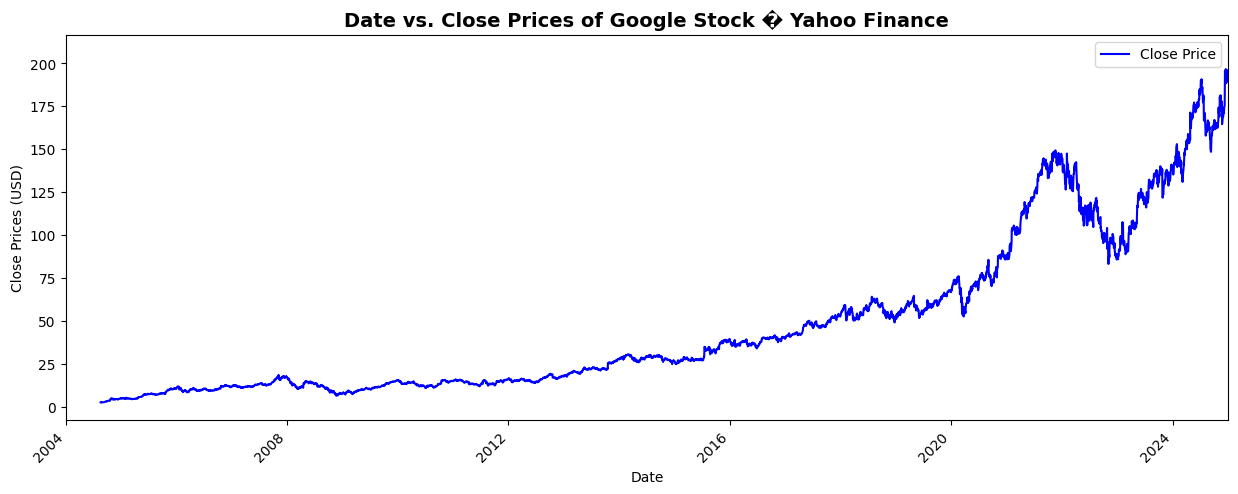

In [56]:
# Set up a figure with 3 subplots
plt.figure(figsize=(15, 5))

# Create the plot Apple stock prices vs. date
plt.plot(GOOGL['Date'], GOOGL['Close_Price_USD'],label='Close Price', color='blue')
#plt.plot(GOOGL['Date'], GOOGL['High_Price_USD'], label='High Price', color='green')
#plt.plot(GOOGL['Date'], GOOGL['Low_Price_USD'], label='Low Price', color='red')
#plt.plot(GOOGL['Date'], GOOGL['Open_Price_USD'], label='Open Price', color='black') 

# When needed. format the x-axis to show only the desired date interval
start_date_YYYY_MM_DD = '2004-01-01'
end_date_YYYY_MM_DD = '2025-01-01'
plt.xlim(pd.Timestamp(start_date_YYYY_MM_DD), pd.Timestamp(end_date_YYYY_MM_DD))


# Customize the plot
plt.title("Date vs. Close Prices of Google Stock � Yahoo Finance", fontsize=14, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Close Prices (USD)")
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.legend() # Add the legend

# Add quarterly earning report (QER) closing prices for GOOGL

The idea is 
1. To get the stock prices at each quarterly earning report date (QERD), from www.alphavantage.co
2. To define a date range before and after each QERD. Holidays and weekends which occur within the date ranges are excluded.
3. To plot the closing prices during these date ranges, together with the closing prices of Google stock from Yahoo Finance.

In [57]:
# Imports the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import msoffcrypto
from io import BytesIO

###  Get the stock prices at each quarterly earning report date (QERD) for GOOGL

In [58]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=EARNINGS&symbol=GOOGL&apikey=MA94VYU1XDN8Y7Z4'  # MA94VYU1XDN8Y7Z4 is the key
r = requests.get(url)
data = r.json()

# Show the data
# data

# Extract all the reported dates
# Extract 'quarterlyEarnings' into a DataFrame
df = pd.DataFrame(data['quarterlyEarnings'])

# Display the DataFrame
print(df)

#QERDs_GOOGL = df[['reportedDate', 'surprise', 'surprisePercentage']]  # The quarterly earnings report dates for GOOGL 
QERDs_GOOGL = df

# Create a CSV file as output.
QERDs_GOOGL.to_csv(r'G:\My Drive\LSE_Team_3\Data\QERDs_GOOGL.csv', index=False)

   fiscalDateEnding reportedDate reportedEPS estimatedEPS surprise  \
0        2024-12-31   2025-02-05        2.15        2.125    0.025   
1        2024-09-30   2024-10-29        2.12         1.85     0.27   
2        2024-06-30   2024-07-23        1.89         1.84     0.05   
3        2024-03-31   2024-04-25        1.89         1.51     0.38   
4        2023-12-31   2024-01-30        1.64         1.59     0.05   
..              ...          ...         ...          ...      ...   
77       2005-09-30   2005-10-20       0.038        0.034    0.004   
78       2005-06-30   2005-07-21       0.034       0.0305   0.0035   
79       2005-03-31   2005-04-21      0.0325        0.023   0.0095   
80       2004-12-31   2005-02-01       0.023       0.0195   0.0035   
81       2004-09-30   2004-10-21      0.0175        0.014   0.0035   

   surprisePercentage   reportTime  
0              1.1765  post-market  
1             14.5946  post-market  
2              2.7174  post-market  
3          

In [59]:
# Import the QERDs_GOOGL
file_path_QERDs_GOOGL = r'G:\My Drive\LSE_Team_3\Data\QERDs_GOOGL.csv'
QERDs_GOOGL = pd.read_csv(file_path_QERDs_GOOGL)

# Check the shape of the imported DataFrame
# print("Shape of the imported QERDs_GOOGL DataFrame:", QERDs_GOOGL.shape)

# Optionally, check the metadata (e.g., column names, data types)
# print("\nMetadata of the imported QERDs_GOOGL DataFrame:")
# print(QERDs_GOOGL.info())

# View DataFrame.
# print('\nQERDs_GOOGL')
# print(QERDs_GOOGL.head())
# print(QERDs_GOOGL.tail())


### Define a date range before and after each QERD for GOOGL

In [60]:
import pandas as pd

# Sample QERDs_GOOGL DataFrame (replace this with your actual data)
# QERDs_GOOGL = pd.DataFrame({
#     'reportedDate': ['2025-01-01', '2025-01-10'],
# })

# Convert 'reportedDate' to datetime format
QERDs_GOOGL['reportedDate'] = pd.to_datetime(QERDs_GOOGL['reportedDate'])

# Define the number of days before and after QERDs dynamically
Days_before_and_after_each_QERD = int(input("Enter the number of days before and after each QERD: "))

# Calculate start and end dates
QERDs_GOOGL['StartDate'] = QERDs_GOOGL['reportedDate'] - pd.Timedelta(days=Days_before_and_after_each_QERD)
QERDs_GOOGL['EndDate'] = QERDs_GOOGL['reportedDate'] + pd.Timedelta(days=Days_before_and_after_each_QERD)

# Function to create columns for each date between StartDate and EndDate
def create_date_columns(row):
    date_range = pd.date_range(row['StartDate'], row['EndDate'], freq='D')
    return pd.Series(date_range.values, index=[f"Day_{i+1}" for i in range(len(date_range))])

# Apply the function to each row
expanded_dates = QERDs_GOOGL.apply(create_date_columns, axis=1)

# Concatenate the original DataFrame with the expanded dates
expanded_QERDs_GOOGL = pd.concat([QERDs_GOOGL[['reportedDate']], expanded_dates], axis=1)

# Display the result
print(expanded_QERDs_GOOGL.shape)
print('Expanded QERDs GOOGL:')
print(expanded_QERDs_GOOGL.head())  # Display first few rows for checking

Enter the number of days before and after each QERD:  5


(82, 12)
Expanded QERDs GOOGL:
  reportedDate      Day_1      Day_2      Day_3      Day_4      Day_5  \
0   2025-02-05 2025-01-31 2025-02-01 2025-02-02 2025-02-03 2025-02-04   
1   2024-10-29 2024-10-24 2024-10-25 2024-10-26 2024-10-27 2024-10-28   
2   2024-07-23 2024-07-18 2024-07-19 2024-07-20 2024-07-21 2024-07-22   
3   2024-04-25 2024-04-20 2024-04-21 2024-04-22 2024-04-23 2024-04-24   
4   2024-01-30 2024-01-25 2024-01-26 2024-01-27 2024-01-28 2024-01-29   

       Day_6      Day_7      Day_8      Day_9     Day_10     Day_11  
0 2025-02-05 2025-02-06 2025-02-07 2025-02-08 2025-02-09 2025-02-10  
1 2024-10-29 2024-10-30 2024-10-31 2024-11-01 2024-11-02 2024-11-03  
2 2024-07-23 2024-07-24 2024-07-25 2024-07-26 2024-07-27 2024-07-28  
3 2024-04-25 2024-04-26 2024-04-27 2024-04-28 2024-04-29 2024-04-30  
4 2024-01-30 2024-01-31 2024-02-01 2024-02-02 2024-02-03 2024-02-04  


### Remove Holidays and  weekends.

In [14]:
# install the module for downloading the market holidays
# !pip install pandas-market-calendars

In [61]:
import pandas as pd
import numpy as np
from pandas.tseries.offsets import BDay
from pandas.tseries.holiday import USFederalHolidayCalendar

# Sample QERDs_GOOGL DataFrame (replace this with your actual data)
# QERDs_GOOGL = pd.DataFrame({
#     'reportedDate': ['2025-01-01', '2025-01-10'],
# })

# Convert 'reportedDate' to datetime format
QERDs_GOOGL['reportedDate'] = pd.to_datetime(QERDs_GOOGL['reportedDate'])


# Define U.S. Federal Holidays
us_holidays = USFederalHolidayCalendar().holidays(
    start=QERDs_GOOGL['reportedDate'].min() - pd.DateOffset(days=30),
    end=QERDs_GOOGL['reportedDate'].max() + pd.DateOffset(days=30)
)

# Function to get previous and next business days
def get_business_days(reference_date, num_days, direction):
    """ Get `num_days` business days before (-1) or after (1) reference_date, adjusting for weekends/holidays. """
    business_days = []
    date = reference_date
    while len(business_days) < num_days:
        date += BDay(direction)  # Move to next/previous business day
        while date in us_holidays:  # If it's a holiday, adjust again
            date += BDay(direction)
        business_days.append(date)
    return business_days

# Function to create adjusted date columns
def create_adjusted_date_columns(row):
    past_dates = get_business_days(row['reportedDate'], Days_before_and_after_each_QERD, -1)
    future_dates = get_business_days(row['reportedDate'], Days_before_and_after_each_QERD, 1)

    full_dates = past_dates + [row['reportedDate']] + future_dates
    return pd.Series(full_dates, index=[f"Day_{i+1}" for i in range(len(full_dates))])

# Apply function
adjusted_dates = QERDs_GOOGL.apply(create_adjusted_date_columns, axis=1)

# Concatenate results
adjusted_QERDs_GOOGL = pd.concat([QERDs_GOOGL[['reportedDate']], adjusted_dates], axis=1)

# Display results
print("Adjusted QERDs GOOGL, with holidays and weekends removed:")
print(adjusted_QERDs_GOOGL.shape)
print(adjusted_QERDs_GOOGL.head())

Adjusted QERDs GOOGL, with holidays and weekends removed:
(82, 12)
  reportedDate      Day_1      Day_2      Day_3      Day_4      Day_5  \
0   2025-02-05 2025-02-04 2025-02-03 2025-01-31 2025-01-30 2025-01-29   
1   2024-10-29 2024-10-28 2024-10-25 2024-10-24 2024-10-23 2024-10-22   
2   2024-07-23 2024-07-22 2024-07-19 2024-07-18 2024-07-17 2024-07-16   
3   2024-04-25 2024-04-24 2024-04-23 2024-04-22 2024-04-19 2024-04-18   
4   2024-01-30 2024-01-29 2024-01-26 2024-01-25 2024-01-24 2024-01-23   

       Day_6      Day_7      Day_8      Day_9     Day_10     Day_11  
0 2025-02-05 2025-02-06 2025-02-07 2025-02-10 2025-02-11 2025-02-12  
1 2024-10-29 2024-10-30 2024-10-31 2024-11-01 2024-11-04 2024-11-05  
2 2024-07-23 2024-07-24 2024-07-25 2024-07-26 2024-07-29 2024-07-30  
3 2024-04-25 2024-04-26 2024-04-29 2024-04-30 2024-05-01 2024-05-02  
4 2024-01-30 2024-01-31 2024-02-01 2024-02-02 2024-02-05 2024-02-06  


### Merge the adjusted GOOGL QERDs (no holidays, no weekends) with the GOOGL stock prices dataframe

In [62]:
# Ensure 'Date' is in datetime format in both DataFrames
GOOGL['Date'] = pd.to_datetime(GOOGL['Date'])
adjusted_QERDs_GOOGL.iloc[:, 1:] = adjusted_QERDs_GOOGL.iloc[:, 1:].apply(pd.to_datetime)

# Step 1: Convert expanded_QERDs_GOOGL to long format (stack all date columns below each other)
melted_QERDs = adjusted_QERDs_GOOGL.melt(id_vars=['reportedDate'], 
                                        var_name='Day', 
                                        value_name='Date')

# Step 2: Sort by date
melted_QERDs = melted_QERDs.sort_values(by='Date')

# Step 3: Merge with GOOGL to get closing prices
merged_GOOGL_and_adjusted_QERDs_GOOGL = melted_QERDs.merge(GOOGL, on='Date', how='left')

# Display final result
# print(merged_GOOGL_and_adjusted_QERDs_GOOGL.shape)
# print(merged_GOOGL_and_adjusted_QERDs_GOOGL.head())

# Remove the NaN rows
merged_GOOGL_and_adjusted_QERDs_GOOGL_No_NaN_axis_0 = merged_GOOGL_and_adjusted_QERDs_GOOGL.dropna().reset_index(drop=True)

merged_GOOGL_and_adjusted_QERDs_GOOGL_No_NaN_axis_0.shape

print(merged_GOOGL_and_adjusted_QERDs_GOOGL_No_NaN_axis_0)

    reportedDate    Day       Date  Close_Price_USD  High_Price_USD  \
0     2004-10-21  Day_5 2004-10-14         3.540719        3.550193   
1     2004-10-21  Day_4 2004-10-15         3.593330        3.627989   
2     2004-10-21  Day_3 2004-10-18         3.719250        3.720248   
3     2004-10-21  Day_2 2004-10-19         3.688830        3.800039   
4     2004-10-21  Day_1 2004-10-20         3.503067        3.715011   
..           ...    ...        ...              ...             ...   
890   2025-02-05  Day_2 2025-02-03       201.229996      203.750000   
891   2025-02-05  Day_1 2025-02-04       206.380005      207.050003   
892   2025-02-05  Day_6 2025-02-05       191.330002      192.750000   
893   2025-02-05  Day_7 2025-02-06       191.600006      192.100006   
894   2025-02-05  Day_8 2025-02-07       185.339996      191.179993   

     Low_Price_USD  Open_Price_USD       Volume  
0         3.454943        3.516033  208842948.0  
1         3.539471        3.613777  263895840.0

# Calculate and plot stock price movements for each date range around the QERD.

### Calculate the number of dataframes (num_df) related to the Days_before_and_after_each_QERD 

In [63]:
num_df = merged_GOOGL_and_adjusted_QERDs_GOOGL_No_NaN_axis_0.shape[0] // \
(2 * Days_before_and_after_each_QERD + 1)  # Applying the double slash operator (//) results in the integer number of the division.

print('The number of dataframes is', num_df)

The number of dataframes is 81


### Create the dataframes, one per QERD 

In [64]:
#Parameter that saves the number of days before and after each QERD
Days_before_and_after_each_QERD


# Get the unique QERD dates as a series
QERDs_GOOGL_series = merged_GOOGL_and_adjusted_QERDs_GOOGL_No_NaN_axis_0['reportedDate'].drop_duplicates().astype(str)

# Reset the index and start from 1
QERDs_GOOGL_series.index = range(1, len(QERDs_GOOGL_series) + 1)

shape_dataframe = merged_GOOGL_and_adjusted_QERDs_GOOGL_No_NaN_axis_0.shape[0]


for i in range(num_df):
    qerd_date = QERDs_GOOGL_series.iloc[i]  # Get the QERD date
    df_name = f"df{i+1}_QERDs_GOOGL_date_{qerd_date}"  # Name with the QERD date
    globals()[df_name] = \
    merged_GOOGL_and_adjusted_QERDs_GOOGL_No_NaN_axis_0.iloc[i*(2*Days_before_and_after_each_QERD+1):(i+1)*(2*Days_before_and_after_each_QERD+1)]
    
    #print(df_name, '\n', globals()[df_name], '\n')
    
    # Create CSV files as output for each df.
    file_path_df_name = r"G:\My Drive\LSE_Team_3\Data"
    # Save the actual DataFrame (globals()[df_name]) to CSV
    globals()[df_name].to_csv(f"{file_path_df_name}\\{df_name}.csv", index=False)

### Calculate Differences around QERDs (1 day after QERD minus 1 day before QERD; 2 days after QERD minus 2 days before QERD, ...)

In [65]:
# Loop through the number of DataFrames

# Get the unique QERD dates as a series
QERDs_GOOGL_series = merged_GOOGL_and_adjusted_QERDs_GOOGL_No_NaN_axis_0['reportedDate'].drop_duplicates().astype(str)

# Reset the index and start from 1
QERDs_GOOGL_series.index = range(1, len(QERDs_GOOGL_series) + 1)

for j in range(num_df):
    qerd_date = QERDs_GOOGL_series.iloc[j]  # Get the QERD date
    df_name = f"df{j+1}_QERDs_GOOGL_date_{qerd_date}"  # Name with the QERD date
    df = globals()[df_name]  # Retrieve the actual DataFrame
    # print(df_name)

    # Ensure the DataFrame is not empty
    if df.empty:
        continue  # Skip this iteration if df is empty

    # Get the middle position and value
    middle_position = df.shape[0] // 2
    middle_value = df.iloc[middle_position]['Close_Price_USD']  # Retrieves the full row at the middle position

    # Initialize an empty list to store results
    data_list = []
    
    for i in range(middle_position):
        diff = round((df.iloc[2 * Days_before_and_after_each_QERD - i]['Close_Price_USD'] - df.iloc[i]['Close_Price_USD']), 2)
        data_list.append([i + 1, diff])  # Adding i+1 as an index column

    # Convert the list to a DataFrame
    df_result = pd.DataFrame(data_list, columns=['Index', 'Price_Difference'])
    
    # Store the results in a new variable (or overwrite the old one)
    globals()[f"df_result_{j}"] = df_result  

    # print(f"Differeces for {df_name}:\n", df_result)

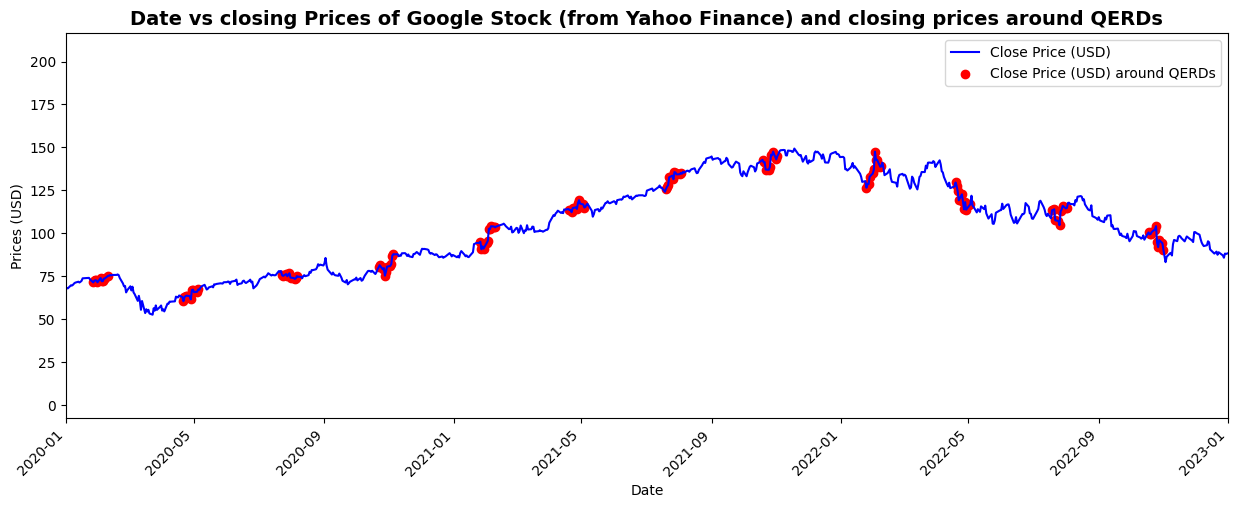

In [66]:
plt.figure(figsize=(15, 5))

# When needed. format the x-axis to show only the desired date interval
start_date_YYYY_MM_DD = '2020-01-01'
end_date_YYYY_MM_DD = '2023-01-01'
plt.xlim(pd.Timestamp(start_date_YYYY_MM_DD), pd.Timestamp(end_date_YYYY_MM_DD))

# Create the plot Google stock prices vs. date
plt.plot(GOOGL['Date'], 
         GOOGL['Close_Price_USD'],
         label='Close Price (USD)', 
         color='blue'
        )

# Create the plot Google stock prices around quarterly earning reports 
plt.scatter(merged_GOOGL_and_adjusted_QERDs_GOOGL['Date'],
            merged_GOOGL_and_adjusted_QERDs_GOOGL['Close_Price_USD'], 
            label='Close Price (USD) around QERDs', 
            color='red'
           )

# Customize the plot
plt.title("Date vs closing Prices of Google Stock (from Yahoo Finance) and closing prices around QERDs", fontsize=14, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Prices (USD)")
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.legend() # Add the legend

### Calculate the percentage increments around QERDs (1 day after QERD w.r.t. 1 day before QERD; 2 days after QERD w.r.t. 2 days before QERD, ...).  

In [69]:
# Loop through the number of DataFrames

# Get the unique QERD dates as a series
QERDs_GOOGL_series = merged_GOOGL_and_adjusted_QERDs_GOOGL_No_NaN_axis_0['reportedDate'].drop_duplicates().astype(str)

# Reset the index and start from 1
QERDs_GOOGL_series.index = range(1, len(QERDs_GOOGL_series) + 1)

for j in range(num_df):
    qerd_date = QERDs_GOOGL_series.iloc[j]  # Get the QERD date
    df_name = f"df{j+1}_QERDs_GOOGL_date_{qerd_date}"  # Name with the QERD date
    df = globals()[df_name]  # Retrieve the actual DataFrame
    #print(df_name)

    # Ensure the DataFrame is not empty
    if df.empty:
        continue  # Skip this iteration if df is empty

    # Get the middle position and value
    middle_position = df.shape[0] // 2
    middle_value = df.iloc[middle_position]['Close_Price_USD']  # Retrieves the full row at the middle position

    # Initialize an empty list to store results
    data_list = []

# for i in range(middle_position):
#         diff = round((df.iloc[2 * Days_before_and_after_each_QERD - i]['Close_Price_USD'] - df.iloc[i]['Close_Price_USD']), 2)
#         data_list.append([i + 1, diff])  # Adding i+1 as an index column
    
    for i in range(middle_position):
        increment = round(((df.iloc[2 * Days_before_and_after_each_QERD - i]['Close_Price_USD'] / df.iloc[i]['Close_Price_USD'] -1) * 100), 1)
        data_list.append([i + 1, increment])  # Adding i+1 as an index column

    # Convert the list to a DataFrame
    df_result = pd.DataFrame(data_list, columns=['Index', 'Price_increment_%'])
    
    # Store the results in a new variable (or overwrite the old one)
    globals()[f"df_result_{j}"] = df_result  

    #print(f"Price increment (%) for {df_name}:\n", df_result)

### Calculate increments vs. QERD

The nth increment (%) is calculated as: 
$$ \left[ \frac{\text{Price at } (QERD + n \text{ days}) - \text{Price at QERD}}{\text{Price at QERD}} \right] \times 100 $$

or  

$$ \left[ \frac{\text{Price at } (QERD - n \text{ days}) - \text{Price at QERD}}{\text{Price at QERD}} \right] \times 100 $$


In [70]:
# Loop through the number of DataFrames

# Get the unique QERD dates as a series
QERDs_GOOGL_series = merged_GOOGL_and_adjusted_QERDs_GOOGL_No_NaN_axis_0['reportedDate'].drop_duplicates().astype(str)

# Reset the index and start from 1
QERDs_GOOGL_series.index = range(1, len(QERDs_GOOGL_series) + 1)

for j in range(num_df):
    qerd_date = QERDs_GOOGL_series.iloc[j]  # Get the QERD date
    df_name = f"df{j+1}_QERDs_GOOGL_date_{qerd_date}"  # Name with the QERD date
    df = globals()[df_name]  # Retrieve the actual DataFrame
    #print(df_name)
    
    # Ensure the DataFrame is not empty
    if df.empty:
        continue  # Skip this iteration if df is empty

    # Get the middle position and value
    middle_position = df.shape[0] // 2
    middle_value = df.iloc[middle_position]['Close_Price_USD']  # Retrieves the full row at the middle position
    
    # Initialize an empty list to store results
    data_list = []
    
    for i in range(2*Days_before_and_after_each_QERD+1):
        increment = round(
            ((df.iloc[2*Days_before_and_after_each_QERD - i]['Close_Price_USD'] / 
                            df.iloc[middle_position]['Close_Price_USD'] -1) * 100)
            , 1)
        data_list.append([(Days_before_and_after_each_QERD) - i, increment])  # Adding index column as number of days before and after QERD

    # Convert the list to a DataFrame
    df_result = pd.DataFrame(data_list, columns=['Index', 'Price_increment_%'])
    
    # Store the results in a new variable (or overwrite the old one)
    globals()[f"df_result_{j}"] = df_result  

   # print(f"Price increment (%) for {df_name}:\n", df_result)

### Plot a heatmap of increment per QERD and per days before and after each QERD

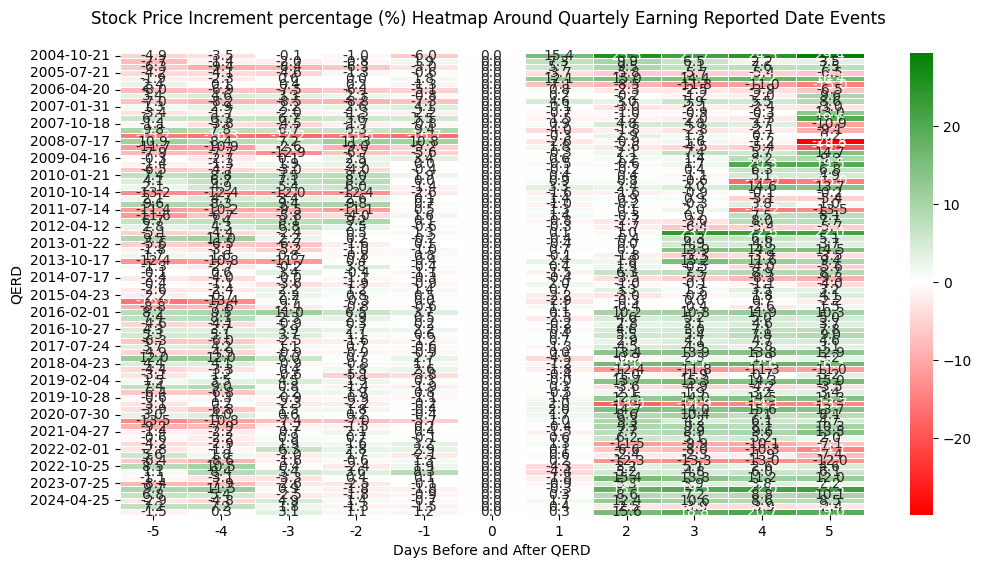

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap

cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 

# Create an empty DataFrame to store all results
heatmap_data = pd.DataFrame()

for j in range(num_df):
    df_result = globals().get(f"df_result_{j}")  # Retrieve the result DataFrame
    
    if df_result is None or df_result.empty:
        continue  # Skip if no data
    
    qerd_date = QERDs_GOOGL_series.iloc[j]  # Get the QERD date
    df_result['reportedDate'] = qerd_date  # Add QERD date as a column

    heatmap_data = pd.concat([heatmap_data, df_result], ignore_index=True)


# Pivot the data to have days before/after on X-axis and QERD dates on Y-axis
heatmap_pivot = heatmap_data.pivot(index='reportedDate', columns='Index', values='Price_increment_%')

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_pivot, 
            cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256), 
            annot=True, fmt=".1f", 
            linewidths=0.5, center=0
           )

# Labels and title
plt.xlabel('Days Before and After QERD')
plt.ylabel('QERD')
plt.title('Stock Price Increment percentage (%) Heatmap Around Quartely Earning Reported Date Events \n')

# Rotate the Y-axis labels for better readability
plt.yticks(rotation=0)
plt.xticks(rotation=0)

# Show the heatmap
plt.show()

In [72]:
# Convert reportedDate to datetime format (if not already)
QERDs_GOOGL['reportedDate'] = pd.to_datetime(QERDs_GOOGL['reportedDate'])

# Filter data for reportedDate between 2020 and 2022
filtered_QERDs_GOOGL = QERDs_GOOGL[(QERDs_GOOGL['reportedDate'] >= '2020-03-01') & 
                                 (QERDs_GOOGL['reportedDate'] <= '2022-12-31')]

# Display filtered data
print(filtered_QERDs_GOOGL)

   fiscalDateEnding reportedDate  reportedEPS  estimatedEPS  surprise  \
9        2022-09-30   2022-10-25       1.0600        1.2500    -0.190   
10       2022-06-30   2022-07-26       1.2100        1.2800    -0.070   
11       2022-03-31   2022-04-26       1.2300        1.3000    -0.070   
12       2021-12-31   2022-02-01       1.5300        1.3700     0.160   
13       2021-09-30   2021-10-26       1.4000        1.1700     0.230   
14       2021-06-30   2021-07-27       1.3600        0.9700     0.390   
15       2021-03-31   2021-04-27       1.3100        0.7900     0.520   
16       2020-12-31   2021-02-02       1.1200        0.8000     0.320   
17       2020-09-30   2020-10-29       0.8200        0.5600     0.260   
18       2020-06-30   2020-07-30       0.5100        0.4100     0.100   
19       2020-03-31   2020-04-28       0.4935        0.5165    -0.023   

    surprisePercentage   reportTime  StartDate    EndDate  
9             -15.2000  post-market 2022-10-20 2022-10-30  
10 

### The surprise percentage is calculated as 

$$ \left( \frac{\text{reported EPS}} {\text{estimated EPS}} -1 \right)   \times 100 $$

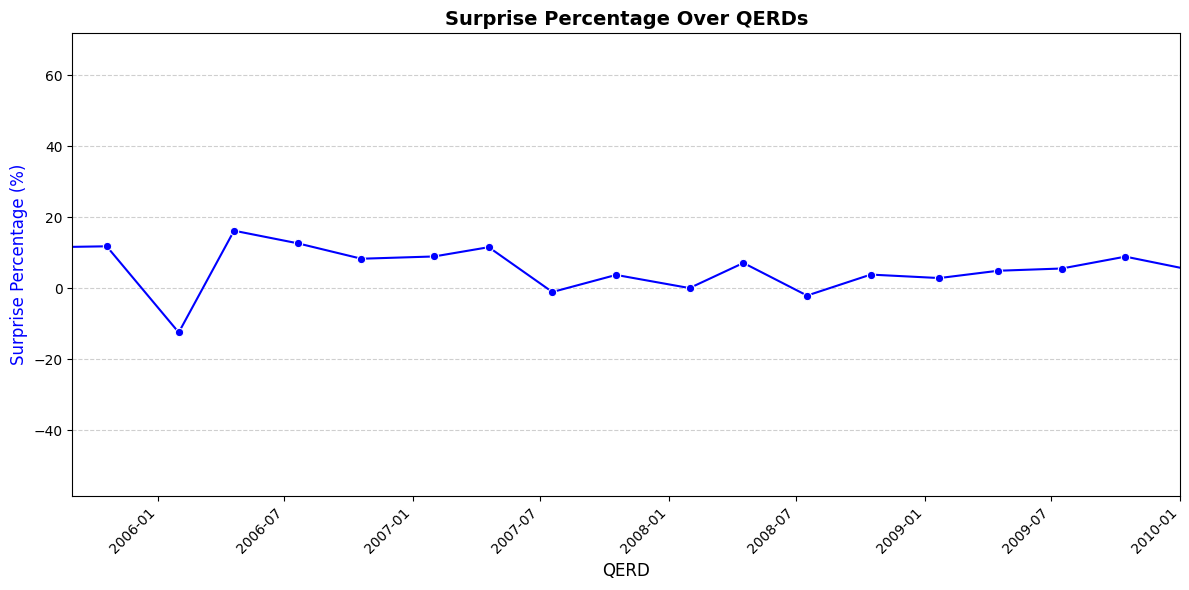

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'reportedDate' is in datetime format
QERDs_GOOGL['reportedDate'] = pd.to_datetime(QERDs_GOOGL['reportedDate'])

# Sort by reportedDate
QERDs_GOOGL = QERDs_GOOGL.sort_values(by='reportedDate')

# Set figure size
plt.figure(figsize=(12, 6))

# When needed. format the axis to show only the desired date interval
start_date_YYYY_MM_DD = '2005-09-01'
end_date_YYYY_MM_DD = '2010-01-01'
plt.xlim(pd.Timestamp(start_date_YYYY_MM_DD), pd.Timestamp(end_date_YYYY_MM_DD))


# Create line plot
sns.lineplot(
    data=QERDs_GOOGL,
    x='reportedDate',
    y='surprisePercentage',
    marker='o',
    linestyle='-',
    color='blue'
)

# Labels and title
plt.xlabel('QERD', fontsize=12)
plt.ylabel('Surprise Percentage (%)', fontsize=12, color='blue')
plt.title('Surprise Percentage Over QERDs', fontsize=14, fontweight='bold')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show plot
plt.tight_layout()
plt.show()

### Plot a boxplot of increment per QERD

Here, the time interval to consider can be chosen, and conclusions on how surprise percentage correlates with the movements of stock price around QERDs can be drawn.
The time interval can be a period between two quarters of any year, but a time interval of only a specific quarter (e.g., only Q1 from 2003 to 2023). 

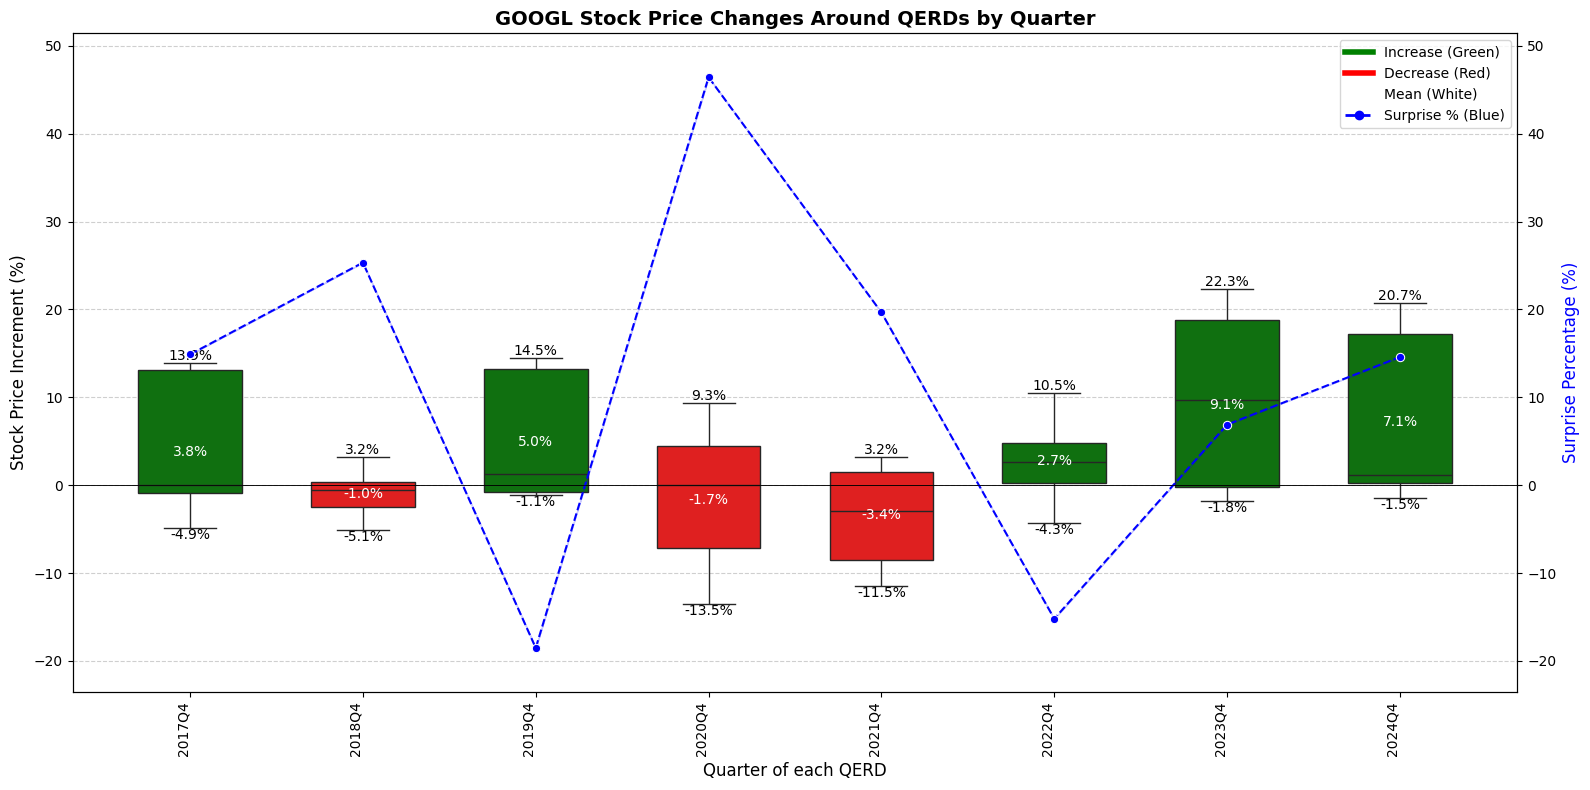

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'reportedDate' is datetime
heatmap_data['reportedDate'] = pd.to_datetime(heatmap_data['reportedDate'])
QERDs_GOOGL['reportedDate'] = pd.to_datetime(QERDs_GOOGL['reportedDate'])

# Merge datasets
merged_data = pd.merge(heatmap_data, QERDs_GOOGL[['reportedDate', 'surprisePercentage']], on='reportedDate', how='left')

# Make sure the reportedDate column is categorical to avoid errors in set_xticklabels
merged_data['reportedDate'] = pd.Categorical(merged_data['reportedDate'], categories=merged_data['reportedDate'].unique(), ordered=True)


# Create Quarter column
merged_data['reportedDate'] = merged_data['reportedDate'].dt.to_period('Q').astype(str)


#Filter dataset for a specific quarter (e.g., Q2) of each year
merged_data = merged_data[merged_data['reportedDate'].str.endswith('Q4')]


# Filter dataset for the desired range

start_quarter = '2017Q1'
end_quarter = '2024Q4'
merged_data = merged_data[
    (merged_data['reportedDate'] >= start_quarter) & (merged_data['reportedDate'] <= end_quarter)
]


# Calculate means
quarter_means = merged_data.groupby('reportedDate')['Price_increment_%'].mean()

# Determine the common y-axis range
left_min = merged_data['Price_increment_%'].min()
left_max = merged_data['Price_increment_%'].max()
right_min = merged_data['surprisePercentage'].min()
right_max = merged_data['surprisePercentage'].max()

common_min = min(left_min, right_min)
common_max = max(left_max, right_max)

# Create the figure
fig, ax1 = plt.subplots(figsize=(16, 8))

# Boxplot on the primary y-axis
sns.boxplot(
    data=merged_data,
    x='reportedDate',
    y='Price_increment_%',
    width=0.6,
    hue='reportedDate',  # Assigning hue to avoid the warning
    palette=['red' if mean < 0 else 'green' for mean in quarter_means],
    ax=ax1
)

# Add the secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(
    data=merged_data,
    x='reportedDate',
    y='surprisePercentage',
    marker='o',
    linestyle='dashed',
    color='blue',
    ax=ax2
)

# Set y-axis limits to align the 0
ax1.set_ylim(common_min-5, common_max+5)
ax2.set_ylim(common_min-5, common_max+5)

# Add labels to the boxplot
for i, quarter in enumerate(merged_data['reportedDate'].unique()):
    subset = merged_data[merged_data['reportedDate'] == quarter]
    max_value = subset['Price_increment_%'].max()
    min_value = subset['Price_increment_%'].min()
    mean_value = subset['Price_increment_%'].mean()
    
    ax1.text(i, max_value, f'{max_value:.1f}%', ha='center', va='bottom', fontsize=10, color='black')
    ax1.text(i, min_value, f'{min_value:.1f}%', ha='center', va='top', fontsize=10, color='black')
    ax1.text(i, mean_value, f'{mean_value:.1f}%', ha='center', va='center', fontsize=10, color='white')

# Set labels and title
ax1.set_xlabel('Quarter of each QERD', fontsize=12)
ax1.set_ylabel('Stock Price Increment (%)', fontsize=12)
ax2.set_ylabel('Surprise Percentage (%)', fontsize=12, color='blue')
plt.title('GOOGL Stock Price Changes Around QERDs by Quarter', fontsize=14, fontweight='bold')


# Rotate x-axis labels properly
ax1.set_xticks(range(len(merged_data['reportedDate'].unique())))  # Set fixed tick positions
ax1.set_xticklabels(merged_data['reportedDate'].unique(), rotation=90, ha='right')  # Rotate labels

# Add horizontal lines at zero
ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)


# Add gridlines for readability
ax1.grid(axis='y', linestyle='--', alpha=0.6)

# Add legend
legend_labels = ['Increase (Green)', 'Decrease (Red)', 'Mean (White)', 'Surprise % (Blue)']
handles = [
    plt.Line2D([0], [0], color='green', lw=4),
    plt.Line2D([0], [0], color='red', lw=4),
    plt.Line2D([0], [0], color='white', marker='o', lw=0),
    plt.Line2D([0], [0], color='blue', linestyle='dashed', marker='o', lw=2)
]
plt.legend(handles, legend_labels, loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

In [75]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Import stock data

In [76]:
# Load the GOOGL stock price data
file_path_GOOGL_cleaned = r'G:\My Drive\LSE_Team_3\Data\GOOGL_cleaned.csv'
data_GOOGL = pd.read_csv(file_path_GOOGL_cleaned)

# Change date column type from object into date
data_GOOGL.rename(columns={'Date': 'date'}, inplace=True)  #Rename columns for clarity
data_GOOGL.rename(columns={'Close_Price_USD': 'GOOGL_Close_Price_USD'}, inplace=True)
data_GOOGL['date'] = pd.to_datetime(data_GOOGL['date'])  # Change date column type from object into date

# Preview the DataFrames
print(data_GOOGL.head())

        date  GOOGL_Close_Price_USD  High_Price_USD  Low_Price_USD  \
0 2004-08-19               2.501941        2.594698       2.392727   
1 2004-08-20               2.700670        2.719870       2.505931   
2 2004-08-23               2.727849        2.829582       2.719122   
3 2004-08-24               2.614895        2.782705       2.582480   
4 2004-08-25               2.643072        2.692941       2.590210   

   Open_Price_USD     Volume  
0        2.493464  893181924  
1        2.518648  456686856  
2        2.761511  365122512  
3        2.773729  304946748  
4        2.617140  183772044  


### Import quarterly earnings

In [77]:
file_path_QERDs_GOOGL_complete = r'G:\My Drive\LSE_Team_3\Data\QERDs_GOOGL_complete.csv'
data_QERDs_GOOGL_complete = pd.read_csv(file_path_QERDs_GOOGL_complete)

# Change date columns type from object into date
data_QERDs_GOOGL_complete['fiscalDateEnding'] = pd.to_datetime(data_QERDs_GOOGL_complete['fiscalDateEnding'])
data_QERDs_GOOGL_complete['reportedDate'] = pd.to_datetime(data_QERDs_GOOGL_complete['reportedDate'])

# Preview the DataFrames
print(data_QERDs_GOOGL_complete.head())

  fiscalDateEnding reportedDate  reportedEPS  estimatedEPS  surprise  \
0       2024-12-31   2025-02-05         2.15         2.125     0.025   
1       2024-09-30   2024-10-29         2.12         1.850     0.270   
2       2024-06-30   2024-07-23         1.89         1.840     0.050   
3       2024-03-31   2024-04-25         1.89         1.510     0.380   
4       2023-12-31   2024-01-30         1.64         1.590     0.050   

   surprisePercentage   reportTime  
0              1.1765  post-market  
1             14.5946  post-market  
2              2.7174  post-market  
3             25.1656  post-market  
4              3.1447  post-market  


### Import macro economical data

In [78]:
# Load the CPI data
file_path_df_CPI = r'G:\My Drive\LSE_Team_3\Data\df_CPI.csv'
data_CPI = pd.read_csv(file_path_df_CPI)


data_CPI['date'] = pd.to_datetime(data_CPI['date'])  # Change date column type from object into date
data_CPI.rename(columns={'value': 'value_CPI'}, inplace=True)  # Rename value column for clarity
data_CPI = data_CPI.drop(columns=['Unnamed: 0'])  # drop unnecessary columns

# Preview the DataFrames
print('CPI\n', data_CPI.head())

#########################################################################################

# Load the unemployment data
file_path_data_unemployment = r'G:\My Drive\LSE_Team_3\Data\data_unemployment.csv'
data_unemployment = pd.read_csv(file_path_data_unemployment)

data_unemployment['date'] = pd.to_datetime(data_unemployment['date'])  # Change date column type from object into date
data_unemployment.rename(columns={'value': 'value_unemployment'}, inplace=True)  # Rename value column for clarity
data_unemployment = data_unemployment.drop(columns=['Unnamed: 0'])  # drop unnecessary columns

# Preview the DataFrames
print('\n Unemployment rate \n', data_unemployment.head())

##########################################################################################

# Load the FED Funds interest rates data
file_path_FEDFUNDS = r'G:\My Drive\LSE_Team_3\Data\FEDFUNDS.csv'
data_FEDFUNDS = pd.read_csv(file_path_FEDFUNDS)

data_FEDFUNDS.rename(columns={'observation_date': 'date'}, inplace=True)  # Rename date columns for consistency
data_FEDFUNDS['date'] = pd.to_datetime(data_FEDFUNDS['date'])  # Change date column type from object into date
data_FEDFUNDS.rename(columns={'FEDFUNDS': 'value_FEDFUNDS'}, inplace=True)  # Rename value column for clarity


# Preview the DataFrames
print('\n FED Funds interest rates \n', data_FEDFUNDS.head())

CPI
         date  value_CPI
0 1913-01-01        9.8
1 1913-02-01        9.8
2 1913-03-01        9.8
3 1913-04-01        9.8
4 1913-05-01        9.7

 Unemployment rate 
         date  value_unemployment
0 1948-01-01                 3.4
1 1948-02-01                 3.8
2 1948-03-01                 4.0
3 1948-04-01                 3.9
4 1948-05-01                 3.5

 FED Funds interest rates 
         date  value_FEDFUNDS
0 1954-07-01            0.80
1 1954-08-01            1.22
2 1954-09-01            1.07
3 1954-10-01            0.85
4 1954-11-01            0.83


### Import Articles Tokenized

In [79]:
df_articles_tokenized = pd.read_csv(r'G:\My Drive\LSE_Team_3\Data\articles_tokenized.csv')

df_articles_tokenized.rename(columns={'pub_date': 'date'}, inplace=True)  # Rename pub_date column for clarity
df_articles_tokenized['date'] = pd.to_datetime(df_articles_tokenized['date'])  # Change date column type from object into date
df_articles_tokenized = df_articles_tokenized.drop(columns=['index',
                                                           'sentiment_abstract',
                                                           'sentiment_snippet'])  # drop unnecessary columns

# Check the shape of the imported DataFrame
print("Shape of the imported DataFrame:", df_articles_tokenized.shape)

# View DataFrame.
df_articles_tokenized

Shape of the imported DataFrame: (1464, 5)


,abstract,snippet,date,polarity_abstract,polarity_snippet
0,like its host city the ces trade show largely ...,like its host city the ces trade show largely ...,2019-01-09,0.103571,0.071429
1,by carving the stock market into specialized s...,by carving the stock market into specialized s...,2019-01-11,0.000000,0.000000
2,the couple met in 2013 through a mutual friend...,the couple met in 2013 through a mutual friend...,2019-01-13,0.000000,0.000000
3,all of the weddings right here on one handy pa...,all of the weddings right here on one handy pa...,2019-01-13,0.442857,0.442857
4,stocks slumped from the start with selling wor...,stocks slumped from the start with selling wor...,2019-01-22,-0.200000,-0.200000
...,...,...,...,...,...
1459,listen to our interview with sundar pichai,listen to our interview with sundar pichai,2024-12-20,0.000000,0.000000
1460,äúthe troublemakeräù is a brisk account of the...,äúthe troublemakeräù is a brisk account of the...,2024-12-20,0.000000,0.000000
1461,the search giantäôs proposals included allowin...,the search giantäôs proposals included allowin...,2024-12-21,0.000000,0.000000
1462,the federal judge who ruled google was a monop...,the federal judge who ruled google was a monop...,2024-12-21,0.000000,0.000000


In [80]:
import pandas as pd

# Select rows where "apple" is in the 'abstract' or 'snippet' columns (case-insensitive)
df_GOOGL = df_articles_tokenized[
    df_articles_tokenized['abstract'].str.contains('google', case=False, na=False) | 
    df_articles_tokenized['snippet'].str.contains('google', case=False, na=False)
]

# Display results
print(df_GOOGL)

                                               abstract  \
22    his tweets criticize facebook and google but t...   
27    a partnership with google is part of a global ...   
28    hundreds of thousands of miles of cable connec...   
31    the payment to amit singhal who ran googleäôs ...   
43    by focusing on streaming games with its stadia...   
...                                                 ...   
1445  google unveiled an experimental machine capabl...   
1446      plus googleäôs quantum computing breakthrough   
1453  googleäôs chief executive spoke with andrew ro...   
1457  companies like openai and google are running o...   
1462  the federal judge who ruled google was a monop...   

                                                snippet       date  \
22    his tweets criticize facebook and google but t... 2019-03-06   
27    a partnership with google is part of a global ... 2019-03-10   
28    hundreds of thousands of miles of cable connec... 2019-03-11   
31    the p

### Merge all the dataframes

In [81]:
# Merge all dataframes based on 'date' in data_AAPL (left join)
merged_all_df = (
    data_GOOGL
    .merge(data_CPI, on='date', how='left')
    .merge(data_unemployment, on='date', how='left')
    .merge(data_FEDFUNDS, on='date', how='left')
    .merge(df_GOOGL, on='date', how='left')
)

# Merge earnings data (quarterly) separately, using 'reportedDate'
merged_all_df = merged_all_df.merge(data_QERDs_GOOGL_complete, left_on='date', right_on='reportedDate', how='left')

# Sort by date
merged_all_df = merged_all_df.sort_values(by='date')

# Forward-fill and backward-fill missing values
merged_all_df.ffill(inplace=True)  # Fill forward
merged_all_df.bfill(inplace=True)  # Fill backward

# Reset index to start from 0
merged_all_df = merged_all_df.reset_index(drop=True)

# Display the final merged dataset
print(merged_all_df)
print(merged_all_df.shape)

           date  GOOGL_Close_Price_USD  High_Price_USD  Low_Price_USD  \
0    2004-08-19               2.501941        2.594698       2.392727   
1    2004-08-20               2.700670        2.719870       2.505931   
2    2004-08-23               2.727849        2.829582       2.719122   
3    2004-08-24               2.614895        2.782705       2.582480   
4    2004-08-25               2.643072        2.692941       2.590210   
...         ...                    ...             ...            ...   
5164 2025-02-03             201.229996      203.750000     200.100006   
5165 2025-02-04             206.380005      207.050003     202.809998   
5166 2025-02-05             191.330002      192.750000     188.029999   
5167 2025-02-06             191.600006      192.100006     188.720001   
5168 2025-02-07             185.339996      191.179993     183.240005   

      Open_Price_USD     Volume  value_CPI  value_unemployment  \
0           2.493464  893181924    189.900               

### Calculate correlation matrix

      GOOGL_Close_Price_USD  value_CPI  value_unemployment  value_FEDFUNDS  \
0                  2.501941    189.900                 5.4            1.61   
1                  2.700670    189.900                 5.4            1.61   
2                  2.727849    189.900                 5.4            1.61   
3                  2.614895    189.900                 5.4            1.61   
4                  2.643072    189.900                 5.4            1.61   
...                     ...        ...                 ...             ...   
5164             201.229996    315.493                 4.2            4.64   
5165             206.380005    315.493                 4.2            4.64   
5166             191.330002    315.493                 4.2            4.64   
5167             191.600006    315.493                 4.2            4.64   
5168             185.339996    315.493                 4.2            4.64   

      reportedEPS  surprisePercentage  polarity_abstract  polar

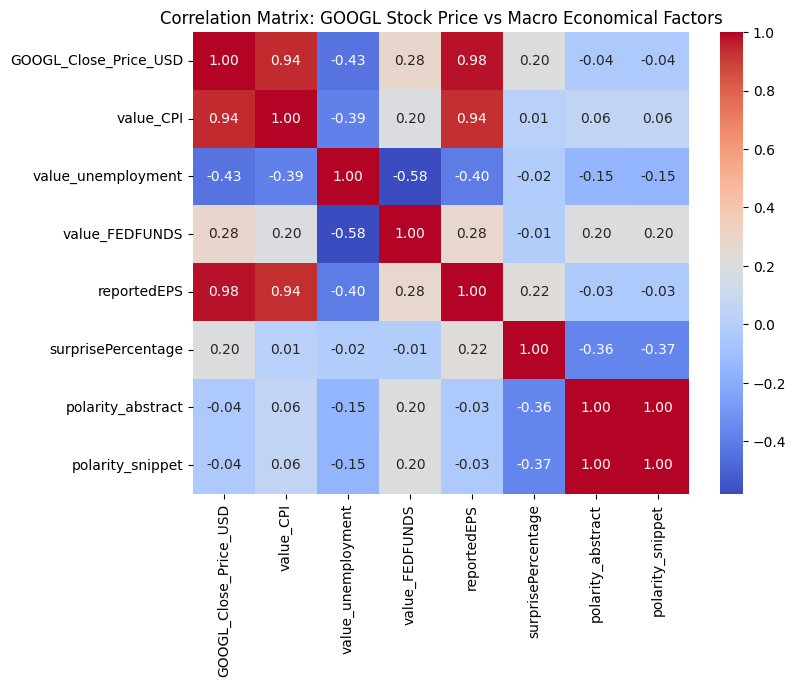

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for correlation analysis
corr_data = merged_all_df[['GOOGL_Close_Price_USD', 
                           'value_CPI', 
                           'value_unemployment', 
                           'value_FEDFUNDS', 
                           'reportedEPS', 
                           'surprisePercentage',
                           'polarity_abstract',
                           'polarity_snippet'
                          ]]
print(corr_data)

# Compute correlation matrix
corr_matrix = corr_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: GOOGL Stock Price vs Macro Economical Factors")
plt.show()

### Regression Analysis

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Define independent (X) and dependent (Y) variables
X = corr_data[['value_CPI', 
               'value_unemployment', 
               'value_FEDFUNDS', 
               'reportedEPS', 
               'surprisePercentage',
               'polarity_abstract',
               'polarity_snippet'
             ]]
Y = corr_data['GOOGL_Close_Price_USD']

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)

print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Model Coefficients: {dict(zip(X.columns, model.coef_))}")

R-squared: 0.9654
Mean Squared Error: 74.2552
Model Coefficients: {'value_CPI': np.float64(0.30393773678458064), 'value_unemployment': np.float64(-0.9342894386096141), 'value_FEDFUNDS': np.float64(0.3792658920660923), 'reportedEPS': np.float64(69.14535243426684), 'surprisePercentage': np.float64(0.045587451477870466), 'polarity_abstract': np.float64(29.850607352132485), 'polarity_snippet': np.float64(-37.227024051243376)}


In [84]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Define independent (X) and dependent (Y) variables
X = corr_data[['value_CPI', 
               'value_unemployment', 
               'value_FEDFUNDS', 
               'reportedEPS', 
               'surprisePercentage',
              # 'polarity_abstract',
              # 'polarity_snippet'
             ]]
Y = corr_data['GOOGL_Close_Price_USD']


# Add a constant for the intercept
X = sm.add_constant(X)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the OLS (Ordinary Least Squares) regression model
model = sm.OLS(Y_train, X_train).fit()

# Get the summary of the regression results
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     GOOGL_Close_Price_USD   R-squared:                       0.966
Model:                               OLS   Adj. R-squared:                  0.966
Method:                    Least Squares   F-statistic:                 2.340e+04
Date:                   Tue, 18 Feb 2025   Prob (F-statistic):               0.00
Time:                           17:49:15   Log-Likelihood:                -14827.
No. Observations:                   4135   AIC:                         2.967e+04
Df Residuals:                       4129   BIC:                         2.970e+04
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const 

### Linear Regression Analysis

In [85]:
from sklearn.linear_model import LinearRegression

X = corr_data[['value_CPI', 
               'value_unemployment', 
               'value_FEDFUNDS', 
               'reportedEPS', 
               'surprisePercentage',
               'polarity_abstract',
               'polarity_snippet'
             ]]
Y = corr_data['GOOGL_Close_Price_USD']

model = LinearRegression()
model.fit(X, Y)
print("Regression Coefficients:", model.coef_)

Regression Coefficients: [ 3.14776868e-01 -9.00432175e-01  3.91259389e-01  6.82680530e+01
  5.21844844e-02  2.91560299e+01 -3.59162572e+01]


### Granger Causality Test (to check if a macro factor <b>predicts</b> stock prices)

Interpretation:

If the p-value for any lag is < 0.05, the null hypothesis that the (macro economical) parameter does not Granger-cause STOCK_Close_Price_USD is rejected, meaning that value_CPI provides predictive information about STOCK_Close_Price_USD.

If all p-values for any lag is > 0.05, the null hypothesis that the (macro economical) parameter does not Granger-cause STOCK_Close_Price_USD is failed to be rejected, meaning there's no strong evidence that the (macro economical) parameter Granger-causes STOCK_Close_Price_USD.

A lag in the Granger Causality Test refers to how many past values of one time series (X) are used to predict another time series (Y). Mathematically, the test checks if past values of X (up to a certain number of lags) help predict Y. For example, if the Granger causality is tested with maxlag=4, the model evaluates whether the past 1 to 4 time periods of X influence Y.

For example, a maxlag = 4 checks if a (macro economical) factor at t-1, t-2, t-3, and t-4 helps predict STOCK_Close_Price_USD at t.

If p-value < 0.05 at any lag, it means that the (macro economical) factor values contain predictive power for STOCK�s stock price.

In [86]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(merged_all_df[['value_CPI', 'GOOGL_Close_Price_USD']].dropna(), maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.1241  , p=0.0025  , df_denom=5165, df_num=1
ssr based chi2 test:   chi2=9.1294  , p=0.0025  , df=1
likelihood ratio test: chi2=9.1214  , p=0.0025  , df=1
parameter F test:         F=9.1241  , p=0.0025  , df_denom=5165, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.5212  , p=0.0040  , df_denom=5162, df_num=2
ssr based chi2 test:   chi2=11.0530 , p=0.0040  , df=2
likelihood ratio test: chi2=11.0412 , p=0.0040  , df=2
parameter F test:         F=5.5212  , p=0.0040  , df_denom=5162, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.4166  , p=0.0042  , df_denom=5159, df_num=3
ssr based chi2 test:   chi2=13.2676 , p=0.0041  , df=3
likelihood ratio test: chi2=13.2506 , p=0.0041  , df=3
parameter F test:         F=4.4166  , p=0.0042  , df_denom=5159, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.8325  , p=0.

{np.int64(1): ({'ssr_ftest': (np.float64(9.124111598918608),
    np.float64(0.002534970428140427),
    np.float64(5165.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(9.129411179711786),
    np.float64(0.002515326617422728),
    np.int64(1)),
   'lrtest': (np.float64(9.12135698826205),
    np.float64(0.0025264248757646897),
    np.int64(1)),
   'params_ftest': (np.float64(9.124111599142902),
    np.float64(0.002534970427831101),
    np.float64(5165.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(5.521157661133928),
    np.float64(0.004024877655578882),
    np.float64(5162.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(11.05301109456761),
    np.float64(0.0039798722934088135),
    np.int64(2)),
   'lrtest': (np.float64(11.04120587802754),
    np.float64(0.004003433388070458),
    np.int64(2)),
   'params_ftest': (np.float64(5.5211576611587105),
    np.float64(0.00402487765548056),
    np.float64(5162.0),
    2.0)},
   array([[0., 0., 1., 0.

In [87]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(merged_all_df[['value_unemployment', 'GOOGL_Close_Price_USD']].dropna(), maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.8609  , p=0.0495  , df_denom=5165, df_num=1
ssr based chi2 test:   chi2=3.8632  , p=0.0494  , df=1
likelihood ratio test: chi2=3.8617  , p=0.0494  , df=1
parameter F test:         F=3.8609  , p=0.0495  , df_denom=5165, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.1319  , p=0.1187  , df_denom=5162, df_num=2
ssr based chi2 test:   chi2=4.2679  , p=0.1184  , df=2
likelihood ratio test: chi2=4.2661  , p=0.1185  , df=2
parameter F test:         F=2.1319  , p=0.1187  , df_denom=5162, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.5440  , p=0.2009  , df_denom=5159, df_num=3
ssr based chi2 test:   chi2=4.6383  , p=0.2003  , df=3
likelihood ratio test: chi2=4.6363  , p=0.2005  , df=3
parameter F test:         F=1.5440  , p=0.2009  , df_denom=5159, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.4712  , p=0.

{np.int64(1): ({'ssr_ftest': (np.float64(3.860938663787167),
    np.float64(0.04947619120550139),
    np.float64(5165.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(3.8631812225463853),
    np.float64(0.049356661205398736),
    np.int64(1)),
   'lrtest': (np.float64(3.8617380398936803),
    np.float64(0.049399130686334204),
    np.int64(1)),
   'params_ftest': (np.float64(3.8609386637866487),
    np.float64(0.04947619120552363),
    np.float64(5165.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(2.131879056220854),
    np.float64(0.11871862448620712),
    np.float64(5162.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(4.267888060245313),
    np.float64(0.11836951905108187),
    np.int64(2)),
   'lrtest': (np.float64(4.266126414753671),
    np.float64(0.11847382754777812),
    np.int64(2)),
   'params_ftest': (np.float64(2.1318790563400007),
    np.float64(0.11871862447205336),
    np.float64(5162.0),
    2.0)},
   array([[0., 0., 1., 0., 0

In [88]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(merged_all_df[['value_FEDFUNDS', 'GOOGL_Close_Price_USD']].dropna(), maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6360  , p=0.1045  , df_denom=5165, df_num=1
ssr based chi2 test:   chi2=2.6375  , p=0.1044  , df=1
likelihood ratio test: chi2=2.6369  , p=0.1044  , df=1
parameter F test:         F=2.6360  , p=0.1045  , df_denom=5165, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3456  , p=0.2605  , df_denom=5162, df_num=2
ssr based chi2 test:   chi2=2.6939  , p=0.2600  , df=2
likelihood ratio test: chi2=2.6932  , p=0.2601  , df=2
parameter F test:         F=1.3456  , p=0.2605  , df_denom=5162, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8882  , p=0.1293  , df_denom=5159, df_num=3
ssr based chi2 test:   chi2=5.6723  , p=0.1287  , df=3
likelihood ratio test: chi2=5.6692  , p=0.1289  , df=3
parameter F test:         F=1.8882  , p=0.1293  , df_denom=5159, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.7773  , p=0.

{np.int64(1): ({'ssr_ftest': (np.float64(2.636012417447592),
    np.float64(0.10452647380198424),
    np.float64(5165.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(2.637543499200224),
    np.float64(0.10436480297368014),
    np.int64(1)),
   'lrtest': (np.float64(2.6368706789871794),
    np.float64(0.10440901849399364),
    np.int64(1)),
   'params_ftest': (np.float64(2.6360124174542876),
    np.float64(0.10452647380144685),
    np.float64(5165.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(1.3456372732545459),
    np.float64(0.26046504460921904),
    np.float64(5162.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(2.693881360289128),
    np.float64(0.2600345739322911),
    np.int64(2)),
   'lrtest': (np.float64(2.693179359564965),
    np.float64(0.26012586218206224),
    np.int64(2)),
   'params_ftest': (np.float64(1.3456372732566848),
    np.float64(0.2604650446086204),
    np.float64(5162.0),
    2.0)},
   array([[0., 0., 1., 0., 0.],


In [89]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(merged_all_df[['reportedEPS', 'GOOGL_Close_Price_USD']].dropna(), maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=32.5202 , p=0.0000  , df_denom=5165, df_num=1
ssr based chi2 test:   chi2=32.5391 , p=0.0000  , df=1
likelihood ratio test: chi2=32.4371 , p=0.0000  , df=1
parameter F test:         F=32.5202 , p=0.0000  , df_denom=5165, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=17.4842 , p=0.0000  , df_denom=5162, df_num=2
ssr based chi2 test:   chi2=35.0022 , p=0.0000  , df=2
likelihood ratio test: chi2=34.8842 , p=0.0000  , df=2
parameter F test:         F=17.4842 , p=0.0000  , df_denom=5162, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=13.3456 , p=0.0000  , df_denom=5159, df_num=3
ssr based chi2 test:   chi2=40.0910 , p=0.0000  , df=3
likelihood ratio test: chi2=39.9363 , p=0.0000  , df=3
parameter F test:         F=13.3456 , p=0.0000  , df_denom=5159, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=10.0134 , p=0.

{np.int64(1): ({'ssr_ftest': (np.float64(32.520227236639066),
    np.float64(1.2451258056937852e-08),
    np.float64(5165.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(32.53911604239122),
    np.float64(1.1681750811646677e-08),
    np.int64(1)),
   'lrtest': (np.float64(32.4371064977604),
    np.float64(1.2311307761899721e-08),
    np.int64(1)),
   'params_ftest': (np.float64(32.52022723663668),
    np.float64(1.245125805694962e-08),
    np.float64(5165.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(17.48415251441043),
    np.float64(2.7060297191358253e-08),
    np.float64(5162.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(35.00217591707039),
    np.float64(2.5082687783186548e-08),
    np.int64(2)),
   'lrtest': (np.float64(34.88415314318263),
    np.float64(2.6607397146833064e-08),
    np.int64(2)),
   'params_ftest': (np.float64(17.484152514404684),
    np.float64(2.7060297191514574e-08),
    np.float64(5162.0),
    2.0)},
   array([

In [90]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(merged_all_df[['surprisePercentage', 'GOOGL_Close_Price_USD']].dropna(), maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4710  , p=0.4926  , df_denom=5165, df_num=1
ssr based chi2 test:   chi2=0.4713  , p=0.4924  , df=1
likelihood ratio test: chi2=0.4713  , p=0.4924  , df=1
parameter F test:         F=0.4710  , p=0.4926  , df_denom=5165, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.0528  , p=0.0473  , df_denom=5162, df_num=2
ssr based chi2 test:   chi2=6.1116  , p=0.0471  , df=2
likelihood ratio test: chi2=6.1080  , p=0.0472  , df=2
parameter F test:         F=3.0528  , p=0.0473  , df_denom=5162, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.7045  , p=0.0438  , df_denom=5159, df_num=3
ssr based chi2 test:   chi2=8.1245  , p=0.0435  , df=3
likelihood ratio test: chi2=8.1181  , p=0.0436  , df=3
parameter F test:         F=2.7045  , p=0.0438  , df_denom=5159, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.0551  , p=0.

{np.int64(1): ({'ssr_ftest': (np.float64(0.47100320725130407),
    np.float64(0.4925568145234621),
    np.float64(5165.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(0.4712767812342187),
    np.float64(0.4924003751835254),
    np.int64(1)),
   'lrtest': (np.float64(0.4712552943674382),
    np.float64(0.49241024061230465),
    np.int64(1)),
   'params_ftest': (np.float64(0.47100320725549144),
    np.float64(0.4925568145218818),
    np.float64(5165.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(3.0528372728883975),
    np.float64(0.04731001703211326),
    np.float64(5162.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(6.111588604809899),
    np.float64(0.04708530594120378),
    np.int64(2)),
   'lrtest': (np.float64(6.107977022842533),
    np.float64(0.047170408978158884),
    np.int64(2)),
   'params_ftest': (np.float64(3.05283727289369),
    np.float64(0.04731001703187606),
    np.float64(5162.0),
    2.0)},
   array([[0., 0., 1., 0., 0.]

In [91]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(merged_all_df[['polarity_snippet', 'GOOGL_Close_Price_USD']].dropna(), maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1645  , p=0.6851  , df_denom=5165, df_num=1
ssr based chi2 test:   chi2=0.1646  , p=0.6850  , df=1
likelihood ratio test: chi2=0.1646  , p=0.6850  , df=1
parameter F test:         F=0.1645  , p=0.6851  , df_denom=5165, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.8731  , p=0.1537  , df_denom=5162, df_num=2
ssr based chi2 test:   chi2=3.7499  , p=0.1534  , df=2
likelihood ratio test: chi2=3.7485  , p=0.1535  , df=2
parameter F test:         F=1.8731  , p=0.1537  , df_denom=5162, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3798  , p=0.2469  , df_denom=5159, df_num=3
ssr based chi2 test:   chi2=4.1450  , p=0.2462  , df=3
likelihood ratio test: chi2=4.1434  , p=0.2464  , df=3
parameter F test:         F=1.3798  , p=0.2469  , df_denom=5159, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.1476  , p=0.

{np.int64(1): ({'ssr_ftest': (np.float64(0.16446430442400173),
    np.float64(0.6850959584927929),
    np.float64(5165.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(0.1645598306414794),
    np.float64(0.6849926221980278),
    np.int64(1)),
   'lrtest': (np.float64(0.16455721073725726),
    np.float64(0.6849949952205743),
    np.int64(1)),
   'params_ftest': (np.float64(0.1644643044296163),
    np.float64(0.6850959584881168),
    np.float64(5165.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(1.8731248920176344),
    np.float64(0.15374720927596605),
    np.float64(5162.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(3.7498784645699796),
    np.float64(0.15336428615900297),
    np.int64(2)),
   'lrtest': (np.float64(3.748518411455734),
    np.float64(0.1534686134151373),
    np.int64(2)),
   'params_ftest': (np.float64(1.8731248920190335),
    np.float64(0.15374720927571944),
    np.float64(5162.0),
    2.0)},
   array([[0., 0., 1., 0., 0.]

In [92]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(merged_all_df[['polarity_abstract', 'GOOGL_Close_Price_USD']].dropna(), maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1583  , p=0.6908  , df_denom=5165, df_num=1
ssr based chi2 test:   chi2=0.1584  , p=0.6907  , df=1
likelihood ratio test: chi2=0.1584  , p=0.6907  , df=1
parameter F test:         F=0.1583  , p=0.6908  , df_denom=5165, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7766  , p=0.1693  , df_denom=5162, df_num=2
ssr based chi2 test:   chi2=3.5567  , p=0.1689  , df=2
likelihood ratio test: chi2=3.5555  , p=0.1690  , df=2
parameter F test:         F=1.7766  , p=0.1693  , df_denom=5162, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3600  , p=0.2531  , df_denom=5159, df_num=3
ssr based chi2 test:   chi2=4.0854  , p=0.2524  , df=3
likelihood ratio test: chi2=4.0838  , p=0.2526  , df=3
parameter F test:         F=1.3600  , p=0.2531  , df_denom=5159, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.1805  , p=0.

{np.int64(1): ({'ssr_ftest': (np.float64(0.1582611975431563),
    np.float64(0.6907789020512074),
    np.float64(5165.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(0.15835312079439143),
    np.float64(0.6906773063380358),
    np.int64(1)),
   'lrtest': (np.float64(0.15835069478634978),
    np.float64(0.6906795533478644),
    np.int64(1)),
   'params_ftest': (np.float64(0.1582611975395818),
    np.float64(0.6907789020538638),
    np.float64(5165.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(1.7766436026401984),
    np.float64(0.16930856464048383),
    np.float64(5162.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(3.556728979016623),
    np.float64(0.1689141823953948),
    np.int64(2)),
   'lrtest': (np.float64(3.5555053948410205),
    np.float64(0.16901755437355664),
    np.int64(2)),
   'params_ftest': (np.float64(1.7766436026377654),
    np.float64(0.16930856464084298),
    np.float64(5162.0),
    2.0)},
   array([[0., 0., 1., 0., 0.]

# Study the NVDA stock prices

In [93]:
# Import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

## Load and explore stock price data

In [94]:
# Load the NVDA stock price data
file_path_NVDA = r'G:\My Drive\LSE_Team_3\Data\NVDA_historical_data_expanded_01.csv'
NVDA = pd.read_csv(file_path_NVDA)

# Preview the DataFrames
print(NVDA.head())

        Price                Close                 High                  Low  \
0      Ticker                 NVDA                 NVDA                 NVDA   
1        Date                  NaN                  NaN                  NaN   
2  1999-01-22  0.03761517256498337  0.04477944039884317  0.03558474601052614   
3  1999-01-25  0.04155588522553444   0.0420327680698376  0.03761517037039255   
4  1999-01-26  0.03833141550421715  0.04286915143991904   0.0377343911977887   

                  Open      Volume  
0                 NVDA        NVDA  
1                  NaN         NaN  
2  0.04012248199156664  2714688000  
3  0.04060028150897234   510480000  
4  0.04203277010219663   343200000  


In [95]:
# Rename the columns
new_columns=['Date', 'Close_Price_USD', 'High_Price_USD', 'Low_Price_USD', 'Open_Price_USD', 'Volume']

NVDA.columns = new_columns

# Remove the first two rows (ticker name and "Date")
NVDA = NVDA.drop(NVDA.index[:2])

# Preview the DataFrames
print('NVDA Stock Prices \n', NVDA.head())

NVDA Stock Prices 
          Date       Close_Price_USD       High_Price_USD        Low_Price_USD  \
2  1999-01-22   0.03761517256498337  0.04477944039884317  0.03558474601052614   
3  1999-01-25   0.04155588522553444   0.0420327680698376  0.03761517037039255   
4  1999-01-26   0.03833141550421715  0.04286915143991904   0.0377343911977887   
5  1999-01-27  0.038212183862924576  0.03940622877138542  0.03630098021475486   
6  1999-01-28  0.038092050701379776  0.03845063011672153  0.03785360929496057   

         Open_Price_USD      Volume  
2   0.04012248199156664  2714688000  
3   0.04060028150897234   510480000  
4   0.04203277010219663   343200000  
5   0.03845062523909648   244368000  
6  0.038212188710302325   227520000  


In [96]:
# Summary of missing values for all columns. No missing values in a column corresponds to a 0 count in that column
print('Any missing values?')
print('\n')
print(NVDA.isnull().sum())

# Check the shape of the DataFrames
print("Shape of the imported NVDA Stock Prices DataFrame:", NVDA.shape)

# Check the metadata (e.g., column names, data types)
print("\nMetadata of the imported Stock Prices DataFrames:")
print(NVDA.info())

Any missing values?


Date               0
Close_Price_USD    0
High_Price_USD     0
Low_Price_USD      0
Open_Price_USD     0
Volume             0
dtype: int64
Shape of the imported NVDA Stock Prices DataFrame: (6553, 6)

Metadata of the imported Stock Prices DataFrames:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6553 entries, 2 to 6554
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             6553 non-null   object
 1   Close_Price_USD  6553 non-null   object
 2   High_Price_USD   6553 non-null   object
 3   Low_Price_USD    6553 non-null   object
 4   Open_Price_USD   6553 non-null   object
 5   Volume           6553 non-null   object
dtypes: object(6)
memory usage: 307.3+ KB
None


In [97]:
# Change date column type from object into date
NVDA['Date'] = pd.to_datetime(NVDA['Date'])

# Change price columns type from object into float64
NVDA[['Close_Price_USD', 
      'High_Price_USD', 
      'Low_Price_USD', 
      'Open_Price_USD'
     ]]=NVDA[['Close_Price_USD', 
              'High_Price_USD', 
              'Low_Price_USD', 
              'Open_Price_USD']].astype(float)

# Change volume column from object into integer
NVDA['Volume'] = NVDA['Volume'].astype(int)

In [98]:
# Create CSV files as output.
file_path_NVDA_cleaned = r'G:\My Drive\LSE_Team_3\Data\NVDA_cleaned.csv'
NVDA.to_csv(file_path_NVDA_cleaned, index=False)

In [99]:
# Load the data
NVDA = pd.read_csv(file_path_NVDA_cleaned)

# Check the metadata (e.g., column names, data types)
print("\nMetadata of the imported DataFrames:")
print(NVDA.info())


Metadata of the imported DataFrames:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6553 entries, 0 to 6552
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             6553 non-null   object 
 1   Close_Price_USD  6553 non-null   float64
 2   High_Price_USD   6553 non-null   float64
 3   Low_Price_USD    6553 non-null   float64
 4   Open_Price_USD   6553 non-null   float64
 5   Volume           6553 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 307.3+ KB
None


In [100]:
# Change again date column type from object into date
# For some reasons, when dataframes with columns changed from object to datetime are saved, 
# the datetime column changes back into object 
NVDA['Date'] = pd.to_datetime(NVDA['Date'])

# Check the metadata (e.g., column names, data types)
print("\nMetadata of the imported DataFrames:")
print(NVDA.info())


Metadata of the imported DataFrames:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6553 entries, 0 to 6552
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             6553 non-null   datetime64[ns]
 1   Close_Price_USD  6553 non-null   float64       
 2   High_Price_USD   6553 non-null   float64       
 3   Low_Price_USD    6553 non-null   float64       
 4   Open_Price_USD   6553 non-null   float64       
 5   Volume           6553 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 307.3 KB
None


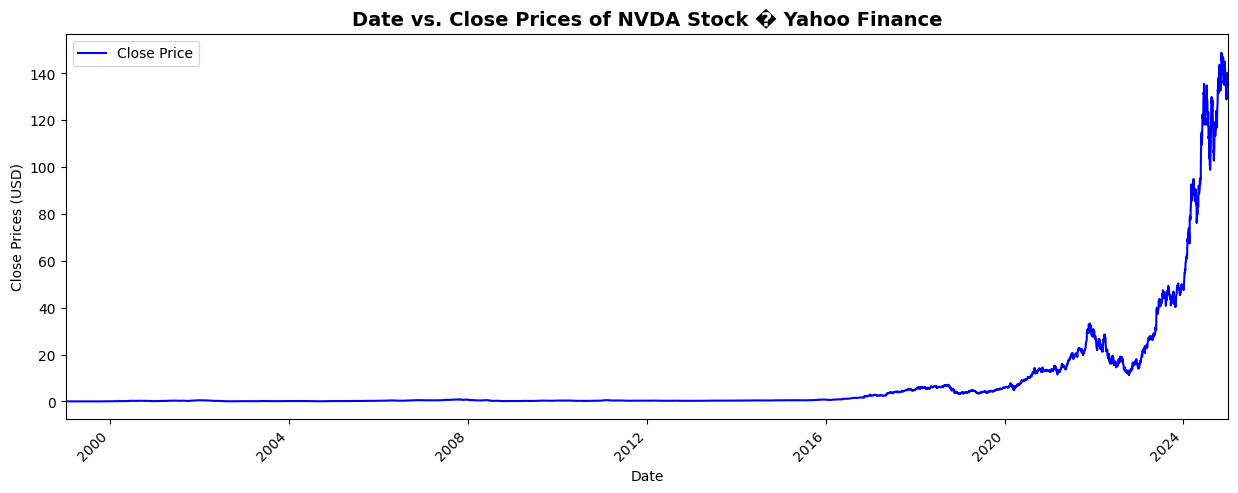

In [101]:
# Set up a figure with 3 subplots
plt.figure(figsize=(15, 5))

# Create the plot Apple stock prices vs. date
plt.plot(NVDA['Date'], NVDA['Close_Price_USD'],label='Close Price', color='blue')
#plt.plot(NVDA['Date'], NVDA['High_Price_USD'], label='High Price', color='green')
#plt.plot(NVDA['Date'], NVDA['Low_Price_USD'], label='Low Price', color='red')
#plt.plot(NVDA['Date'], NVDA['Open_Price_USD'], label='Open Price', color='black') 

# When needed. format the x-axis to show only the desired date interval
start_date_YYYY_MM_DD = '1999-01-01'
end_date_YYYY_MM_DD = '2025-01-01'
plt.xlim(pd.Timestamp(start_date_YYYY_MM_DD), pd.Timestamp(end_date_YYYY_MM_DD))


# Customize the plot
plt.title("Date vs. Close Prices of NVDA Stock � Yahoo Finance", fontsize=14, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Close Prices (USD)")
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.legend() # Add the legend

# Add quarterly earning report (QER) closing prices for NVDA

The idea is 
1. To get the stock prices at each quarterly earning report date (QERD), from www.alphavantage.co
2. To define a date range before and after each QERD. Holidays and weekends which occur within the date ranges are excluded.
3. To plot the closing prices during these date ranges, together with the closing prices of NVDA stock from Yahoo Finance.

In [102]:
# Imports the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import msoffcrypto
from io import BytesIO

###  Get the stock prices at each quarterly earning report date (QERD) for NVDA

In [103]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=EARNINGS&symbol=NVDA&apikey=MA94VYU1XDN8Y7Z4'  # MA94VYU1XDN8Y7Z4 is the key
r = requests.get(url)
data = r.json()

# Show the data
# data

# Extract all the reported dates
# Extract 'quarterlyEarnings' into a DataFrame
df = pd.DataFrame(data['quarterlyEarnings'])

# Display the DataFrame
print(df)

#QERDs_NVDA = df[['reportedDate', 'surprise', 'surprisePercentage']]  # The quarterly earnings report dates for NVDA 
QERDs_NVDA = df

# Create a CSV file as output.
QERDs_NVDA.to_csv(r'G:\My Drive\LSE_Team_3\Data\QERDs_NVDA.csv', index=False)

    fiscalDateEnding reportedDate reportedEPS estimatedEPS surprise  \
0         2024-10-31   2024-11-20        0.81         0.74     0.07   
1         2024-07-31   2024-08-28        0.68         0.63     0.05   
2         2024-04-30   2024-05-22       0.612        0.559    0.053   
3         2024-01-31   2024-02-21       0.516        0.461    0.055   
4         2023-10-31   2023-11-21       0.402        0.336    0.066   
..               ...          ...         ...          ...      ...   
98        2000-04-30   2000-05-16       0.001        0.001        0   
99        2000-01-31   2000-02-15       0.001        0.001        0   
100       1999-10-31   1999-11-18       0.001        0.002   -0.001   
101       1999-07-31   1999-08-18       0.002        0.002        0   
102       1999-04-30   1999-05-18       0.002        0.001    0.001   

    surprisePercentage   reportTime  
0               9.4595  post-market  
1               7.9365  post-market  
2               9.4812  post-mark

In [104]:
# Import the QERDs_NVDA
file_path_QERDs_NVDA = r'G:\My Drive\LSE_Team_3\Data\QERDs_NVDA.csv'
QERDs_NVDA = pd.read_csv(file_path_QERDs_NVDA)

# Check the shape of the imported DataFrame
# print("Shape of the imported QERDs_NVDA DataFrame:", QERDs_NVDA.shape)

# Optionally, check the metadata (e.g., column names, data types)
# print("\nMetadata of the imported QERDs_NVDA DataFrame:")
# print(QERDs_NVDA.info())

# View DataFrame.
# print('\nQERDs_NVDA')
# print(QERDs_NVDA.head())
# print(QERDs_NVDA.tail())


### Define a date range before and after each QERD for NVDA

In [105]:
import pandas as pd

# Sample QERDs_NVDA DataFrame (replace this with your actual data)
# QERDs_NVDA = pd.DataFrame({
#     'reportedDate': ['2025-01-01', '2025-01-10'],
# })

# Convert 'reportedDate' to datetime format
QERDs_NVDA['reportedDate'] = pd.to_datetime(QERDs_NVDA['reportedDate'])

# Define the number of days before and after QERDs dynamically
Days_before_and_after_each_QERD = int(input("Enter the number of days before and after each QERD: "))

# Calculate start and end dates
QERDs_NVDA['StartDate'] = QERDs_NVDA['reportedDate'] - pd.Timedelta(days=Days_before_and_after_each_QERD)
QERDs_NVDA['EndDate'] = QERDs_NVDA['reportedDate'] + pd.Timedelta(days=Days_before_and_after_each_QERD)

# Function to create columns for each date between StartDate and EndDate
def create_date_columns(row):
    date_range = pd.date_range(row['StartDate'], row['EndDate'], freq='D')
    return pd.Series(date_range.values, index=[f"Day_{i+1}" for i in range(len(date_range))])

# Apply the function to each row
expanded_dates = QERDs_NVDA.apply(create_date_columns, axis=1)

# Concatenate the original DataFrame with the expanded dates
expanded_QERDs_NVDA = pd.concat([QERDs_NVDA[['reportedDate']], expanded_dates], axis=1)

# Display the result
print(expanded_QERDs_NVDA.shape)
print('Expanded QERDs NVDA:')
print(expanded_QERDs_NVDA.head())  # Display first few rows for checking

Enter the number of days before and after each QERD:  5


(103, 12)
Expanded QERDs NVDA:
  reportedDate      Day_1      Day_2      Day_3      Day_4      Day_5  \
0   2024-11-20 2024-11-15 2024-11-16 2024-11-17 2024-11-18 2024-11-19   
1   2024-08-28 2024-08-23 2024-08-24 2024-08-25 2024-08-26 2024-08-27   
2   2024-05-22 2024-05-17 2024-05-18 2024-05-19 2024-05-20 2024-05-21   
3   2024-02-21 2024-02-16 2024-02-17 2024-02-18 2024-02-19 2024-02-20   
4   2023-11-21 2023-11-16 2023-11-17 2023-11-18 2023-11-19 2023-11-20   

       Day_6      Day_7      Day_8      Day_9     Day_10     Day_11  
0 2024-11-20 2024-11-21 2024-11-22 2024-11-23 2024-11-24 2024-11-25  
1 2024-08-28 2024-08-29 2024-08-30 2024-08-31 2024-09-01 2024-09-02  
2 2024-05-22 2024-05-23 2024-05-24 2024-05-25 2024-05-26 2024-05-27  
3 2024-02-21 2024-02-22 2024-02-23 2024-02-24 2024-02-25 2024-02-26  
4 2023-11-21 2023-11-22 2023-11-23 2023-11-24 2023-11-25 2023-11-26  


### Remove Holidays and  weekends.

In [14]:
# install the module for downloading the market holidays
# !pip install pandas-market-calendars

In [106]:
import pandas as pd
import numpy as np
from pandas.tseries.offsets import BDay
from pandas.tseries.holiday import USFederalHolidayCalendar

# Sample QERDs_NVDA DataFrame (replace this with your actual data)
# QERDs_NVDA = pd.DataFrame({
#     'reportedDate': ['2025-01-01', '2025-01-10'],
# })

# Convert 'reportedDate' to datetime format
QERDs_NVDA['reportedDate'] = pd.to_datetime(QERDs_NVDA['reportedDate'])


# Define U.S. Federal Holidays
us_holidays = USFederalHolidayCalendar().holidays(
    start=QERDs_NVDA['reportedDate'].min() - pd.DateOffset(days=30),
    end=QERDs_NVDA['reportedDate'].max() + pd.DateOffset(days=30)
)

# Function to get previous and next business days
def get_business_days(reference_date, num_days, direction):
    """ Get `num_days` business days before (-1) or after (1) reference_date, adjusting for weekends/holidays. """
    business_days = []
    date = reference_date
    while len(business_days) < num_days:
        date += BDay(direction)  # Move to next/previous business day
        while date in us_holidays:  # If it's a holiday, adjust again
            date += BDay(direction)
        business_days.append(date)
    return business_days

# Function to create adjusted date columns
def create_adjusted_date_columns(row):
    past_dates = get_business_days(row['reportedDate'], Days_before_and_after_each_QERD, -1)
    future_dates = get_business_days(row['reportedDate'], Days_before_and_after_each_QERD, 1)

    full_dates = past_dates + [row['reportedDate']] + future_dates
    return pd.Series(full_dates, index=[f"Day_{i+1}" for i in range(len(full_dates))])

# Apply function
adjusted_dates = QERDs_NVDA.apply(create_adjusted_date_columns, axis=1)

# Concatenate results
adjusted_QERDs_NVDA = pd.concat([QERDs_NVDA[['reportedDate']], adjusted_dates], axis=1)

# Display results
print("Adjusted QERDs NVDA, with holidays and weekends removed:")
print(adjusted_QERDs_NVDA.shape)
print(adjusted_QERDs_NVDA.head())

Adjusted QERDs NVDA, with holidays and weekends removed:
(103, 12)
  reportedDate      Day_1      Day_2      Day_3      Day_4      Day_5  \
0   2024-11-20 2024-11-19 2024-11-18 2024-11-15 2024-11-14 2024-11-13   
1   2024-08-28 2024-08-27 2024-08-26 2024-08-23 2024-08-22 2024-08-21   
2   2024-05-22 2024-05-21 2024-05-20 2024-05-17 2024-05-16 2024-05-15   
3   2024-02-21 2024-02-20 2024-02-16 2024-02-15 2024-02-14 2024-02-13   
4   2023-11-21 2023-11-20 2023-11-17 2023-11-16 2023-11-15 2023-11-14   

       Day_6      Day_7      Day_8      Day_9     Day_10     Day_11  
0 2024-11-20 2024-11-21 2024-11-22 2024-11-25 2024-11-26 2024-11-27  
1 2024-08-28 2024-08-29 2024-08-30 2024-09-03 2024-09-04 2024-09-05  
2 2024-05-22 2024-05-23 2024-05-24 2024-05-28 2024-05-29 2024-05-30  
3 2024-02-21 2024-02-22 2024-02-23 2024-02-26 2024-02-27 2024-02-28  
4 2023-11-21 2023-11-22 2023-11-24 2023-11-27 2023-11-28 2023-11-29  


### Merge the adjusted NVDA QERDs (no holidays, no weekends) with the NVDA stock prices dataframe

In [107]:
# Ensure 'Date' is in datetime format in both DataFrames
NVDA['Date'] = pd.to_datetime(NVDA['Date'])
adjusted_QERDs_NVDA.iloc[:, 1:] = adjusted_QERDs_NVDA.iloc[:, 1:].apply(pd.to_datetime)

# Step 1: Convert expanded_QERDs_NVDA to long format (stack all date columns below each other)
melted_QERDs = adjusted_QERDs_NVDA.melt(id_vars=['reportedDate'], 
                                        var_name='Day', 
                                        value_name='Date')

# Step 2: Sort by date
melted_QERDs = melted_QERDs.sort_values(by='Date')

# Step 3: Merge with NVDA to get closing prices
merged_NVDA_and_adjusted_QERDs_NVDA = melted_QERDs.merge(NVDA, on='Date', how='left')

# Display final result
# print(merged_NVDA_and_adjusted_QERDs_NVDA.shape)
# print(merged_NVDA_and_adjusted_QERDs_NVDA.head())

# Remove the NaN rows
merged_NVDA_and_adjusted_QERDs_NVDA_No_NaN_axis_0 = merged_NVDA_and_adjusted_QERDs_NVDA.dropna().reset_index(drop=True)

merged_NVDA_and_adjusted_QERDs_NVDA_No_NaN_axis_0.shape

print(merged_NVDA_and_adjusted_QERDs_NVDA_No_NaN_axis_0)

     reportedDate     Day       Date  Close_Price_USD  High_Price_USD  \
0      1999-05-18   Day_5 1999-05-11         0.035226        0.036301   
1      1999-05-18   Day_4 1999-05-12         0.036301        0.036421   
2      1999-05-18   Day_3 1999-05-13         0.036301        0.037257   
3      1999-05-18   Day_2 1999-05-14         0.034391        0.036301   
4      1999-05-18   Day_1 1999-05-17         0.036063        0.036063   
...           ...     ...        ...              ...             ...   
1128   2024-11-20   Day_7 2024-11-21       146.659897      152.879470   
1129   2024-11-20   Day_8 2024-11-22       141.940216      147.149864   
1130   2024-11-20   Day_9 2024-11-25       136.010635      142.040219   
1131   2024-11-20  Day_10 2024-11-26       136.910568      139.290409   
1132   2024-11-20  Day_11 2024-11-27       135.330673      137.210549   

      Low_Price_USD  Open_Price_USD     Volume  
0          0.034152        0.034868  171744000  
1          0.035107      

# Calculate and plot stock price movements for each date range around the QERD.

### Calculate the number of dataframes (num_df) related to the Days_before_and_after_each_QERD 

In [108]:
num_df = merged_NVDA_and_adjusted_QERDs_NVDA_No_NaN_axis_0.shape[0] // \
(2 * Days_before_and_after_each_QERD + 1)  # Applying the double slash operator (//) results in the integer number of the division.

print('The number of dataframes is', num_df)

The number of dataframes is 103


### Create the dataframes, one per QERD 

In [109]:
#Parameter that saves the number of days before and after each QERD
Days_before_and_after_each_QERD


# Get the unique QERD dates as a series
QERDs_NVDA_series = merged_NVDA_and_adjusted_QERDs_NVDA_No_NaN_axis_0['reportedDate'].drop_duplicates().astype(str)

# Reset the index and start from 1
QERDs_NVDA_series.index = range(1, len(QERDs_NVDA_series) + 1)

shape_dataframe = merged_NVDA_and_adjusted_QERDs_NVDA_No_NaN_axis_0.shape[0]


for i in range(num_df):
    qerd_date = QERDs_NVDA_series.iloc[i]  # Get the QERD date
    df_name = f"df{i+1}_QERDs_NVDA_date_{qerd_date}"  # Name with the QERD date
    globals()[df_name] = \
    merged_NVDA_and_adjusted_QERDs_NVDA_No_NaN_axis_0.iloc[i*(2*Days_before_and_after_each_QERD+1):(i+1)*(2*Days_before_and_after_each_QERD+1)]
    
    #print(df_name, '\n', globals()[df_name], '\n')
    
    # Create CSV files as output for each df.
    file_path_df_name = r"G:\My Drive\LSE_Team_3\Data"
    # Save the actual DataFrame (globals()[df_name]) to CSV
    globals()[df_name].to_csv(f"{file_path_df_name}\\{df_name}.csv", index=False)

### Calculate Differences around QERDs (1 day after QERD minus 1 day before QERD; 2 days after QERD minus 2 days before QERD, ...)

In [110]:
# Loop through the number of DataFrames

# Get the unique QERD dates as a series
QERDs_NVDA_series = merged_NVDA_and_adjusted_QERDs_NVDA_No_NaN_axis_0['reportedDate'].drop_duplicates().astype(str)

# Reset the index and start from 1
QERDs_NVDA_series.index = range(1, len(QERDs_NVDA_series) + 1)

for j in range(num_df):
    qerd_date = QERDs_NVDA_series.iloc[j]  # Get the QERD date
    df_name = f"df{j+1}_QERDs_NVDA_date_{qerd_date}"  # Name with the QERD date
    df = globals()[df_name]  # Retrieve the actual DataFrame
    # print(df_name)

    # Ensure the DataFrame is not empty
    if df.empty:
        continue  # Skip this iteration if df is empty

    # Get the middle position and value
    middle_position = df.shape[0] // 2
    middle_value = df.iloc[middle_position]['Close_Price_USD']  # Retrieves the full row at the middle position

    # Initialize an empty list to store results
    data_list = []
    
    for i in range(middle_position):
        diff = round((df.iloc[2 * Days_before_and_after_each_QERD - i]['Close_Price_USD'] - df.iloc[i]['Close_Price_USD']), 2)
        data_list.append([i + 1, diff])  # Adding i+1 as an index column

    # Convert the list to a DataFrame
    df_result = pd.DataFrame(data_list, columns=['Index', 'Price_Difference'])
    
    # Store the results in a new variable (or overwrite the old one)
    globals()[f"df_result_{j}"] = df_result  

    # print(f"Differeces for {df_name}:\n", df_result)

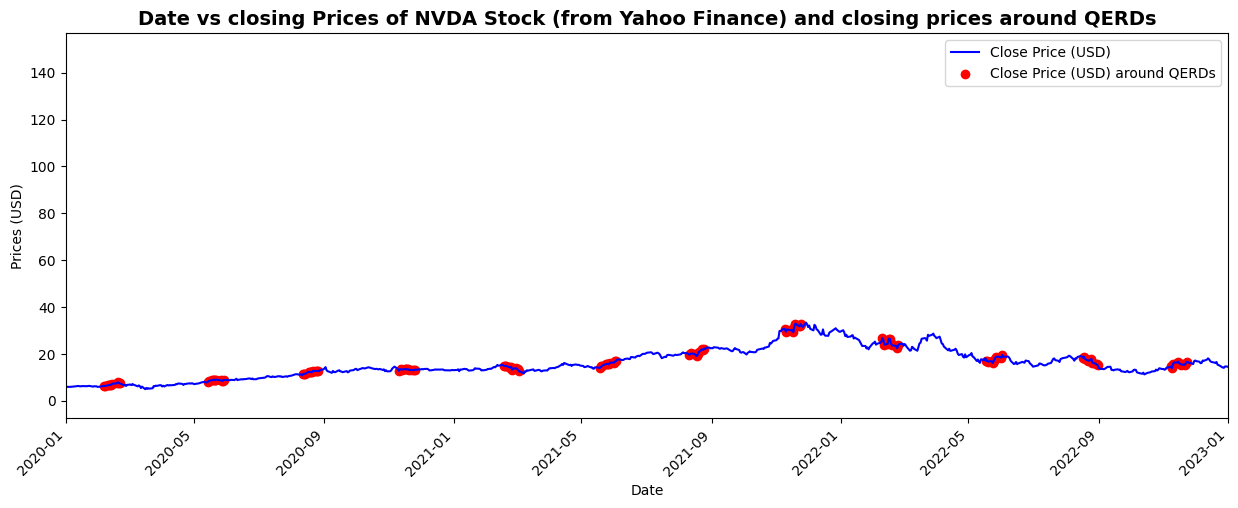

In [111]:
plt.figure(figsize=(15, 5))

# When needed. format the x-axis to show only the desired date interval
start_date_YYYY_MM_DD = '2020-01-01'
end_date_YYYY_MM_DD = '2023-01-01'
plt.xlim(pd.Timestamp(start_date_YYYY_MM_DD), pd.Timestamp(end_date_YYYY_MM_DD))

# Create the plot NVDA stock prices vs. date
plt.plot(NVDA['Date'], 
         NVDA['Close_Price_USD'],
         label='Close Price (USD)', 
         color='blue'
        )

# Create the plot NVDA stock prices around quarterly earning reports 
plt.scatter(merged_NVDA_and_adjusted_QERDs_NVDA['Date'],
            merged_NVDA_and_adjusted_QERDs_NVDA['Close_Price_USD'], 
            label='Close Price (USD) around QERDs', 
            color='red'
           )

# Customize the plot
plt.title("Date vs closing Prices of NVDA Stock (from Yahoo Finance) and closing prices around QERDs", fontsize=14, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Prices (USD)")
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.legend() # Add the legend

### Calculate the percentage increments around QERDs (1 day after QERD w.r.t. 1 day before QERD; 2 days after QERD w.r.t. 2 days before QERD, ...).  

In [112]:
# Loop through the number of DataFrames

# Get the unique QERD dates as a series
QERDs_NVDA_series = merged_NVDA_and_adjusted_QERDs_NVDA_No_NaN_axis_0['reportedDate'].drop_duplicates().astype(str)

# Reset the index and start from 1
QERDs_NVDA_series.index = range(1, len(QERDs_NVDA_series) + 1)

for j in range(num_df):
    qerd_date = QERDs_NVDA_series.iloc[j]  # Get the QERD date
    df_name = f"df{j+1}_QERDs_NVDA_date_{qerd_date}"  # Name with the QERD date
    df = globals()[df_name]  # Retrieve the actual DataFrame
    #print(df_name)

    # Ensure the DataFrame is not empty
    if df.empty:
        continue  # Skip this iteration if df is empty

    # Get the middle position and value
    middle_position = df.shape[0] // 2
    middle_value = df.iloc[middle_position]['Close_Price_USD']  # Retrieves the full row at the middle position

    # Initialize an empty list to store results
    data_list = []

# for i in range(middle_position):
#         diff = round((df.iloc[2 * Days_before_and_after_each_QERD - i]['Close_Price_USD'] - df.iloc[i]['Close_Price_USD']), 2)
#         data_list.append([i + 1, diff])  # Adding i+1 as an index column
    
    for i in range(middle_position):
        increment = round(((df.iloc[2 * Days_before_and_after_each_QERD - i]['Close_Price_USD'] / df.iloc[i]['Close_Price_USD'] -1) * 100), 1)
        data_list.append([i + 1, increment])  # Adding i+1 as an index column

    # Convert the list to a DataFrame
    df_result = pd.DataFrame(data_list, columns=['Index', 'Price_increment_%'])
    
    # Store the results in a new variable (or overwrite the old one)
    globals()[f"df_result_{j}"] = df_result  

    #print(f"Price increment (%) for {df_name}:\n", df_result)

### Calculate increments vs. QERD

The nth increment (%) is calculated as: 
$$ \left[ \frac{\text{Price at } (QERD + n \text{ days}) - \text{Price at QERD}}{\text{Price at QERD}} \right] \times 100 $$

or  

$$ \left[ \frac{\text{Price at } (QERD - n \text{ days}) - \text{Price at QERD}}{\text{Price at QERD}} \right] \times 100 $$


In [113]:
# Loop through the number of DataFrames

# Get the unique QERD dates as a series
QERDs_NVDA_series = merged_NVDA_and_adjusted_QERDs_NVDA_No_NaN_axis_0['reportedDate'].drop_duplicates().astype(str)

# Reset the index and start from 1
QERDs_NVDA_series.index = range(1, len(QERDs_NVDA_series) + 1)

for j in range(num_df):
    qerd_date = QERDs_NVDA_series.iloc[j]  # Get the QERD date
    df_name = f"df{j+1}_QERDs_NVDA_date_{qerd_date}"  # Name with the QERD date
    df = globals()[df_name]  # Retrieve the actual DataFrame
    #print(df_name)
    
    # Ensure the DataFrame is not empty
    if df.empty:
        continue  # Skip this iteration if df is empty

    # Get the middle position and value
    middle_position = df.shape[0] // 2
    middle_value = df.iloc[middle_position]['Close_Price_USD']  # Retrieves the full row at the middle position
    
    # Initialize an empty list to store results
    data_list = []
    
    for i in range(2*Days_before_and_after_each_QERD+1):
        increment = round(
            ((df.iloc[2*Days_before_and_after_each_QERD - i]['Close_Price_USD'] / 
                            df.iloc[middle_position]['Close_Price_USD'] -1) * 100)
            , 1)
        data_list.append([(Days_before_and_after_each_QERD) - i, increment])  # Adding index column as number of days before and after QERD

    # Convert the list to a DataFrame
    df_result = pd.DataFrame(data_list, columns=['Index', 'Price_increment_%'])
    
    # Store the results in a new variable (or overwrite the old one)
    globals()[f"df_result_{j}"] = df_result  

   # print(f"Price increment (%) for {df_name}:\n", df_result)

### Plot a heatmap of increment per QERD and per days before and after each QERD

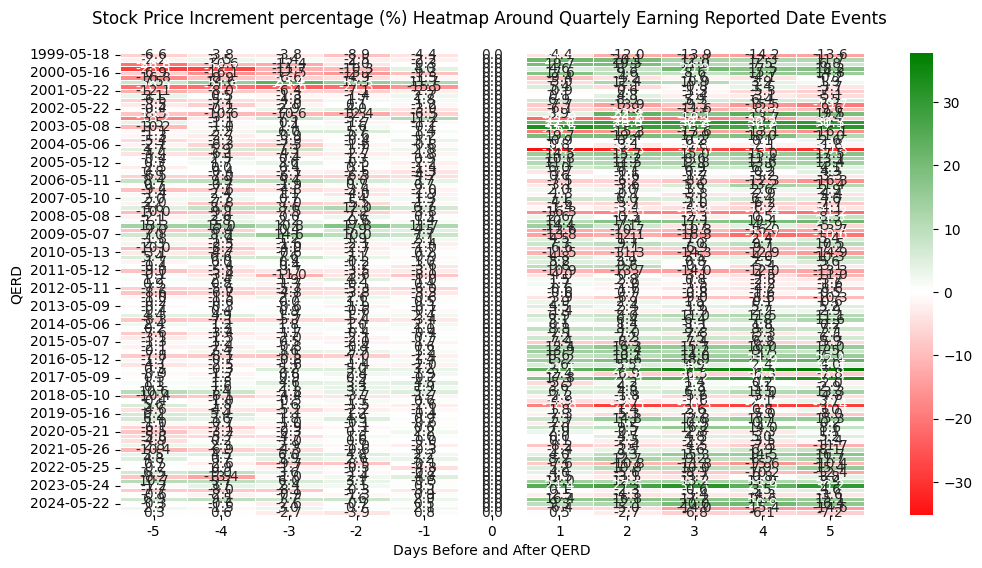

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap

cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 

# Create an empty DataFrame to store all results
heatmap_data = pd.DataFrame()

for j in range(num_df):
    df_result = globals().get(f"df_result_{j}")  # Retrieve the result DataFrame
    
    if df_result is None or df_result.empty:
        continue  # Skip if no data
    
    qerd_date = QERDs_NVDA_series.iloc[j]  # Get the QERD date
    df_result['reportedDate'] = qerd_date  # Add QERD date as a column

    heatmap_data = pd.concat([heatmap_data, df_result], ignore_index=True)


# Pivot the data to have days before/after on X-axis and QERD dates on Y-axis
heatmap_pivot = heatmap_data.pivot(index='reportedDate', columns='Index', values='Price_increment_%')

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_pivot, 
            cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256), 
            annot=True, fmt=".1f", 
            linewidths=0.5, center=0
           )

# Labels and title
plt.xlabel('Days Before and After QERD')
plt.ylabel('QERD')
plt.title('Stock Price Increment percentage (%) Heatmap Around Quartely Earning Reported Date Events \n')

# Rotate the Y-axis labels for better readability
plt.yticks(rotation=0)
plt.xticks(rotation=0)

# Show the heatmap
plt.show()

In [116]:
# Convert reportedDate to datetime format (if not already)
QERDs_NVDA['reportedDate'] = pd.to_datetime(QERDs_NVDA['reportedDate'])

# Filter data for reportedDate between 2020 and 2022
filtered_QERDs_NVDA = QERDs_NVDA[(QERDs_NVDA['reportedDate'] >= '2020-03-01') & 
                                 (QERDs_NVDA['reportedDate'] <= '2022-12-31')]

# Display filtered data
print(filtered_QERDs_NVDA)

   fiscalDateEnding reportedDate  reportedEPS  estimatedEPS  surprise  \
8        2022-10-31   2022-11-16       0.0580        0.0710   -0.0130   
9        2022-07-31   2022-08-24       0.0510        0.0499    0.0011   
10       2022-04-30   2022-05-25       0.1360        0.1300    0.0060   
11       2022-01-31   2022-02-16       0.1320        0.1230    0.0090   
12       2021-10-31   2021-11-17       0.1170        0.1110    0.0060   
13       2021-07-31   2021-08-18       0.1040        0.1020    0.0020   
14       2021-04-30   2021-05-26       0.0915        0.0822    0.0093   
15       2021-01-31   2021-02-24       0.0775        0.0800   -0.0025   
16       2020-10-31   2020-11-18       0.0730        0.0640    0.0090   
17       2020-07-31   2020-08-19       0.0550        0.0490    0.0060   
18       2020-04-30   2020-05-21       0.0450        0.0420    0.0030   

    surprisePercentage   reportTime  StartDate    EndDate  
8             -18.3099  post-market 2022-11-11 2022-11-21  
9  

### The surprise percentage is calculated as 

$$ \left( \frac{\text{reported EPS}} {\text{estimated EPS}} -1 \right)   \times 100 $$

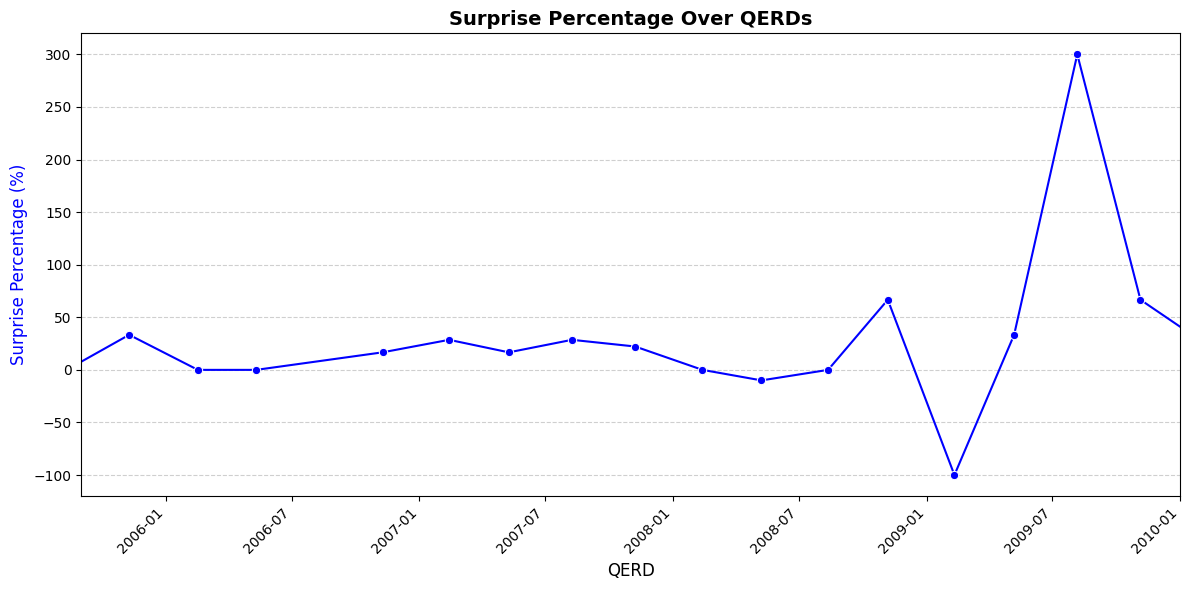

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'reportedDate' is in datetime format
QERDs_NVDA['reportedDate'] = pd.to_datetime(QERDs_NVDA['reportedDate'])

# Sort by reportedDate
QERDs_NVDA = QERDs_NVDA.sort_values(by='reportedDate')

# Set figure size
plt.figure(figsize=(12, 6))

# When needed. format the axis to show only the desired date interval
start_date_YYYY_MM_DD = '2005-09-01'
end_date_YYYY_MM_DD = '2010-01-01'
plt.xlim(pd.Timestamp(start_date_YYYY_MM_DD), pd.Timestamp(end_date_YYYY_MM_DD))


# Create line plot
sns.lineplot(
    data=QERDs_NVDA,
    x='reportedDate',
    y='surprisePercentage',
    marker='o',
    linestyle='-',
    color='blue'
)

# Labels and title
plt.xlabel('QERD', fontsize=12)
plt.ylabel('Surprise Percentage (%)', fontsize=12, color='blue')
plt.title('Surprise Percentage Over QERDs', fontsize=14, fontweight='bold')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show plot
plt.tight_layout()
plt.show()

### Plot a boxplot of increment per QERD

Here, the time interval to consider can be chosen, and conclusions on how surprise percentage correlates with the movements of stock price around QERDs can be drawn.
The time interval can be a period between two quarters of any year, but a time interval of only a specific quarter (e.g., only Q1 from 2003 to 2023). 

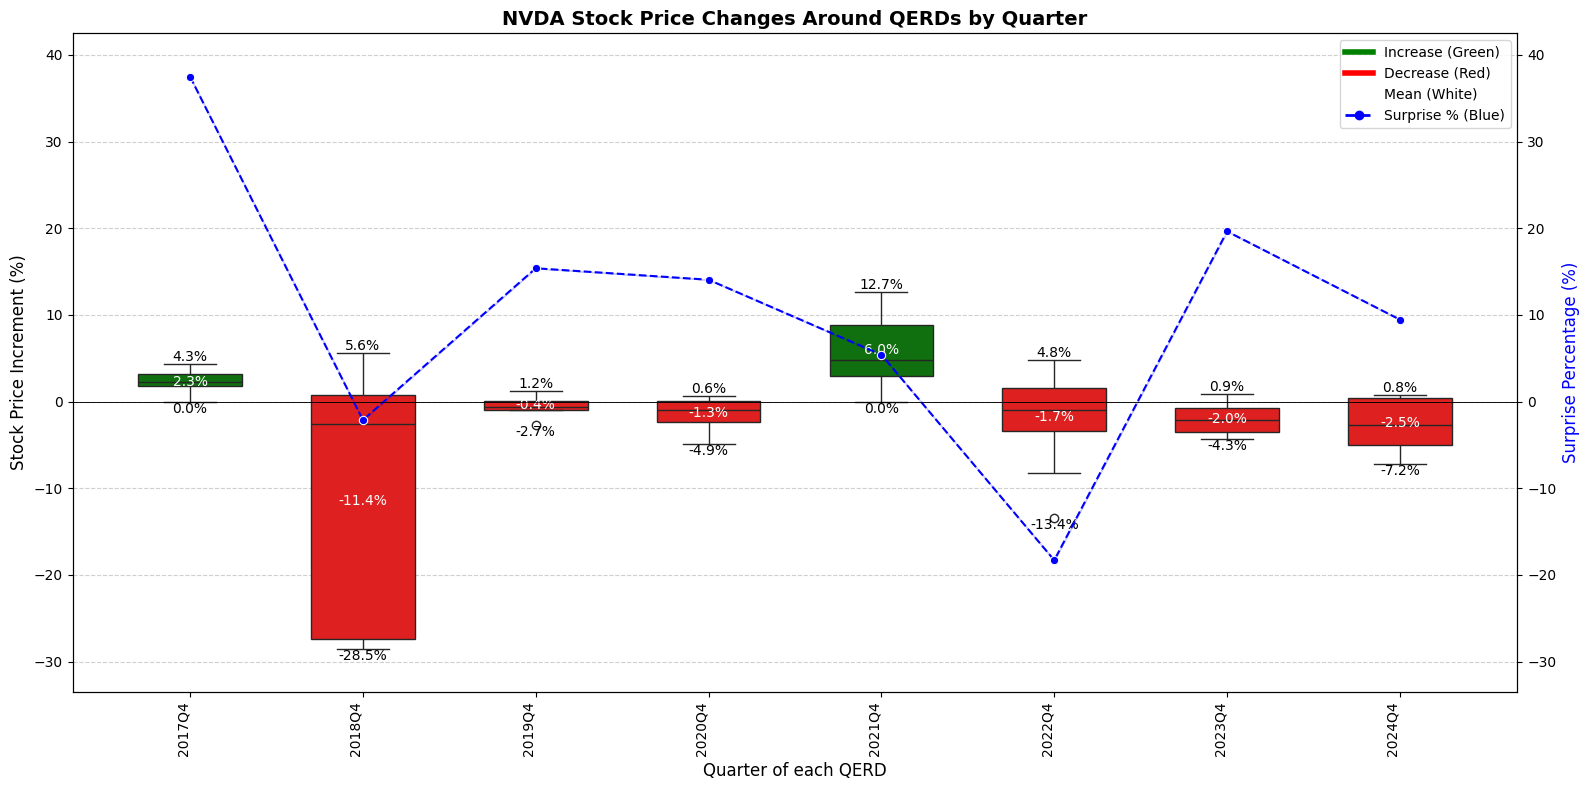

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'reportedDate' is datetime
heatmap_data['reportedDate'] = pd.to_datetime(heatmap_data['reportedDate'])
QERDs_NVDA['reportedDate'] = pd.to_datetime(QERDs_NVDA['reportedDate'])

# Merge datasets
merged_data = pd.merge(heatmap_data, QERDs_NVDA[['reportedDate', 'surprisePercentage']], on='reportedDate', how='left')

# Make sure the reportedDate column is categorical to avoid errors in set_xticklabels
merged_data['reportedDate'] = pd.Categorical(merged_data['reportedDate'], categories=merged_data['reportedDate'].unique(), ordered=True)


# Create Quarter column
merged_data['reportedDate'] = merged_data['reportedDate'].dt.to_period('Q').astype(str)


#Filter dataset for a specific quarter (e.g., Q2) of each year
merged_data = merged_data[merged_data['reportedDate'].str.endswith('Q4')]


# Filter dataset for the desired range

start_quarter = '2017Q1'
end_quarter = '2024Q4'
merged_data = merged_data[
    (merged_data['reportedDate'] >= start_quarter) & (merged_data['reportedDate'] <= end_quarter)
]


# Calculate means
quarter_means = merged_data.groupby('reportedDate')['Price_increment_%'].mean()

# Determine the common y-axis range
left_min = merged_data['Price_increment_%'].min()
left_max = merged_data['Price_increment_%'].max()
right_min = merged_data['surprisePercentage'].min()
right_max = merged_data['surprisePercentage'].max()

common_min = min(left_min, right_min)
common_max = max(left_max, right_max)

# Create the figure
fig, ax1 = plt.subplots(figsize=(16, 8))

# Boxplot on the primary y-axis
sns.boxplot(
    data=merged_data,
    x='reportedDate',
    y='Price_increment_%',
    width=0.6,
    hue='reportedDate',  # Assigning hue to avoid the warning
    palette=['red' if mean < 0 else 'green' for mean in quarter_means],
    ax=ax1
)

# Add the secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(
    data=merged_data,
    x='reportedDate',
    y='surprisePercentage',
    marker='o',
    linestyle='dashed',
    color='blue',
    ax=ax2
)

# Set y-axis limits to align the 0
ax1.set_ylim(common_min-5, common_max+5)
ax2.set_ylim(common_min-5, common_max+5)

# Add labels to the boxplot
for i, quarter in enumerate(merged_data['reportedDate'].unique()):
    subset = merged_data[merged_data['reportedDate'] == quarter]
    max_value = subset['Price_increment_%'].max()
    min_value = subset['Price_increment_%'].min()
    mean_value = subset['Price_increment_%'].mean()
    
    ax1.text(i, max_value, f'{max_value:.1f}%', ha='center', va='bottom', fontsize=10, color='black')
    ax1.text(i, min_value, f'{min_value:.1f}%', ha='center', va='top', fontsize=10, color='black')
    ax1.text(i, mean_value, f'{mean_value:.1f}%', ha='center', va='center', fontsize=10, color='white')

# Set labels and title
ax1.set_xlabel('Quarter of each QERD', fontsize=12)
ax1.set_ylabel('Stock Price Increment (%)', fontsize=12)
ax2.set_ylabel('Surprise Percentage (%)', fontsize=12, color='blue')
plt.title('NVDA Stock Price Changes Around QERDs by Quarter', fontsize=14, fontweight='bold')


# Rotate x-axis labels properly
ax1.set_xticks(range(len(merged_data['reportedDate'].unique())))  # Set fixed tick positions
ax1.set_xticklabels(merged_data['reportedDate'].unique(), rotation=90, ha='right')  # Rotate labels

# Add horizontal lines at zero
ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)


# Add gridlines for readability
ax1.grid(axis='y', linestyle='--', alpha=0.6)

# Add legend
legend_labels = ['Increase (Green)', 'Decrease (Red)', 'Mean (White)', 'Surprise % (Blue)']
handles = [
    plt.Line2D([0], [0], color='green', lw=4),
    plt.Line2D([0], [0], color='red', lw=4),
    plt.Line2D([0], [0], color='white', marker='o', lw=0),
    plt.Line2D([0], [0], color='blue', linestyle='dashed', marker='o', lw=2)
]
plt.legend(handles, legend_labels, loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

In [119]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Import stock data

In [120]:
# Load the NVDA stock price data
file_path_NVDA_cleaned = r'G:\My Drive\LSE_Team_3\Data\NVDA_cleaned.csv'
data_NVDA = pd.read_csv(file_path_NVDA_cleaned)

# Change date column type from object into date
data_NVDA.rename(columns={'Date': 'date'}, inplace=True)  #Rename columns for clarity
data_NVDA.rename(columns={'Close_Price_USD': 'NVDA_Close_Price_USD'}, inplace=True)
data_NVDA['date'] = pd.to_datetime(data_NVDA['date'])  # Change date column type from object into date

# Preview the DataFrames
print(data_NVDA.head())

        date  NVDA_Close_Price_USD  High_Price_USD  Low_Price_USD  \
0 1999-01-22              0.037615        0.044779       0.035585   
1 1999-01-25              0.041556        0.042033       0.037615   
2 1999-01-26              0.038331        0.042869       0.037734   
3 1999-01-27              0.038212        0.039406       0.036301   
4 1999-01-28              0.038092        0.038451       0.037854   

   Open_Price_USD      Volume  
0        0.040122  2714688000  
1        0.040600   510480000  
2        0.042033   343200000  
3        0.038451   244368000  
4        0.038212   227520000  


### Import quarterly earnings

In [121]:
file_path_QERDs_NVDA_complete = r'G:\My Drive\LSE_Team_3\Data\QERDs_NVDA_complete.csv'
data_QERDs_NVDA_complete = pd.read_csv(file_path_QERDs_NVDA_complete)

# Change date columns type from object into date
data_QERDs_NVDA_complete['fiscalDateEnding'] = pd.to_datetime(data_QERDs_NVDA_complete['fiscalDateEnding'])
data_QERDs_NVDA_complete['reportedDate'] = pd.to_datetime(data_QERDs_NVDA_complete['reportedDate'])

# Preview the DataFrames
print(data_QERDs_NVDA_complete.head())

  fiscalDateEnding reportedDate  reportedEPS  estimatedEPS  surprise  \
0       2024-10-31   2024-11-20        0.810         0.740     0.070   
1       2024-07-31   2024-08-28        0.680         0.630     0.050   
2       2024-04-30   2024-05-22        0.612         0.559     0.053   
3       2024-01-31   2024-02-21        0.516         0.461     0.055   
4       2023-10-31   2023-11-21        0.402         0.336     0.066   

   surprisePercentage   reportTime  
0              9.4595  post-market  
1              7.9365  post-market  
2              9.4812  post-market  
3             11.9306  post-market  
4             19.6429  post-market  


### Import macro economical data

In [122]:
# Load the CPI data
file_path_df_CPI = r'G:\My Drive\LSE_Team_3\Data\df_CPI.csv'
data_CPI = pd.read_csv(file_path_df_CPI)


data_CPI['date'] = pd.to_datetime(data_CPI['date'])  # Change date column type from object into date
data_CPI.rename(columns={'value': 'value_CPI'}, inplace=True)  # Rename value column for clarity
data_CPI = data_CPI.drop(columns=['Unnamed: 0'])  # drop unnecessary columns

# Preview the DataFrames
print('CPI\n', data_CPI.head())

#########################################################################################

# Load the unemployment data
file_path_data_unemployment = r'G:\My Drive\LSE_Team_3\Data\data_unemployment.csv'
data_unemployment = pd.read_csv(file_path_data_unemployment)

data_unemployment['date'] = pd.to_datetime(data_unemployment['date'])  # Change date column type from object into date
data_unemployment.rename(columns={'value': 'value_unemployment'}, inplace=True)  # Rename value column for clarity
data_unemployment = data_unemployment.drop(columns=['Unnamed: 0'])  # drop unnecessary columns

# Preview the DataFrames
print('\n Unemployment rate \n', data_unemployment.head())

##########################################################################################

# Load the FED Funds interest rates data
file_path_FEDFUNDS = r'G:\My Drive\LSE_Team_3\Data\FEDFUNDS.csv'
data_FEDFUNDS = pd.read_csv(file_path_FEDFUNDS)

data_FEDFUNDS.rename(columns={'observation_date': 'date'}, inplace=True)  # Rename date columns for consistency
data_FEDFUNDS['date'] = pd.to_datetime(data_FEDFUNDS['date'])  # Change date column type from object into date
data_FEDFUNDS.rename(columns={'FEDFUNDS': 'value_FEDFUNDS'}, inplace=True)  # Rename value column for clarity


# Preview the DataFrames
print('\n FED Funds interest rates \n', data_FEDFUNDS.head())

CPI
         date  value_CPI
0 1913-01-01        9.8
1 1913-02-01        9.8
2 1913-03-01        9.8
3 1913-04-01        9.8
4 1913-05-01        9.7

 Unemployment rate 
         date  value_unemployment
0 1948-01-01                 3.4
1 1948-02-01                 3.8
2 1948-03-01                 4.0
3 1948-04-01                 3.9
4 1948-05-01                 3.5

 FED Funds interest rates 
         date  value_FEDFUNDS
0 1954-07-01            0.80
1 1954-08-01            1.22
2 1954-09-01            1.07
3 1954-10-01            0.85
4 1954-11-01            0.83


### Import Articles Tokenized

In [123]:
df_articles_tokenized = pd.read_csv(r'G:\My Drive\LSE_Team_3\Data\articles_tokenized.csv')

df_articles_tokenized.rename(columns={'pub_date': 'date'}, inplace=True)  # Rename pub_date column for clarity
df_articles_tokenized['date'] = pd.to_datetime(df_articles_tokenized['date'])  # Change date column type from object into date
df_articles_tokenized = df_articles_tokenized.drop(columns=['index',
                                                           'sentiment_abstract',
                                                           'sentiment_snippet'])  # drop unnecessary columns

# Check the shape of the imported DataFrame
print("Shape of the imported DataFrame:", df_articles_tokenized.shape)

# View DataFrame.
df_articles_tokenized

Shape of the imported DataFrame: (1464, 5)


,abstract,snippet,date,polarity_abstract,polarity_snippet
0,like its host city the ces trade show largely ...,like its host city the ces trade show largely ...,2019-01-09,0.103571,0.071429
1,by carving the stock market into specialized s...,by carving the stock market into specialized s...,2019-01-11,0.000000,0.000000
2,the couple met in 2013 through a mutual friend...,the couple met in 2013 through a mutual friend...,2019-01-13,0.000000,0.000000
3,all of the weddings right here on one handy pa...,all of the weddings right here on one handy pa...,2019-01-13,0.442857,0.442857
4,stocks slumped from the start with selling wor...,stocks slumped from the start with selling wor...,2019-01-22,-0.200000,-0.200000
...,...,...,...,...,...
1459,listen to our interview with sundar pichai,listen to our interview with sundar pichai,2024-12-20,0.000000,0.000000
1460,äúthe troublemakeräù is a brisk account of the...,äúthe troublemakeräù is a brisk account of the...,2024-12-20,0.000000,0.000000
1461,the search giantäôs proposals included allowin...,the search giantäôs proposals included allowin...,2024-12-21,0.000000,0.000000
1462,the federal judge who ruled google was a monop...,the federal judge who ruled google was a monop...,2024-12-21,0.000000,0.000000


In [124]:
import pandas as pd

# Select rows where "apple" is in the 'abstract' or 'snippet' columns (case-insensitive)
df_NVDA = df_articles_tokenized[
    df_articles_tokenized['abstract'].str.contains('artificial', case=False, na=False) | 
    df_articles_tokenized['snippet'].str.contains('artificial', case=False, na=False)
]

# Display results
print(df_NVDA)

                                               abstract  \
55    artificial intelligence has bested top players...   
115   the chip could improve how quickly artificial ...   
117   after losing top professors college students a...   
135   indonesian villagers are trying out a treetop ...   
173   the tech companyäôs deal with ascension is par...   
...                                                 ...   
1410  the change starting next friday lifts a domina...   
1425  the company which dominates the market for chi...   
1449  most members of a dealbook summit panel descri...   
1455  redesigned interfaces new features and artific...   
1457  companies like openai and google are running o...   

                                                snippet       date  \
55    artificial intelligence has bested top players... 2019-03-26   
115   the chip could improve how quickly artificial ... 2019-08-19   
117   after losing top professors college students a... 2019-09-06   
135   indon

### Merge all the dataframes

In [125]:
# Merge all dataframes based on 'date' in data_AAPL (left join)
merged_all_df = (
    data_NVDA
    .merge(data_CPI, on='date', how='left')
    .merge(data_unemployment, on='date', how='left')
    .merge(data_FEDFUNDS, on='date', how='left')
    .merge(df_NVDA, on='date', how='left')
)

# Merge earnings data (quarterly) separately, using 'reportedDate'
merged_all_df = merged_all_df.merge(data_QERDs_NVDA_complete, left_on='date', right_on='reportedDate', how='left')

# Sort by date
merged_all_df = merged_all_df.sort_values(by='date')

# Forward-fill and backward-fill missing values
merged_all_df.ffill(inplace=True)  # Fill forward
merged_all_df.bfill(inplace=True)  # Fill backward

# Reset index to start from 0
merged_all_df = merged_all_df.reset_index(drop=True)

# Display the final merged dataset
print(merged_all_df)
print(merged_all_df.shape)

           date  NVDA_Close_Price_USD  High_Price_USD  Low_Price_USD  \
0    1999-01-22              0.037615        0.044779       0.035585   
1    1999-01-25              0.041556        0.042033       0.037615   
2    1999-01-26              0.038331        0.042869       0.037734   
3    1999-01-27              0.038212        0.039406       0.036301   
4    1999-01-28              0.038092        0.038451       0.037854   
...         ...                   ...             ...            ...   
6550 2025-02-03            116.660004      118.570000     113.010002   
6551 2025-02-04            118.650002      121.199997     116.699997   
6552 2025-02-05            124.830002      125.000000     120.760002   
6553 2025-02-06            128.679993      128.770004     125.209999   
6554 2025-02-07            129.839996      130.369995     125.000000   

      Open_Price_USD      Volume  value_CPI  value_unemployment  \
0           0.040122  2714688000    164.500                 4.4   
1

### Calculate correlation matrix

      NVDA_Close_Price_USD  value_CPI  value_unemployment  value_FEDFUNDS  \
0                 0.037615    164.500                 4.4            4.76   
1                 0.041556    164.500                 4.4            4.76   
2                 0.038331    164.500                 4.4            4.76   
3                 0.038212    164.500                 4.4            4.76   
4                 0.038092    164.500                 4.4            4.76   
...                    ...        ...                 ...             ...   
6550            116.660004    315.493                 4.2            4.64   
6551            118.650002    315.493                 4.2            4.64   
6552            124.830002    315.493                 4.2            4.64   
6553            128.679993    315.493                 4.2            4.64   
6554            129.839996    315.493                 4.2            4.64   

      reportedEPS  surprisePercentage  polarity_abstract  polarity_snippet 

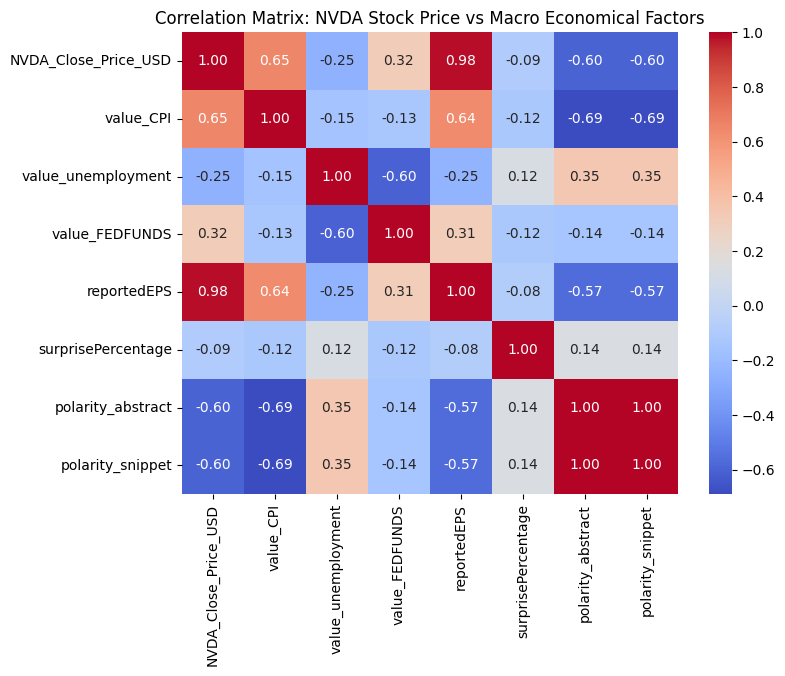

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for correlation analysis
corr_data = merged_all_df[['NVDA_Close_Price_USD', 
                           'value_CPI', 
                           'value_unemployment', 
                           'value_FEDFUNDS', 
                           'reportedEPS', 
                           'surprisePercentage',
                           'polarity_abstract',
                           'polarity_snippet'
                          ]]
print(corr_data)

# Compute correlation matrix
corr_matrix = corr_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: NVDA Stock Price vs Macro Economical Factors")
plt.show()

### Regression Analysis

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Define independent (X) and dependent (Y) variables
X = corr_data[['value_CPI', 
               'value_unemployment', 
               'value_FEDFUNDS', 
               'reportedEPS', 
               'surprisePercentage',
               'polarity_abstract',
               'polarity_snippet'
             ]]
Y = corr_data['NVDA_Close_Price_USD']

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)

print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Model Coefficients: {dict(zip(X.columns, model.coef_))}")

R-squared: 0.9584
Mean Squared Error: 18.9803
Model Coefficients: {'value_CPI': np.float64(0.02530626727411566), 'value_unemployment': np.float64(0.33752862595196964), 'value_FEDFUNDS': np.float64(0.5301702782223697), 'reportedEPS': np.float64(168.26643780458403), 'surprisePercentage': np.float64(-0.0006915236171689543), 'polarity_abstract': np.float64(-2.107349410407096), 'polarity_snippet': np.float64(-2.107349410407126)}


In [128]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Define independent (X) and dependent (Y) variables
X = corr_data[['value_CPI', 
               'value_unemployment', 
               'value_FEDFUNDS', 
               'reportedEPS', 
               'surprisePercentage',
               # 'polarity_abstract',
               # 'polarity_snippet'
             ]]
Y = corr_data['NVDA_Close_Price_USD']

# Add a constant for the intercept
X = sm.add_constant(X)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the OLS (Ordinary Least Squares) regression model
model = sm.OLS(Y_train, X_train).fit()

# Get the summary of the regression results
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     NVDA_Close_Price_USD   R-squared:                       0.971
Model:                              OLS   Adj. R-squared:                  0.971
Method:                   Least Squares   F-statistic:                 3.551e+04
Date:                  Tue, 18 Feb 2025   Prob (F-statistic):               0.00
Time:                          17:51:32   Log-Likelihood:                -14840.
No. Observations:                  5244   AIC:                         2.969e+04
Df Residuals:                      5238   BIC:                         2.973e+04
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const           

### Linear Regression Analysis

In [129]:
from sklearn.linear_model import LinearRegression

X = corr_data[['value_CPI', 
               'value_unemployment', 
               'value_FEDFUNDS', 
               'reportedEPS', 
               'surprisePercentage',
               'polarity_abstract',
               'polarity_snippet'
             ]]
Y = corr_data['NVDA_Close_Price_USD']

model = LinearRegression()
model.fit(X, Y)
print("Regression Coefficients:", model.coef_)

Regression Coefficients: [ 2.70718056e-02  3.46348125e-01  5.50394950e-01  1.66811003e+02
 -5.66315679e-04 -2.31449920e+00 -2.31449920e+00]


### Granger Causality Test (to check if a macro factor <b>predicts</b> stock prices)

Interpretation:

If the p-value for any lag is < 0.05, the null hypothesis that the (macro economical) parameter does not Granger-cause STOCK_Close_Price_USD is rejected, meaning that value_CPI provides predictive information about STOCK_Close_Price_USD.

If all p-values for any lag is > 0.05, the null hypothesis that the (macro economical) parameter does not Granger-cause STOCK_Close_Price_USD is failed to be rejected, meaning there's no strong evidence that the (macro economical) parameter Granger-causes STOCK_Close_Price_USD.

A lag in the Granger Causality Test refers to how many past values of one time series (X) are used to predict another time series (Y). Mathematically, the test checks if past values of X (up to a certain number of lags) help predict Y. For example, if the Granger causality is tested with maxlag=4, the model evaluates whether the past 1 to 4 time periods of X influence Y.

For example, a maxlag = 4 checks if a (macro economical) factor at t-1, t-2, t-3, and t-4 helps predict STOCK_Close_Price_USD at t.

If p-value < 0.05 at any lag, it means that the (macro economical) factor values contain predictive power for STOCK�s stock price.

In [130]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(merged_all_df[['value_CPI', 'NVDA_Close_Price_USD']].dropna(), maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0522  , p=0.8193  , df_denom=6551, df_num=1
ssr based chi2 test:   chi2=0.0522  , p=0.8192  , df=1
likelihood ratio test: chi2=0.0522  , p=0.8192  , df=1
parameter F test:         F=0.0522  , p=0.8193  , df_denom=6551, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2234  , p=0.7998  , df_denom=6548, df_num=2
ssr based chi2 test:   chi2=0.4472  , p=0.7996  , df=2
likelihood ratio test: chi2=0.4472  , p=0.7996  , df=2
parameter F test:         F=0.2234  , p=0.7998  , df_denom=6548, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1618  , p=0.9221  , df_denom=6545, df_num=3
ssr based chi2 test:   chi2=0.4858  , p=0.9220  , df=3
likelihood ratio test: chi2=0.4858  , p=0.9220  , df=3
parameter F test:         F=0.1618  , p=0.9221  , df_denom=6545, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2415  , p=0.

{np.int64(1): ({'ssr_ftest': (np.float64(0.05221477953063833),
    np.float64(0.8192603858758893),
    np.float64(6551.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(0.0522386910462225),
    np.float64(0.819212587776083),
    np.int64(1)),
   'lrtest': (np.float64(0.0522384828691429),
    np.float64(0.8192129417765233),
    np.int64(1)),
   'params_ftest': (np.float64(0.05221477957278676),
    np.float64(0.8192603858053784),
    np.float64(6551.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(0.22342243346373056),
    np.float64(0.7997830220983024),
    np.float64(6548.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(0.44718607406469957),
    np.float64(0.7996404922283452),
    np.int64(2)),
   'lrtest': (np.float64(0.44717081644557766),
    np.float64(0.7996465925566467),
    np.int64(2)),
   'params_ftest': (np.float64(0.22342243347947188),
    np.float64(0.7997830220860918),
    np.float64(6548.0),
    2.0)},
   array([[0., 0., 1., 0., 0.

In [131]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(merged_all_df[['value_unemployment', 'NVDA_Close_Price_USD']].dropna(), maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8301  , p=0.3623  , df_denom=6551, df_num=1
ssr based chi2 test:   chi2=0.8304  , p=0.3621  , df=1
likelihood ratio test: chi2=0.8304  , p=0.3622  , df=1
parameter F test:         F=0.8301  , p=0.3623  , df_denom=6551, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4625  , p=0.6297  , df_denom=6548, df_num=2
ssr based chi2 test:   chi2=0.9258  , p=0.6295  , df=2
likelihood ratio test: chi2=0.9257  , p=0.6295  , df=2
parameter F test:         F=0.4625  , p=0.6297  , df_denom=6548, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3110  , p=0.8175  , df_denom=6545, df_num=3
ssr based chi2 test:   chi2=0.9340  , p=0.8172  , df=3
likelihood ratio test: chi2=0.9339  , p=0.8172  , df=3
parameter F test:         F=0.3110  , p=0.8175  , df_denom=6545, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2386  , p=0.

{np.int64(1): ({'ssr_ftest': (np.float64(0.8300603907828881),
    np.float64(0.36228858911660544),
    np.float64(6551.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(0.8304405130806057),
    np.float64(0.362145180989329),
    np.int64(1)),
   'lrtest': (np.float64(0.8303879060367763),
    np.float64(0.36216038591927224),
    np.int64(1)),
   'params_ftest': (np.float64(0.8300603907880835),
    np.float64(0.3622885891151333),
    np.float64(6551.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(0.46254989178251144),
    np.float64(0.6296965637939556),
    np.float64(6548.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(0.9258061823001824),
    np.float64(0.6294536291798312),
    np.int64(2)),
   'lrtest': (np.float64(0.9257407896220684),
    np.float64(0.6294742103455742),
    np.int64(2)),
   'params_ftest': (np.float64(0.4625498917798203),
    np.float64(0.629696563795558),
    np.float64(6548.0),
    2.0)},
   array([[0., 0., 1., 0., 0.],
 

In [132]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(merged_all_df[['value_FEDFUNDS', 'NVDA_Close_Price_USD']].dropna(), maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2106  , p=0.6463  , df_denom=6551, df_num=1
ssr based chi2 test:   chi2=0.2107  , p=0.6462  , df=1
likelihood ratio test: chi2=0.2107  , p=0.6462  , df=1
parameter F test:         F=0.2106  , p=0.6463  , df_denom=6551, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1924  , p=0.8249  , df_denom=6548, df_num=2
ssr based chi2 test:   chi2=0.3852  , p=0.8248  , df=2
likelihood ratio test: chi2=0.3852  , p=0.8248  , df=2
parameter F test:         F=0.1924  , p=0.8249  , df_denom=6548, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3027  , p=0.8235  , df_denom=6545, df_num=3
ssr based chi2 test:   chi2=0.9090  , p=0.8232  , df=3
likelihood ratio test: chi2=0.9090  , p=0.8233  , df=3
parameter F test:         F=0.3027  , p=0.8235  , df_denom=6545, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3164  , p=0.

{np.int64(1): ({'ssr_ftest': (np.float64(0.21064209992001764),
    np.float64(0.6462798244447824),
    np.float64(6551.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(0.2107385624905809),
    np.float64(0.6461891412307335),
    np.int64(1)),
   'lrtest': (np.float64(0.21073517448530765),
    np.float64(0.6461917910908755),
    np.int64(1)),
   'params_ftest': (np.float64(0.21064209990975905),
    np.float64(0.6462798244521792),
    np.float64(6551.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(0.19244415408647833),
    np.float64(0.8249450520665816),
    np.float64(6548.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(0.3851822057815188),
    np.float64(0.8248191713697429),
    np.int64(2)),
   'lrtest': (np.float64(0.3851708858346683),
    np.float64(0.8248238398375451),
    np.int64(2)),
   'params_ftest': (np.float64(0.19244415404165727),
    np.float64(0.8249450521034662),
    np.float64(6548.0),
    2.0)},
   array([[0., 0., 1., 0., 0.

In [133]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(merged_all_df[['reportedEPS', 'NVDA_Close_Price_USD']].dropna(), maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=66.7803 , p=0.0000  , df_denom=6551, df_num=1
ssr based chi2 test:   chi2=66.8109 , p=0.0000  , df=1
likelihood ratio test: chi2=66.4726 , p=0.0000  , df=1
parameter F test:         F=66.7803 , p=0.0000  , df_denom=6551, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=33.6999 , p=0.0000  , df_denom=6548, df_num=2
ssr based chi2 test:   chi2=67.4513 , p=0.0000  , df=2
likelihood ratio test: chi2=67.1065 , p=0.0000  , df=2
parameter F test:         F=33.6999 , p=0.0000  , df_denom=6548, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=22.3949 , p=0.0000  , df_denom=6545, df_num=3
ssr based chi2 test:   chi2=67.2567 , p=0.0000  , df=3
likelihood ratio test: chi2=66.9138 , p=0.0000  , df=3
parameter F test:         F=22.3949 , p=0.0000  , df_denom=6545, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=19.0464 , p=0.

{np.int64(1): ({'ssr_ftest': (np.float64(66.78028842263991),
    np.float64(3.612311377963922e-16),
    np.float64(6551.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(66.81087014531859),
    np.float64(2.9884568857221146e-16),
    np.int64(1)),
   'lrtest': (np.float64(66.47263491188642),
    np.float64(3.5478489642383534e-16),
    np.int64(1)),
   'params_ftest': (np.float64(66.78028842264048),
    np.float64(3.612311377963922e-16),
    np.float64(6551.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(33.69993246222393),
    np.float64(2.7486308834636166e-15),
    np.float64(6548.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(67.45133091782327),
    np.float64(2.254911973383296e-15),
    np.int64(2)),
   'lrtest': (np.float64(67.10654985775182),
    np.float64(2.6791550528771422e-15),
    np.int64(2)),
   'params_ftest': (np.float64(33.699932462286796),
    np.float64(2.748630883291927e-15),
    np.float64(6548.0),
    2.0)},
   array([[0.

In [134]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(merged_all_df[['surprisePercentage', 'NVDA_Close_Price_USD']].dropna(), maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2887  , p=0.5911  , df_denom=6551, df_num=1
ssr based chi2 test:   chi2=0.2888  , p=0.5910  , df=1
likelihood ratio test: chi2=0.2888  , p=0.5910  , df=1
parameter F test:         F=0.2887  , p=0.5911  , df_denom=6551, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1461  , p=0.8641  , df_denom=6548, df_num=2
ssr based chi2 test:   chi2=0.2924  , p=0.8640  , df=2
likelihood ratio test: chi2=0.2924  , p=0.8640  , df=2
parameter F test:         F=0.1461  , p=0.8641  , df_denom=6548, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1005  , p=0.9597  , df_denom=6545, df_num=3
ssr based chi2 test:   chi2=0.3020  , p=0.9597  , df=3
likelihood ratio test: chi2=0.3020  , p=0.9597  , df=3
parameter F test:         F=0.1005  , p=0.9597  , df_denom=6545, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.0769  , p=0.

{np.int64(1): ({'ssr_ftest': (np.float64(0.28865061106750545),
    np.float64(0.591104798273838),
    np.float64(6551.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(0.2887827972731538),
    np.float64(0.5910016002116698),
    np.int64(1)),
   'lrtest': (np.float64(0.2887764352708473),
    np.float64(0.5910056882308397),
    np.int64(1)),
   'params_ftest': (np.float64(0.2886506110563903),
    np.float64(0.5911047982808502),
    np.float64(6551.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(0.1461048108575013),
    np.float64(0.8640699516181208),
    np.float64(6548.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(0.29243275062590285),
    np.float64(0.8639707410189048),
    np.int64(2)),
   'lrtest': (np.float64(0.29242622578749433),
    np.float64(0.86397355965824),
    np.int64(2)),
   'params_ftest': (np.float64(0.14610481085351162),
    np.float64(0.8640699516215757),
    np.float64(6548.0),
    2.0)},
   array([[0., 0., 1., 0., 0.],
 

In [135]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(merged_all_df[['polarity_snippet', 'NVDA_Close_Price_USD']].dropna(), maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.9115  , p=0.0016  , df_denom=6551, df_num=1
ssr based chi2 test:   chi2=9.9161  , p=0.0016  , df=1
likelihood ratio test: chi2=9.9086  , p=0.0016  , df=1
parameter F test:         F=9.9115  , p=0.0016  , df_denom=6551, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.6561  , p=0.0095  , df_denom=6548, df_num=2
ssr based chi2 test:   chi2=9.3192  , p=0.0095  , df=2
likelihood ratio test: chi2=9.3126  , p=0.0095  , df=2
parameter F test:         F=4.6561  , p=0.0095  , df_denom=6548, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.4631  , p=0.0156  , df_denom=6545, df_num=3
ssr based chi2 test:   chi2=10.4004 , p=0.0155  , df=3
likelihood ratio test: chi2=10.3922 , p=0.0155  , df=3
parameter F test:         F=3.4631  , p=0.0156  , df_denom=6545, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.6086  , p=0.

{np.int64(1): ({'ssr_ftest': (np.float64(9.911512785516061),
    np.float64(0.0016498565522399308),
    np.float64(6551.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(9.916051716726036),
    np.float64(0.0016384348422300002),
    np.int64(1)),
   'lrtest': (np.float64(9.908557894988917),
    np.float64(0.0016451197708232666),
    np.int64(1)),
   'params_ftest': (np.float64(9.911512785513596),
    np.float64(0.0016498565522423691),
    np.float64(6551.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(4.6560629326472505),
    np.float64(0.009535293126982545),
    np.float64(6548.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(9.319236529516626),
    np.float64(0.00947007677384588),
    np.int64(2)),
   'lrtest': (np.float64(9.31261620924488),
    np.float64(0.009501476184334076),
    np.int64(2)),
   'params_ftest': (np.float64(4.656062932630828),
    np.float64(0.009535293127137945),
    np.float64(6548.0),
    2.0)},
   array([[0., 0., 1., 

In [136]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(merged_all_df[['polarity_abstract', 'NVDA_Close_Price_USD']].dropna(), maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.9115  , p=0.0016  , df_denom=6551, df_num=1
ssr based chi2 test:   chi2=9.9161  , p=0.0016  , df=1
likelihood ratio test: chi2=9.9086  , p=0.0016  , df=1
parameter F test:         F=9.9115  , p=0.0016  , df_denom=6551, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.6561  , p=0.0095  , df_denom=6548, df_num=2
ssr based chi2 test:   chi2=9.3192  , p=0.0095  , df=2
likelihood ratio test: chi2=9.3126  , p=0.0095  , df=2
parameter F test:         F=4.6561  , p=0.0095  , df_denom=6548, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.4631  , p=0.0156  , df_denom=6545, df_num=3
ssr based chi2 test:   chi2=10.4004 , p=0.0155  , df=3
likelihood ratio test: chi2=10.3922 , p=0.0155  , df=3
parameter F test:         F=3.4631  , p=0.0156  , df_denom=6545, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.6086  , p=0.

{np.int64(1): ({'ssr_ftest': (np.float64(9.911512785516061),
    np.float64(0.0016498565522399308),
    np.float64(6551.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(9.916051716726036),
    np.float64(0.0016384348422300002),
    np.int64(1)),
   'lrtest': (np.float64(9.908557894988917),
    np.float64(0.0016451197708232666),
    np.int64(1)),
   'params_ftest': (np.float64(9.911512785513596),
    np.float64(0.0016498565522423691),
    np.float64(6551.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(4.6560629326472505),
    np.float64(0.009535293126982545),
    np.float64(6548.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(9.319236529516626),
    np.float64(0.00947007677384588),
    np.int64(2)),
   'lrtest': (np.float64(9.31261620924488),
    np.float64(0.009501476184334076),
    np.int64(2)),
   'params_ftest': (np.float64(4.656062932630828),
    np.float64(0.009535293127137945),
    np.float64(6548.0),
    2.0)},
   array([[0., 0., 1., 